In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import mapclassify as mcl
from matplotlib.colors import Normalize
import geopandas as gdp
from statsmodels.tsa.arima.model import ARIMA

#from statsmodels.tsa.arima_model import ARIMA
#statsmodels.tsa.arima.model.ARIMA
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller

In [2]:
crimes_df = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
crimes_main_df = crimes_df.copy()

In [4]:
crimes_df["TOTAL_THEFT"] = crimes_df["THEFT"] + crimes_df["OTHER THEFT"] + crimes_df["AUTO THEFT"]

In [5]:
crimes_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL_THEFT'],
      dtype='object')

In [6]:
fp = "india_st.shp"
map_India = gdp.read_file(fp)

In [7]:
#map_India['STATE'] = map_India['STATE'].replace(['Andaman & Nicobar Island', "Andhra Pradesh", 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'NCT of Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
#       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], 
#                                                ["A & N ISLANDS", "ANDHRA PRADESH", 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
#       'MEGHALAYA', 'MIZORAM', 'NAGALAND','ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',  'WEST BENGAL'])
#  

In [8]:
map_India['STATE'] = map_India['STATE'].replace(['ANDAMAN AND NICOBAR ISLANDS', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU' , 'DELHI' , 'JAMMU AND KASHMIR', 'ORISSA', 'PONDICHERRY'], 
                                                ["A & N ISLANDS" , 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'JAMMU & KASHMIR', 'ODISHA', 'PUDUCHERRY'])
  

In [9]:
crimes_df.head(5)

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0          50                      46  ...                1131            16   
1          23                      53  ...                1543             7   
2          27                      59  ...                2088            14   
3          20                      25  ...                 795            17   
4          23                      49  ...                1244            12   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  TOTAL_THEFT  
0              1518              4154          398  
1               754              4125          732  
2              1262              5818         1446  
3              1181              3140          346  
4              2313              6507         2042  

[5 rows x 34 columns]

In [10]:
crimes_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL_THEFT'],
      dtype='object')

In [11]:
crimes_df = crimes_df.rename(columns={'STATE/UT': 'STATE'})

In [12]:
crimes_df = crimes_df.rename(columns={'TOTAL IPC CRIMES': 'TOTAL'})

In [13]:
crimes_df['STATE'] = crimes_df['STATE'].replace(['A&N Islands', "Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], 
                                                ["A & N ISLANDS", "ANDHRA PRADESH", 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND','ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',  'WEST BENGAL'])
 

In [14]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["ZZ TOTAL"], ["TOTAL"])

In [15]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["SOUTH-EAST", "SOUTH-WEST", "NORTH-EAST", "NORTH-WEST",
                                                     "IGI AIRPORT", "GRP(RLY)", "STF", 'DELHI UT TOTAL'], ["SOUTH EAST", "SOUTH WEST", "NORTH EAST", "NORTH WEST",
                                                     "I.G.I. AIRPORT", "G.R.P.(RLY)", "S.T.F.", 'TOTAL'])

In [16]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["HOWRAH CITY"], ["HOWRAH"])

In [17]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(["HOWRAH G.R.P."], ["HOWRAH"])

In [18]:
crimes_df['DISTRICT'] = crimes_df['DISTRICT'].replace(['G.R.P. AJMER', 'G.R.P. JODHPUR'],['G.R.P.AJMER', 'G.R.P.JODHPUR'])

In [19]:
crimes_df.rename(columns={'HURT/GREVIOUS HURT': 'HURT', 'KIDNAPPING & ABDUCTION': 'KIDNAPPING', 'CAUSING DEATH BY NEGLIGENCE':'DEATH_BY_NEGLIGENCE', 
                          'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY':'ASSAULT_WOMEN_MODESTY','CRUELTY BY HUSBAND OR HIS RELATIVES': 'CRUELTY_BY_HUSBAND', 
                         'CRIMINAL BREACH OF TRUST':'CRIMINAL_BREACH_OF_TRUST'}, inplace=True)

In [20]:
crimes_df['STATE'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [21]:
crimes_df.shape

(9017, 34)

In [22]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   STATE                                        9017 non-null   object
 1   DISTRICT                                     9017 non-null   object
 2   YEAR                                         9017 non-null   int64 
 3   MURDER                                       9017 non-null   int64 
 4   ATTEMPT TO MURDER                            9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    9017 non-null   int64 
 6   RAPE                                         9017 non-null   int64 
 7   CUSTODIAL RAPE                               9017 non-null   int64 
 8   OTHER RAPE                                   9017 non-null   int64 
 9   KIDNAPPING                                   9017 non-null   int64 
 10  KIDNAPPING A

In [23]:
crimes_state = crimes_df.groupby("STATE").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum ,'OTHER IPC CRIMES':sum, 'TOTAL':sum}).reset_index()
       

In [24]:
merged_Ind = map_India.set_index('STATE').join(crimes_state.set_index('STATE'))
merged_Ind.head()

geometry  \
STATE                                                                  
A & N ISLANDS      MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...   
ANDHRA PRADESH     POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
ARUNACHAL PRADESH  POLYGON ((95.61476 27.34745, 95.69234 27.33888...   
ASSAM              POLYGON ((92.82207 25.57781, 92.69672 25.61368...   
BIHAR              POLYGON ((84.16946 26.28322, 83.91399 26.38523...   

                   TOTAL_THEFT     HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
STATE                                                                     
A & N ISLANDS             4496     2210         188                 242   
ANDHRA PRADESH         1148760  1093130       42478              238014   
ARUNACHAL PRADESH        20712    10314        1714                 334   
ASSAM                   341900   138366       55878               78776   
BIHAR                   613488   378532       74440               51360   

                   BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING   RIOTS  \
STATE                                                                        
A & N ISLANDS          1784     320                   84       506     280   
ANDHRA PRADESH       194672   63512               276870    197686   54918   
ARUNACHAL PRADESH      5560    1682                 1490      1040     680   
ASSAM                 69504   30864                60410     24782   69926   
BIHAR                 80586   82490                88884     61380  210192   

                   ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES    TOTAL  
STATE                                                                
A & N ISLANDS                        428              8886    18204  
ANDHRA PRADESH                    103998            964504  4037962  
ARUNACHAL PRADESH                   1568             14792    55304  
ASSAM                              27240            362708  1195528  
BIHAR                              15152           1077182  2692586

In [25]:
merged_Ind.isna().sum()

geometry                 0
TOTAL_THEFT              0
HURT                     0
KIDNAPPING               0
CRUELTY_BY_HUSBAND       0
BURGLARY                 0
MURDER                   0
DEATH_BY_NEGLIGENCE      0
CHEATING                 0
RIOTS                    0
ASSAULT_WOMEN_MODESTY    0
OTHER IPC CRIMES         0
TOTAL                    0
dtype: int64

In [26]:
crimes_distribution = crimes_df[crimes_df.DISTRICT=='TOTAL']


In [27]:
crimes_distribution = crimes_distribution.groupby(["YEAR"]).agg({'MURDER':sum, 'ATTEMPT TO MURDER':sum,
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER':sum, 'RAPE':sum, 'CUSTODIAL RAPE':sum,
       'OTHER RAPE':sum, 'KIDNAPPING':sum,
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS':sum,
       'KIDNAPPING AND ABDUCTION OF OTHERS':sum, 'DACOITY':sum,
       'PREPARATION AND ASSEMBLY FOR DACOITY':sum, 'ROBBERY':sum, 'BURGLARY':sum,
        'RIOTS':sum, 'CRIMINAL_BREACH_OF_TRUST':sum,
       'CHEATING':sum, 'COUNTERFIETING':sum, 'ARSON':sum, 'HURT':sum,
       'DOWRY DEATHS':sum, 'ASSAULT_WOMEN_MODESTY':sum,
       'INSULT TO MODESTY OF WOMEN':sum, 'CRUELTY_BY_HUSBAND':sum,
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES':sum,
       'DEATH_BY_NEGLIGENCE':sum, 'OTHER IPC CRIMES':sum, "TOTAL_THEFT":sum}).reset_index()
       

In [28]:
crimes_distribution = crimes_distribution.append(crimes_distribution.sum().rename('total'))
crimes_distribution['YEAR'].replace(26091, 'Total', inplace=True)
crimes_distribution = crimes_distribution[crimes_distribution['YEAR'] == 'Total']
crimes_sum = crimes_distribution.T.reset_index()


In [29]:

labels = ['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
       'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', "THEFTTOTAL"]

values = [435744, 387394, 47994, 272844, 422318, 63948, 35100, 280194, 1221740,847053,
         203648, 874927, 29067, 123061, 3706545, 99285, 523894, 136643, 994067, 923, 1113381, 6310244]
fig = go.Figure(data=[go.Pie(labels=labels, values=values ,textinfo='label+percent',
                              )])
fig.update_layout(
    uniformtext_minsize= 20,
    title_text="Distribution of Crimes",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=1150,
    height=800)
fig.show()

In [30]:

labels = ['MURDER', 'KIDNAPPING & ABDUCTION', 'BURGLARY',
        'RIOTS',
        'CHEATING', 'HURT/GREVIOUS HURT',
        'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
        'CRUELTY BY HUSBAND OR HIS RELATIVES',
        'CAUSING DEATH BY NEGLIGENCE', "THEFTTOTAL"]

values = [435744, 422318, 1221740,847053,
          874927, 3706545, 523894, 994067, 1113381, 6310244]
fig = go.Figure(data=[go.Pie(labels=labels, values=values ,textinfo='label+percent',
                              )])
fig.update_layout(
    uniformtext_minsize= 20,
    title_text="Top 10 Crimes in India",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=1000,
    height=900)
fig.show()

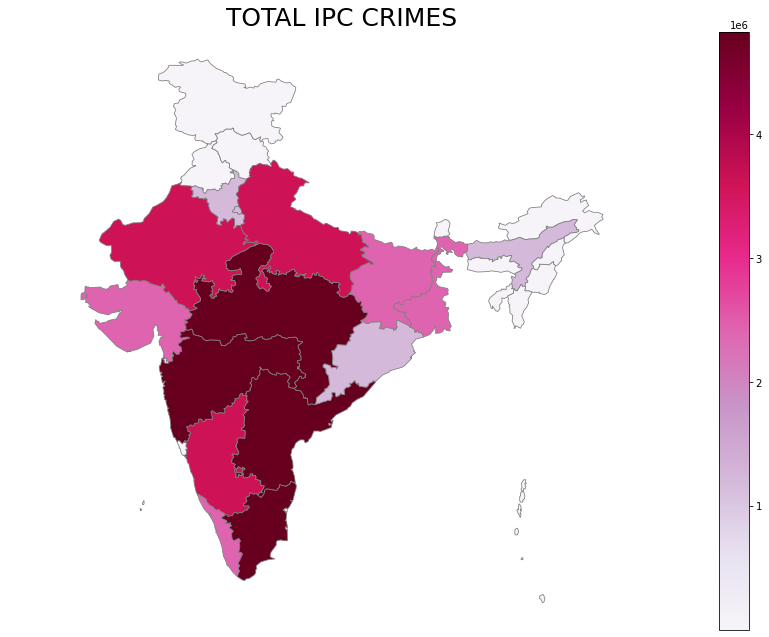

In [31]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('TOTAL IPC CRIMES', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='TOTAL', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['TOTAL'].min(), vmax= merged_Ind["TOTAL"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

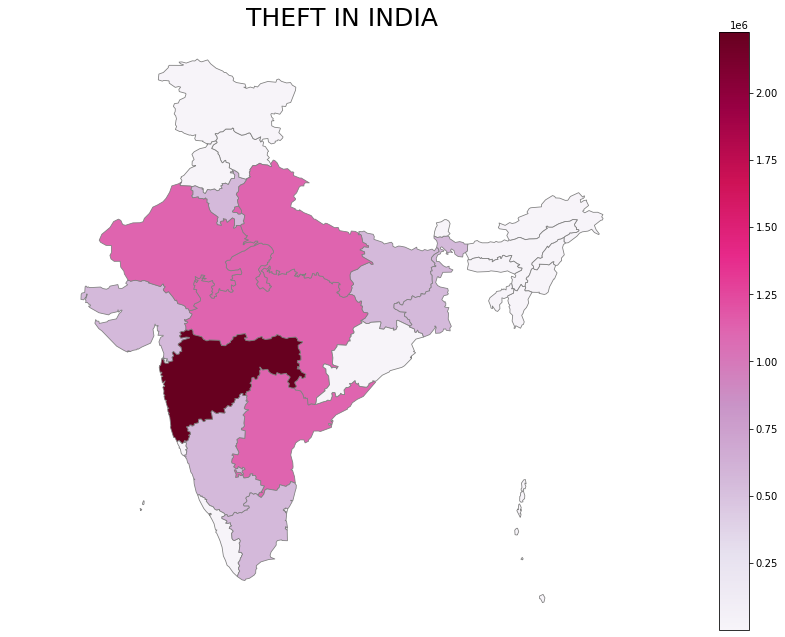

In [32]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('THEFT IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='TOTAL_THEFT', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['TOTAL_THEFT'].min(), vmax= merged_Ind["TOTAL_THEFT"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

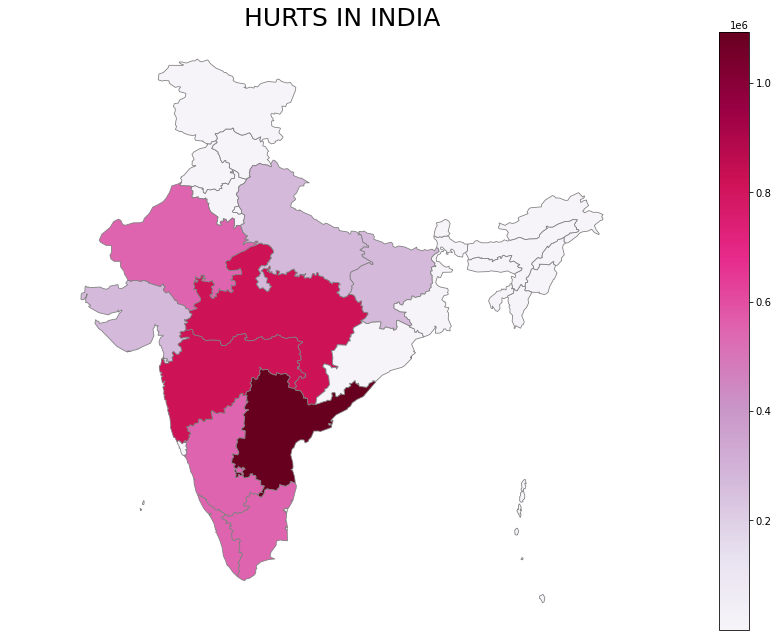

In [33]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('HURTS IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='HURT', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['HURT'].min(), vmax= merged_Ind["HURT"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

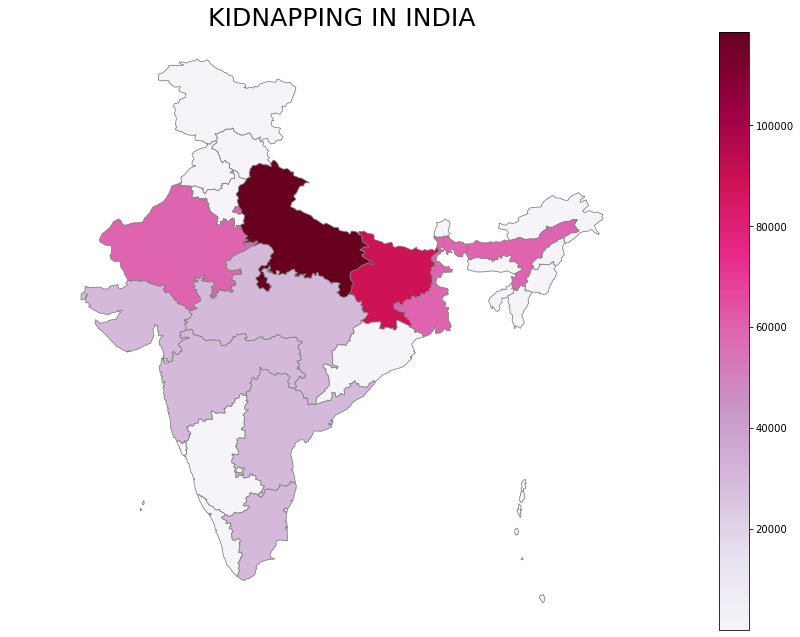

In [34]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('KIDNAPPING IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='KIDNAPPING', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['KIDNAPPING'].min(), vmax= merged_Ind["KIDNAPPING"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

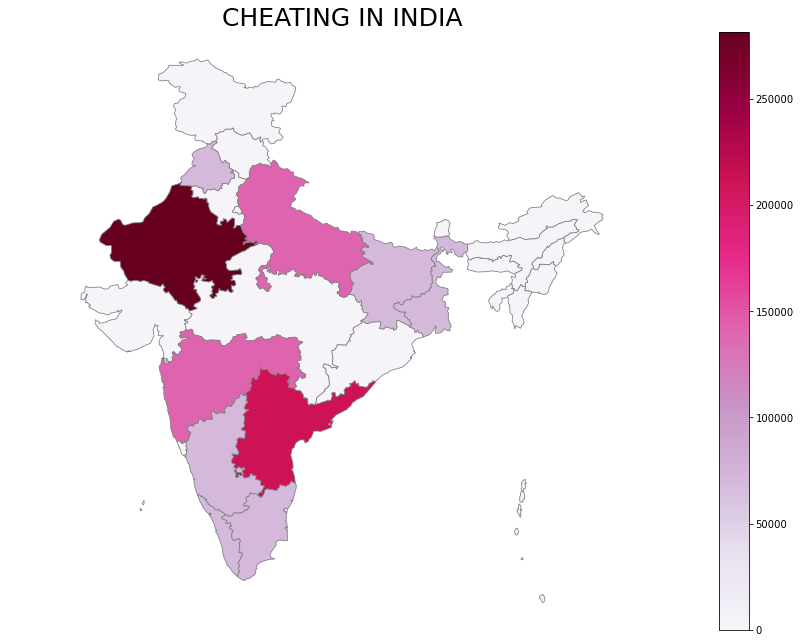

In [35]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('CHEATING IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='CHEATING', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['CHEATING'].min(), vmax= merged_Ind["CHEATING"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

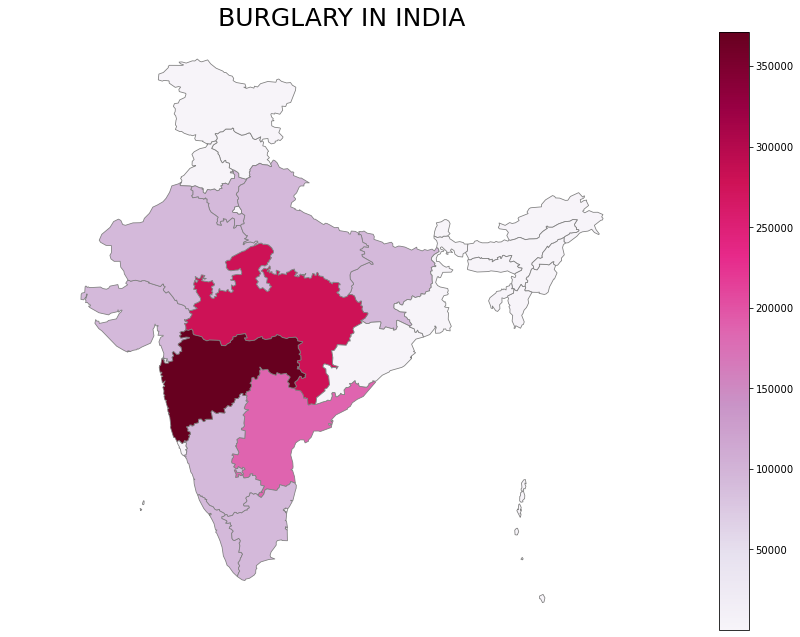

In [36]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('BURGLARY IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='BURGLARY', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['BURGLARY'].min(), vmax= merged_Ind["BURGLARY"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

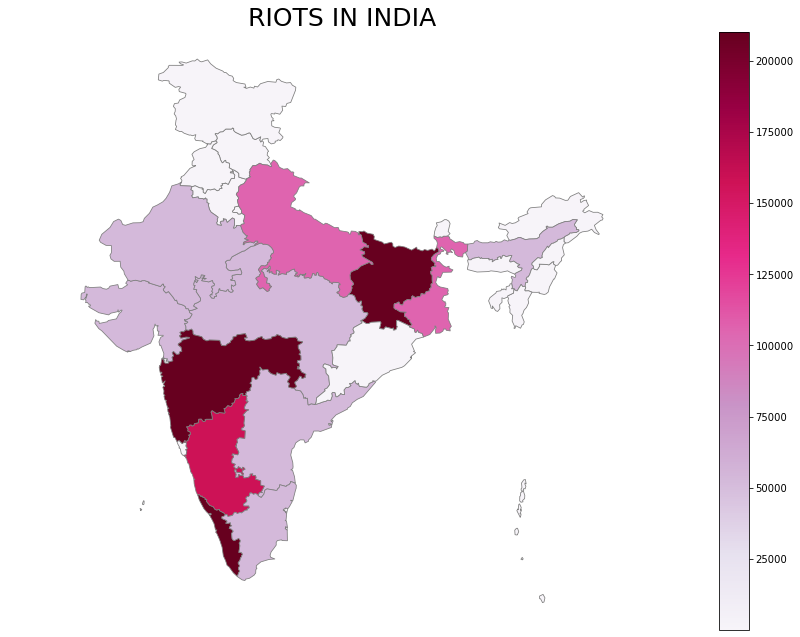

In [37]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('RIOTS IN INDIA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='RIOTS', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['RIOTS'].min(), vmax= merged_Ind["RIOTS"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

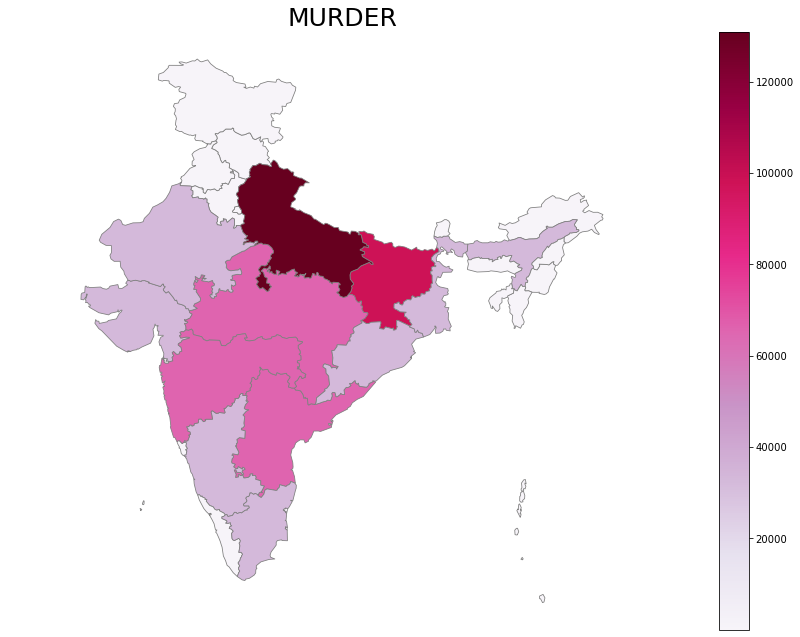

In [38]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('MURDER', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='MURDER', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['MURDER'].min(), vmax= merged_Ind["MURDER"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

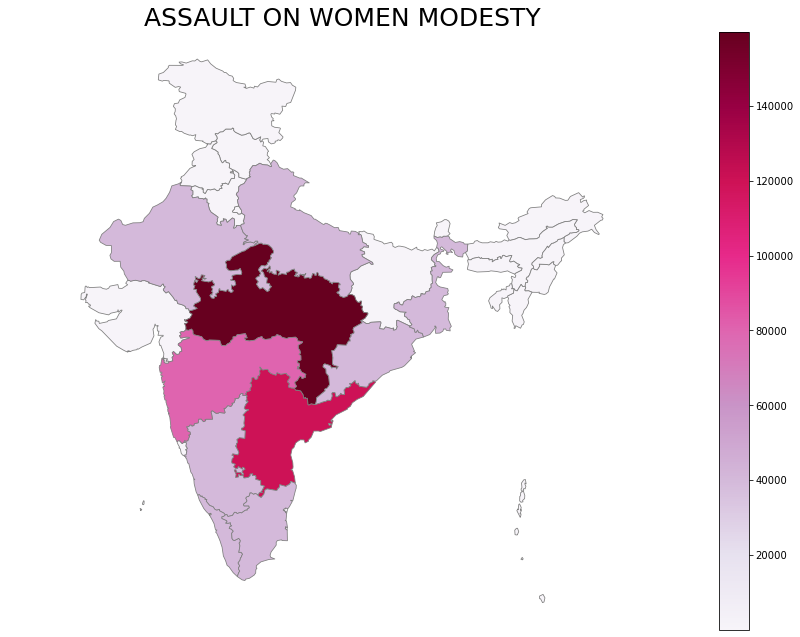

In [39]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('ASSAULT ON WOMEN MODESTY', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='ASSAULT_WOMEN_MODESTY', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['ASSAULT_WOMEN_MODESTY'].min(), vmax= merged_Ind["ASSAULT_WOMEN_MODESTY"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

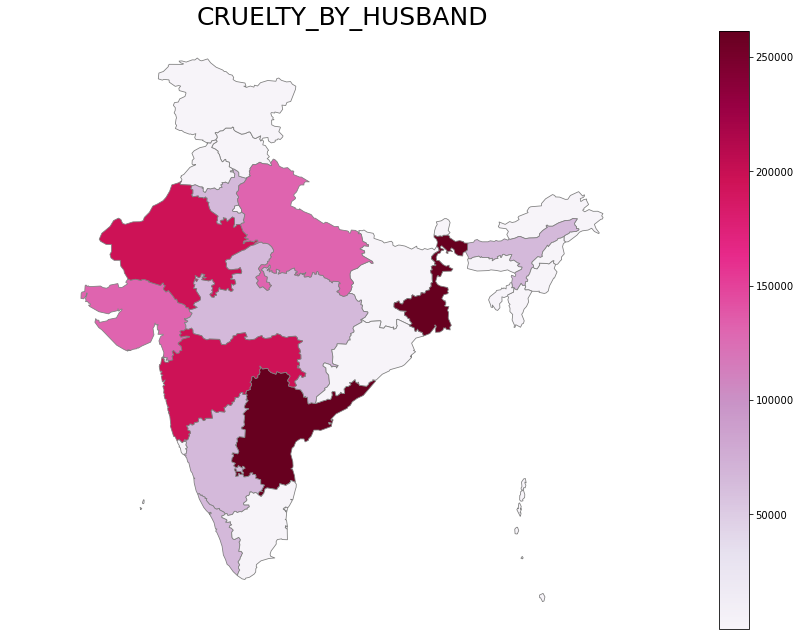

In [40]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('CRUELTY_BY_HUSBAND', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='CRUELTY_BY_HUSBAND', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['CRUELTY_BY_HUSBAND'].min(), vmax= merged_Ind["CRUELTY_BY_HUSBAND"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

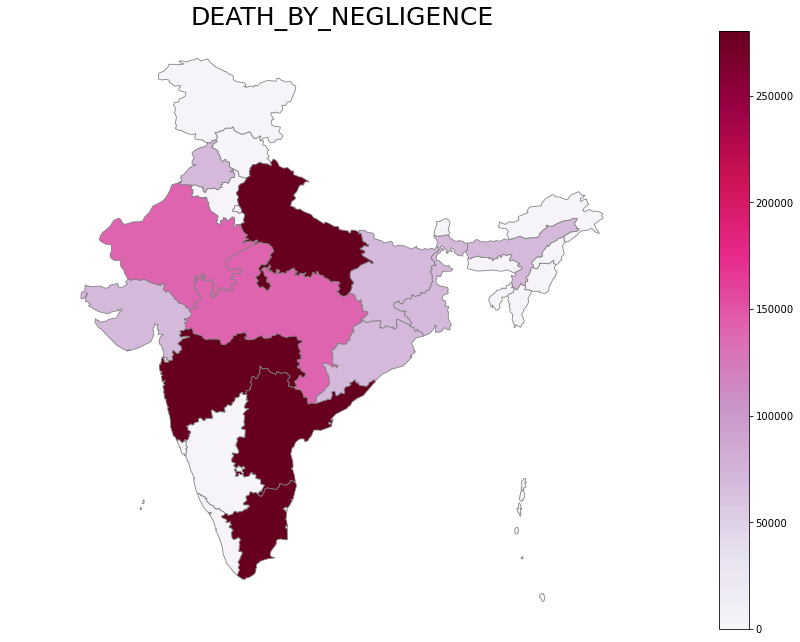

In [41]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('DEATH_BY_NEGLIGENCE', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='DEATH_BY_NEGLIGENCE', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['DEATH_BY_NEGLIGENCE'].min(), vmax= merged_Ind["DEATH_BY_NEGLIGENCE"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

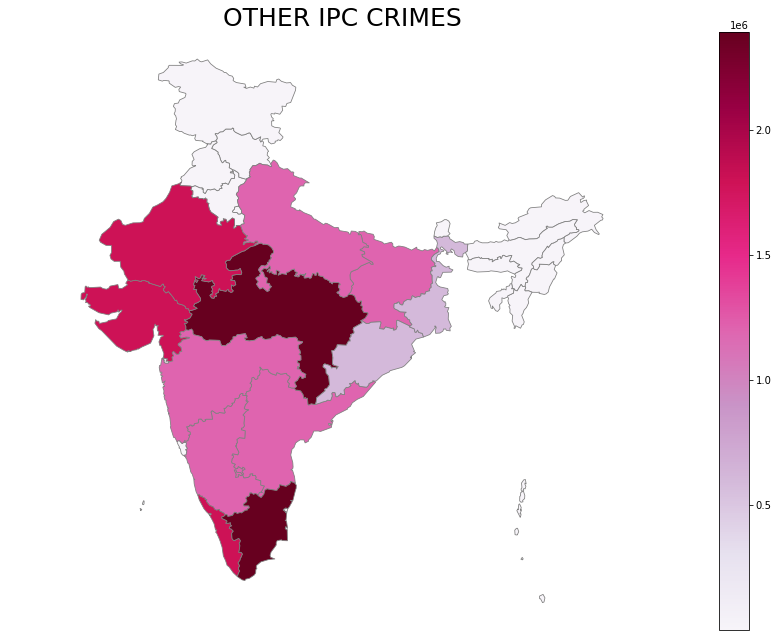

In [42]:
fig, ax = plt.subplots(1, figsize=(15, 11))
ax.axis('off')
ax.set_title('OTHER IPC CRIMES', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_Ind.dropna().plot(column='OTHER IPC CRIMES', cmap='PuRd', figsize=fig, scheme='equal_interval',linewidth=0.8, ax=ax, edgecolor='grey')
norm = Normalize(vmin=merged_Ind['OTHER IPC CRIMES'].min(), vmax= merged_Ind["OTHER IPC CRIMES"].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='PuRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [43]:
crimes_total = crimes_df.groupby(['STATE', "YEAR"]).agg({"TOTAL": sum }).reset_index()

In [44]:
crimes_total

STATE  YEAR   TOTAL
0    A & N ISLANDS  2001    1316
1    A & N ISLANDS  2002    1216
2    A & N ISLANDS  2003    1288
3    A & N ISLANDS  2004    1496
4    A & N ISLANDS  2005    1364
..             ...   ...     ...
415    WEST BENGAL  2008  210838
416    WEST BENGAL  2009  226072
417    WEST BENGAL  2010  259232
418    WEST BENGAL  2011  286394
419    WEST BENGAL  2012  322854

[420 rows x 3 columns]

In [45]:
total_crime_yearwise = crimes_df.groupby(["YEAR"]).agg({"TOTAL": sum }).reset_index()
total_crime_yearwise


YEAR    TOTAL
0   2001  3538616
1   2002  3560660
2   2003  3432240
3   2004  3664020
4   2005  3645204
5   2006  3756586
6   2007  3979346
7   2008  4186758
8   2009  4242690
9   2010  4449662
10  2011  4651150
11  2012  4774376

In [46]:
an_arim = ARIMA(total_crime_yearwise.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,2,0))
an_model = an_arim.fit()
def get_mape(actual, predicted):
    y_actual = np.array(actual)
    y_pred = np.array(predicted)
    return np.round(np.mean(np.abs((y_actual - y_pred)/actual)) * 100,2)
forecast_an = an_model.predict(10,11)
forecast_an
forecast_an_df = an_model.forecast(steps=10)
forecast_an_df
get_mape(total_crime_yearwise.TOTAL[10:12],forecast_an)
i=12
for j in range(len(forecast_an_df)):
    total_crime_yearwise.loc[i] = total_crime_yearwise.YEAR[i-1]+1
    total_crime_yearwise.TOTAL[i] = forecast_an_df[j]
    i = i+1
fig = go.Figure()
fig.add_trace(go.Scatter(x= total_crime_yearwise["YEAR"], y= total_crime_yearwise['TOTAL'],
                    name = "INDIA",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= total_crime_yearwise["YEAR"][12:], y= total_crime_yearwise['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [47]:
#Crimes Trend in Andaman 
crime_AN_df = crimes_total[crimes_total.STATE=="A & N ISLANDS" ]
#ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_AN_df['TOTAL']),
#                                 model = "multiplicative", period=2)
#ts_plot = ts_decompose.plot()
crime_AN_df

STATE  YEAR  TOTAL
0   A & N ISLANDS  2001   1316
1   A & N ISLANDS  2002   1216
2   A & N ISLANDS  2003   1288
3   A & N ISLANDS  2004   1496
4   A & N ISLANDS  2005   1364
5   A & N ISLANDS  2006   1352
6   A & N ISLANDS  2007   1614
7   A & N ISLANDS  2008   1764
8   A & N ISLANDS  2009   1882
9   A & N ISLANDS  2010   1960
10  A & N ISLANDS  2011   1586
11  A & N ISLANDS  2012   1366

In [48]:
crime_AN_forecast = crime_AN_df.copy()
crime_AN_forecast.drop('STATE', axis = 1, inplace = True)

In [49]:
crime_AN_forecast

YEAR  TOTAL
0   2001   1316
1   2002   1216
2   2003   1288
3   2004   1496
4   2005   1364
5   2006   1352
6   2007   1614
7   2008   1764
8   2009   1882
9   2010   1960
10  2011   1586
11  2012   1366

In [597]:
def adfull(ts):
    result = adfuller(ts, autolag=None)
    result_out = pd.Series(result[0:4], index=["Test Stats",
                                              'P-value',
                                              'lags_used',
                                              'Number of observation'])
    print(result_out)
    

In [598]:
adfull(crime_AN_forecast.TOTAL)

Test Stats               -0.700326
P-value                   0.846665
lags_used                 9.000000
Number of observation    12.000000
dtype: float64


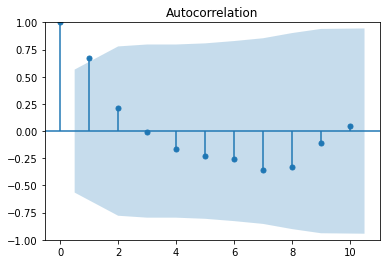

In [53]:
acf_plot = plot_acf(crime_AN_forecast.TOTAL, lags = 10)

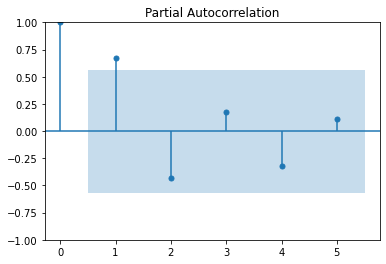

In [54]:
pcf_1 = plot_pacf(crime_AN_forecast.TOTAL, lags = 5, method='ywm')

In [55]:
an_arim = ARIMA(crime_AN_forecast.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,0,0))
an_model = an_arim.fit()
#print(an_model.summary())


In [56]:
def get_mape(actual, predicted):
    y_actual = np.array(actual)
    y_pred = np.array(predicted)
    return np.round(np.mean(np.abs((y_actual - y_pred)/actual)) * 100,2)

In [61]:
forecast_an = an_model.predict(10,11)
forecast_an

array([1912.57603603, 1871.2335549 ])

In [62]:
forecast_an_df = an_model.forecast(steps=10)
forecast_an_df

array([1912.57603603, 1871.2335549 , 1835.19268856, 1803.77357655,
       1776.38354127, 1752.50590808, 1731.69025883, 1713.54393544,
       1697.72463294, 1683.93394231])

In [129]:
get_mape(crime_AN_forecast.TOTAL[10:12],forecast_an)

28.79

In [65]:
i=12
for j in range(len(forecast_an_df)):
    crime_AN_forecast.loc[i] = crime_AN_forecast.YEAR[i-1]+1
    crime_AN_forecast.TOTAL[i] = forecast_an_df[j]
    i = i+1

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crime_AN_df["YEAR"], y= crime_AN_df['TOTAL'],
                    name = "A&N",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crime_AN_forecast["YEAR"][11:], y= crime_AN_forecast['TOTAL'][11:],
                    name = "Estimated",line=dict(color='blue', width=4)))

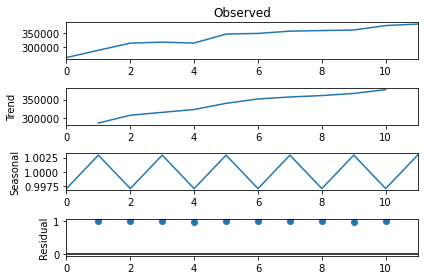

In [67]:
#trend in Andhra Pradesh
crime_AP_df = crimes_total[crimes_total.STATE=='ANDHRA PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_AP_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [68]:
crimes_AP_forecast = crime_AP_df.copy()
crimes_AP_forecast.drop(['STATE'], axis = 1, inplace = True)

In [69]:
crimes_AP_forecast = crimes_AP_forecast.reset_index(drop = True)
crimes_AP_forecast

YEAR   TOTAL
0   2001  260178
1   2002  287220
2   2003  313902
3   2004  317512
4   2005  314246
5   2006  347818
6   2007  350174
7   2008  358550
8   2009  360882
9   2010  362876
10  2011  379560
11  2012  385044

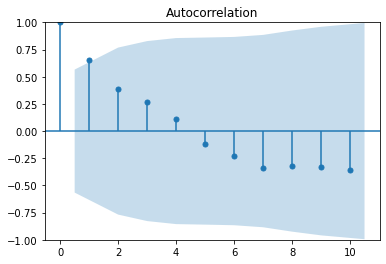

In [70]:
acf_plot = plot_acf(crimes_AP_forecast.TOTAL, lags = 10)

In [71]:
ap_arim = ARIMA(crimes_AP_forecast.TOTAL[:10].astype(np.float64).to_numpy(), order=(1,2,0))
ap_model = ap_arim.fit()
ap_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -90.289
Date:                Wed, 24 Nov 2021   AIC                            184.579
Time:                        14:27:20   BIC                            184.738
Sample:                             0   HQIC                           183.507
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0243      0.179     -0.136      0.892      -0.375       0.326
sigma2      3.244e+08    1.1e-10   2.96e+18      0.000    3.24e+08    3.24e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.70   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.10   Prob(JB):                         0.65
Heteroskedasticity (H):               0.10   Skew:                             0.79
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.68e+34. Standard errors may be unstable.
"""

In [133]:
forecast_ap = ap_model.predict(10,11)
forecast_ap
#crimes_AP_forecast.TOTAL[10:13]

array([364878.20141282, 366880.20382217])

In [134]:
get_mape(crimes_AP_forecast.TOTAL[10:12],forecast_ap)

4.29

In [74]:
forecast_df = ap_model.forecast(steps=10)
forecast_df

array([364878.20141282, 366880.20382217, 368882.21106025, 370884.21818117,
       372886.22530492, 374888.23242861, 376890.23955229, 378892.24667598,
       380894.25379967, 382896.26092336])

In [75]:
i=12
for j in range(len(forecast_df)):
    crimes_AP_forecast.loc[i] = crimes_AP_forecast.YEAR[i-1]+1
    crimes_AP_forecast.TOTAL[i] = forecast_df[j]
    i = i+1

In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crime_AP_df['YEAR'], y= crime_AP_df['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_AP_forecast["YEAR"][11:], y= crimes_AP_forecast['TOTAL'][11:],
                    name = "Estimated",line=dict(color='blue', width=4)))

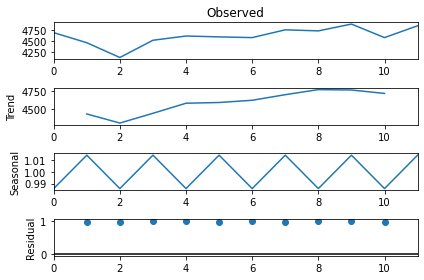

In [77]:
#ARUNACHAL PRADESH
crime_ARU_df = crimes_total[crimes_total.STATE=='ARUNACHAL PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_ARU_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [78]:
crimes_ARU_forecast = crime_ARU_df.copy()
crimes_ARU_forecast.drop(['STATE'], axis = 1, inplace = True)

In [79]:
crimes_ARU_forecast = crimes_ARU_forecast.reset_index(drop = True)

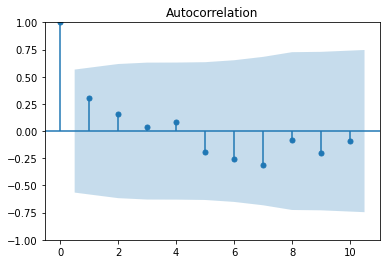

In [80]:
acf_plot = plot_acf(crimes_ARU_forecast.TOTAL, lags = 10)

In [81]:
crimes_ARU_forecast

YEAR  TOTAL
0   2001   4684
1   2002   4456
2   2003   4122
3   2004   4512
4   2005   4608
5   2006   4588
6   2007   4572
7   2008   4748
8   2009   4724
9   2010   4878
10  2011   4572
11  2012   4840

In [82]:
aru_arim = ARIMA(crimes_ARU_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,0,0))
aru_model = aru_arim.fit()
aru_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -65.948
Date:                Wed, 24 Nov 2021   AIC                            137.897
Time:                        14:27:36   BIC                            138.804
Sample:                             0   HQIC                           136.901
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4616.5568    147.835     31.228      0.000    4326.805    4906.309
ar.L1          0.4525      0.484      0.936      0.349      -0.495       1.400
sigma2      3.061e+04   2.09e+04      1.464      0.143   -1.04e+04    7.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.68   Prob(JB):                         0.28
Heteroskedasticity (H):               0.32   Skew:                            -1.18
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
forecast_aru = aru_model.predict(10,11)
forecast_aru

array([4734.8709816, 4670.0990084])

In [136]:
get_mape(crimes_AP_forecast.TOTAL[10:12],forecast_aru)

98.77

In [85]:
forecast_df_aru = aru_model.forecast(steps=10)
forecast_df_aru

array([4734.8709816 , 4670.0990084 , 4640.78693348, 4627.52197188,
       4621.51901213, 4618.80241733, 4617.57304254, 4617.01669812,
       4616.76492859, 4616.65099216])

In [86]:
i=12
for j in range(len(forecast_df_aru)):
    crimes_ARU_forecast.loc[i] = crimes_ARU_forecast.YEAR[i-1]+1
    crimes_ARU_forecast.TOTAL[i] = forecast_df_aru[j]
    i = i+1

In [87]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_ARU_forecast["YEAR"], y= crimes_ARU_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_ARU_forecast["YEAR"][12:], y= crimes_ARU_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

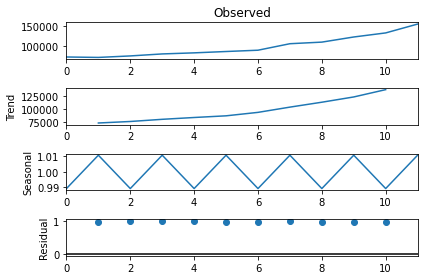

In [88]:
#ASSAM
crime_Assam_df = crimes_total[crimes_total.STATE=='ASSAM']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_Assam_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [89]:
def plot(dataframe):
	acf_plot = plot_acf(dataframe.TOTAL, lags = 10)
	pcf_1 = plot_pacf(dataframe.TOTAL, lags = 5 , method='ywm')
	return acf_plot, pcf_1

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

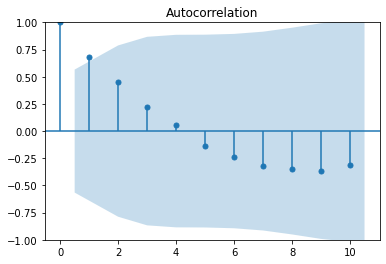

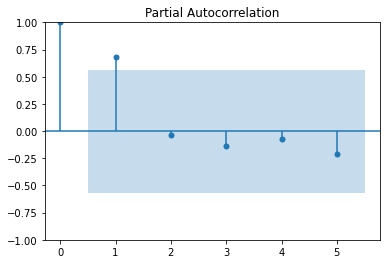

In [90]:
crimes_Assam_forecast = crime_Assam_df.copy()
crimes_Assam_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_Assam_forecast = crimes_Assam_forecast.reset_index(drop = True)
plot(crimes_Assam_forecast)

In [91]:
Assam_arim = ARIMA(crimes_Assam_forecast.TOTAL[:10].astype(np.float64).to_numpy(), order=(0,2,0))
Assam_moAssam = Assam_arim.fit()
Assam_moAssam.summary()
forecast_Assam = Assam_moAssam.predict(10,12)
forecast_Assam

array([136046., 148756., 161466.])

In [92]:
forecast_Assam = Assam_moAssam.predict(10,11)
forecast_Assam

array([136046., 148756.])

In [93]:
forecast_df_Assam = Assam_moAssam.forecast(steps=10)
forecast_df_Assam


array([136046., 148756., 161466., 174176., 186886., 199596., 212306.,
       225016., 237726., 250436.])

In [131]:
get_mape(crimes_Assam_forecast.TOTAL[10:12],forecast_Assam)


3.11

In [95]:
i=12
for j in range(len(forecast_df_Assam)):
    crimes_Assam_forecast.loc[i] = crimes_Assam_forecast.YEAR[i-1]+1
    crimes_Assam_forecast.TOTAL[i] = forecast_df_Assam[j]
    i = i+1

In [96]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_Assam_forecast["YEAR"], y= crimes_Assam_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_Assam_forecast["YEAR"][12:], y= crimes_Assam_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

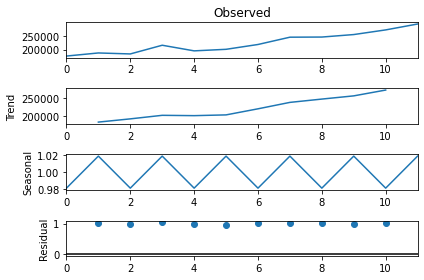

In [97]:
#BIHAR
crime_BIH_df = crimes_total[crimes_total.STATE=='BIHAR']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_BIH_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

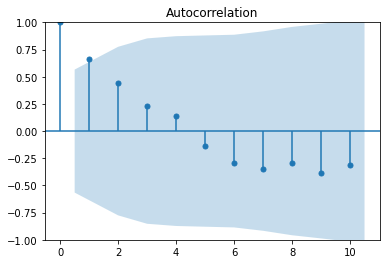

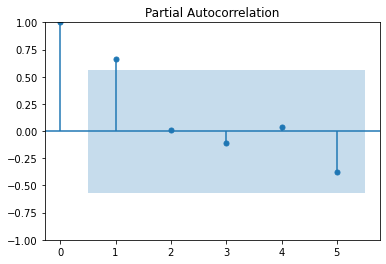

In [98]:
crimes_BIH_forecast = crime_BIH_df.copy()
crimes_BIH_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_BIH_forecast = crimes_BIH_forecast.reset_index(drop = True)
plot(crimes_BIH_forecast)

In [99]:
crimes_BIH_forecast

YEAR   TOTAL
0   2001  176864
1   2002  188080
2   2003  184526
3   2004  216120
4   2005  195700
5   2006  201330
6   2007  218840
7   2008  245338
8   2009  245862
9   2010  254906
10  2011  271792
11  2012  293228

In [100]:
BIH_arim = ARIMA(crimes_BIH_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,2,1))
BIH_mo = BIH_arim.fit()
BIH_mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -92.064
Date:                Wed, 24 Nov 2021   AIC                            190.128
Time:                        14:28:02   BIC                            190.366
Sample:                             0   HQIC                           188.520
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5749      0.358      1.605      0.108      -0.127       1.277
ma.L1         -1.0000      0.510     -1.962      0.050      -1.999      -0.001
sigma2      5.196e+08   9.81e-10    5.3e+17      0.000     5.2e+08     5.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.31   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.04   Prob(JB):                         0.67
Heteroskedasticity (H):               0.18   Skew:                            -0.71
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+33. Standard errors may be unstable.
"""

In [107]:
forecast_BIH = BIH_mo.predict(10,11)
forecast_BIH

array([268392.8367203 , 284434.05575179])

In [108]:
forecast_df_BIH = BIH_mo.forecast(steps=10)
forecast_df_BIH


array([268392.8367203 , 284434.05575179, 301943.90156446, 320298.12553183,
       339137.81965221, 358256.63192378, 377535.92150141, 396907.47654315,
       416332.07905981, 435787.18090383])

In [109]:
get_mape(crimes_BIH_forecast.TOTAL[10:12],forecast_BIH)


2.12

In [110]:
i=12
for j in range(len(forecast_df_BIH)):
    crimes_BIH_forecast.loc[i] = crimes_BIH_forecast.YEAR[i-1]+1
    crimes_BIH_forecast.TOTAL[i] = forecast_df_BIH[j]
    i = i+1

In [111]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_BIH_forecast["YEAR"], y= crimes_BIH_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_BIH_forecast["YEAR"][12:], y= crimes_BIH_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

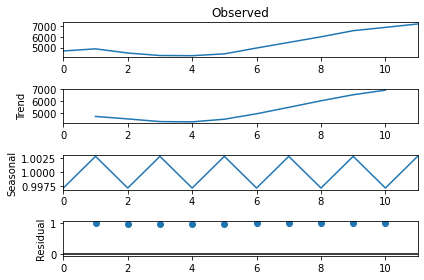

In [112]:
#GOA
crime_GOA_df = crimes_total[crimes_total.STATE=='GOA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_GOA_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

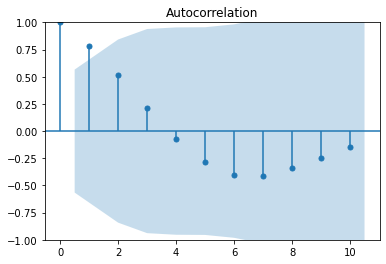

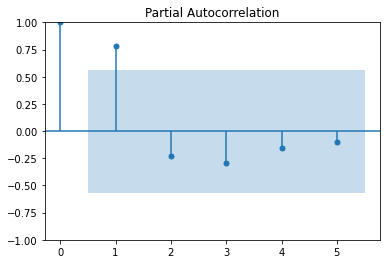

In [113]:
crimes_GOA_forecast = crime_GOA_df.copy()
crimes_GOA_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_GOA_forecast = crimes_GOA_forecast.reset_index(drop = True)
plot(crimes_GOA_forecast)

In [114]:
GOA_arim = ARIMA(crimes_GOA_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,0))
GOA_moGOA = GOA_arim.fit()
GOA_moGOA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -63.275
Date:                Wed, 24 Nov 2021   AIC                            130.550
Time:                        14:29:05   BIC                            130.944
Sample:                             0   HQIC                           129.698
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7002      0.229      3.056      0.002       0.251       1.149
sigma2      6.347e+04   2.79e+04      2.277      0.023    8841.685    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.83   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.18   Prob(JB):                         0.27
Heteroskedasticity (H):               0.29   Skew:                            -1.20
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
forecast_GOA = GOA_moGOA.predict(10,11)
forecast_GOA

array([6989.29944074, 7271.67867495])

In [116]:
forecast_df_GOA = GOA_moGOA.forecast(steps=10)
forecast_df_GOA

array([6989.29944074, 7271.67867495, 7469.39288889, 7607.82697207,
       7704.75472958, 7772.62089346, 7820.13892461, 7853.40974993,
       7876.70507154, 7893.01581837])

In [117]:
get_mape(crimes_GOA_forecast.TOTAL[10:13],forecast_GOA)

1.05

In [118]:
i=12
for j in range(len(forecast_df_GOA)):
    crimes_GOA_forecast.loc[i] = crimes_GOA_forecast.YEAR[i-1]+1
    crimes_GOA_forecast.TOTAL[i] = forecast_df_GOA[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_GOA_forecast["YEAR"], y= crimes_GOA_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_GOA_forecast["YEAR"][12:], y= crimes_GOA_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [119]:
#GUJRAT

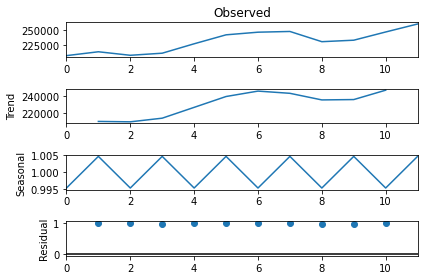

In [120]:
crime_GUJ_df = crimes_total[crimes_total.STATE=='GUJARAT']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_GUJ_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

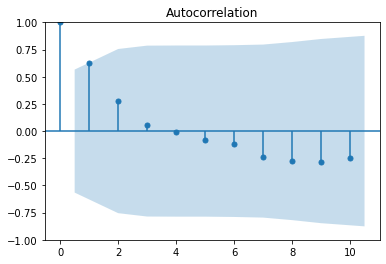

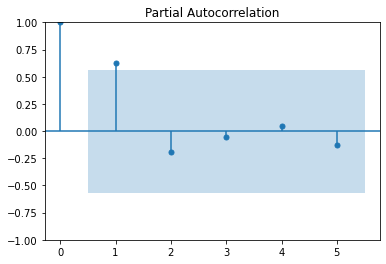

In [121]:
crimes_GUJ_forecast = crime_GUJ_df.copy()
crimes_GUJ_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_GUJ_forecast = crimes_GUJ_forecast.reset_index(drop = True)
plot(crimes_GUJ_forecast)

In [122]:
GUJ_arim = ARIMA(crimes_GUJ_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(0,2,1))
GUJ_moGUJ = GUJ_arim.fit()
GUJ_moGUJ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -86.420
Date:                Wed, 24 Nov 2021   AIC                            176.839
Time:                        14:29:18   BIC                            176.998
Sample:                             0   HQIC                           175.768
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0575      0.383      0.150      0.880      -0.692       0.807
sigma2      1.618e+08   8.22e-10   1.97e+17      0.000    1.62e+08    1.62e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.57   Prob(JB):                         0.88
Heteroskedasticity (H):               3.38   Skew:                             0.04
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+33. Standard errors may be unstable.
"""

In [126]:
forecast_GUJ = GUJ_moGUJ.predict(10,11)
forecast_GUJ

array([236587.20144967, 240296.40289934])

In [124]:
forecast_df_GUJ = GUJ_moGUJ.forecast(steps=10)
forecast_df_GUJ


array([236587.20144967, 240296.40289934, 244005.60434901, 247714.80579867,
       251424.00724834, 255133.20869801, 258842.41014768, 262551.61159735,
       266260.81304702, 269970.01449668])

In [127]:
get_mape(crimes_GUJ_forecast.TOTAL[10:13],forecast_GUJ)


5.89

In [137]:
i=12
for j in range(len(forecast_df_GUJ)):
    crimes_GUJ_forecast.loc[i] = crimes_GUJ_forecast.YEAR[i-1]+1
    crimes_GUJ_forecast.TOTAL[i] = forecast_df_GUJ[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_GUJ_forecast["YEAR"], y= crimes_GUJ_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_GUJ_forecast["YEAR"][12:], y= crimes_GUJ_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [138]:
#HARYANA

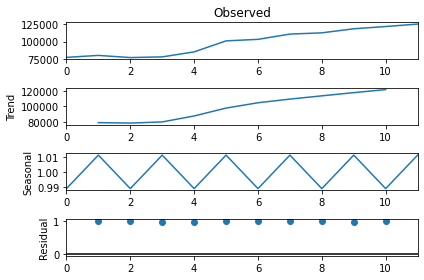

In [139]:
crime_HAR_df = crimes_total[crimes_total.STATE=='HARYANA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_HAR_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

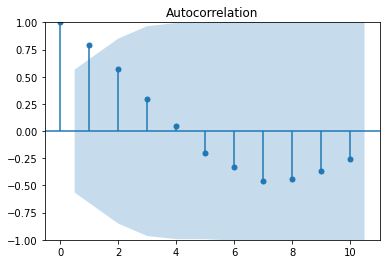

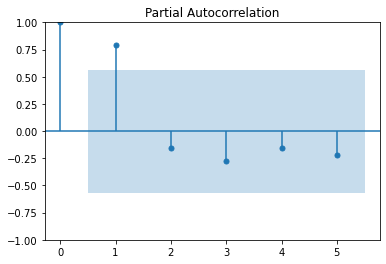

In [140]:
crimes_HAR_forecast = crime_HAR_df.copy()
crimes_HAR_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_HAR_forecast = crimes_HAR_forecast.reset_index(drop = True)
plot(crimes_HAR_forecast)

In [141]:
HAR_arim = ARIMA(crimes_HAR_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,3,1))
HAR_moHAR = HAR_arim.fit()
HAR_moHAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 -72.072
Date:                Wed, 24 Nov 2021   AIC                            150.143
Time:                        14:32:46   BIC                            149.981
Sample:                             0   HQIC                           148.138
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4469      0.419     -1.067      0.286      -1.268       0.374
ma.L1         -1.0000      0.731     -1.368      0.171      -2.432       0.432
sigma2      4.489e+07   1.63e-08   2.76e+15      0.000    4.49e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.98   Prob(JB):                         0.86
Heteroskedasticity (H):               0.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.8e+32. Standard errors may be unstable.
"""

In [145]:
forecast_HAR = HAR_moHAR.predict(10,11)
print('prediction',forecast_HAR)

forecast_df_HAR = HAR_moHAR.forecast(steps=10)
print('forecasting',forecast_df_HAR)

prediction [122621.81946021 128022.2616227 ]
forecasting [122621.81946021 128022.2616227  133360.31873453 139119.11308594
 145082.72842036 151347.66169269 157870.78663511 164671.37717164
 171740.81943038 179082.96310944]


In [146]:
get_mape(crimes_HAR_forecast.TOTAL[10:12],forecast_HAR)


1.69

In [147]:
i=12
for j in range(len(forecast_df_HAR)):
    crimes_HAR_forecast.loc[i] = crimes_HAR_forecast.YEAR[i-1]+1
    crimes_HAR_forecast.TOTAL[i] = forecast_df_HAR[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_HAR_forecast["YEAR"], y= crimes_HAR_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_HAR_forecast["YEAR"][12:], y= crimes_HAR_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [148]:
#crime in HIMACHAL Pradesh

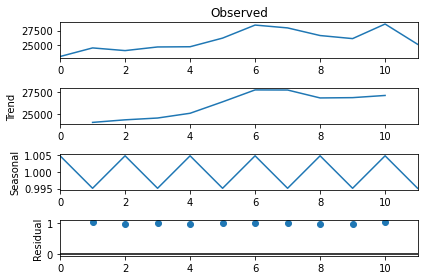

In [149]:
crime_HIM_df = crimes_total[crimes_total.STATE=='HIMACHAL PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_HIM_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

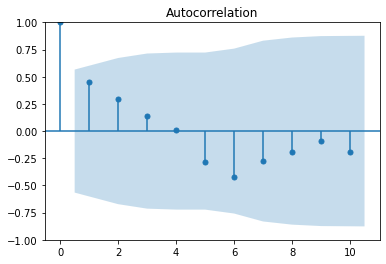

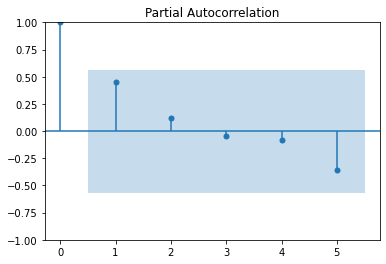

In [150]:
crimes_HIM_forecast = crime_HIM_df.copy()
crimes_HIM_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_HIM_forecast = crimes_HIM_forecast.reset_index(drop = True)
plot(crimes_HIM_forecast)

In [151]:
HIM_arim = ARIMA(crimes_HIM_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,3,0))
HIM_moHIM = HIM_arim.fit()
HIM_moHIM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 3, 0)   Log Likelihood                 -61.716
Date:                Wed, 24 Nov 2021   AIC                            131.431
Time:                        14:33:09   BIC                            131.215
Sample:                             0   HQIC                           128.757
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0208      0.386     -0.054      0.957      -0.777       0.735
ar.L2         -0.1913      0.233     -0.821      0.411      -0.648       0.265
ar.L3          0.1250      0.268      0.467      0.640      -0.399       0.650
sigma2      2.532e+06   2.79e+06      0.906      0.365   -2.95e+06    8.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.80   Prob(JB):                         0.55
Heteroskedasticity (H):               2.02   Skew:                            -0.98
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
forecast_HIM = HIM_moHIM.predict(10,11)
print('prediction',forecast_HIM)

forecast_df_HIM = HIM_moHIM.forecast(steps=10)
print('forecasting',forecast_df_HIM)

prediction [25515.71920824 24830.77942356]
forecasting [25515.71920824 24830.77942356 24407.6206577  24143.59955449
 23964.57363241 23937.29826233 24061.73396813 24315.83762813
 24708.42341702 25243.52045256]


In [153]:
get_mape(crimes_HIM_forecast.TOTAL[10:12],forecast_HIM)


5.99

In [154]:
i=12
for j in range(len(forecast_df_HIM)):
    crimes_HIM_forecast.loc[i] = crimes_HIM_forecast.YEAR[i-1]+1
    crimes_HIM_forecast.TOTAL[i] = forecast_df_HIM[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_HIM_forecast["YEAR"], y= crimes_HIM_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_HIM_forecast["YEAR"][12:], y= crimes_HIM_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

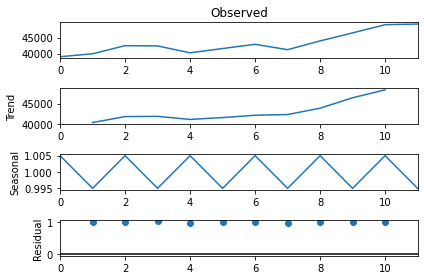

In [155]:
crime_JK_df = crimes_total[crimes_total.STATE=='JAMMU & KASHMIR']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_JK_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

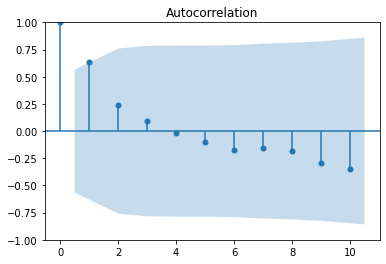

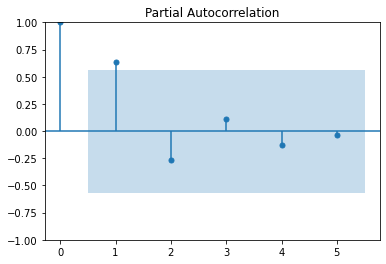

In [156]:
crimes_JK_forecast = crime_JK_df.copy()
crimes_JK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_JK_forecast = crimes_JK_forecast.reset_index(drop = True)
plot(crimes_JK_forecast)

In [157]:
JK_arim = ARIMA(crimes_JK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,0,0))
JK_moJK = JK_arim.fit()
JK_moJK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -89.062
Date:                Wed, 24 Nov 2021   AIC                            186.124
Time:                        14:33:20   BIC                            187.335
Sample:                             0   HQIC                           184.797
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.201e+04    779.942     53.861      0.000    4.05e+04    4.35e+04
ar.L1          0.6754      0.539      1.253      0.210      -0.381       1.732
ar.L2         -0.3849      0.688     -0.560      0.576      -1.732       0.963
sigma2      2.924e+06   2.09e+06      1.397      0.162   -1.18e+06    7.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.68   Prob(JB):                         0.74
Heteroskedasticity (H):               2.75   Skew:                             0.30
Prob(H) (two-sided):                  0.43   Kurtosis:                         1.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
forecast_JK = JK_moJK.predict(10,11)
print('prediction',forecast_JK)
forecast_df_JK = JK_moJK.forecast(steps=10)
print('forecasting',forecast_df_JK)

prediction [44258.3826783  41820.30424436]
forecasting [44258.3826783  41820.30424436 41015.5864077  41410.40296011
 41986.75548404 42224.06635295 42162.52927937 42029.63774357
 41963.56804645 41970.08982508]


In [159]:
get_mape(crimes_JK_forecast.TOTAL[10:12],forecast_JK)

	

12.36

In [160]:
i=12
for j in range(len(forecast_df_JK)):
    crimes_JK_forecast.loc[i] = crimes_JK_forecast.YEAR[i-1]+1
    crimes_JK_forecast.TOTAL[i] = forecast_df_JK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_JK_forecast["YEAR"], y= crimes_JK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_JK_forecast["YEAR"][12:], y= crimes_JK_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

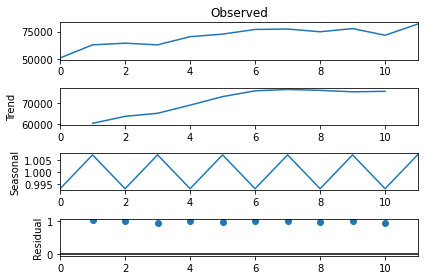

In [161]:
crime_JAR_df = crimes_total[crimes_total.STATE=='JHARKHAND']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_JAR_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

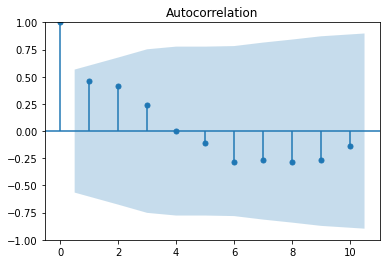

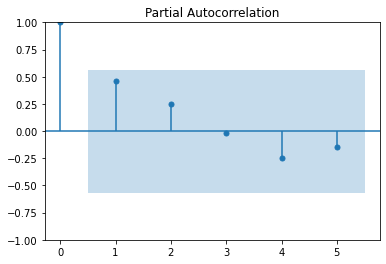

In [162]:
crimes_JAR_forecast = crime_JAR_df.copy()
crimes_JAR_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_JAR_forecast = crimes_JAR_forecast.reset_index(drop = True)
plot(crimes_JAR_forecast)

In [163]:
JAR_arim = ARIMA(crimes_JAR_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,0))
JAR_moJAR = JAR_arim.fit()
JAR_moJAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -85.816
Date:                Wed, 24 Nov 2021   AIC                            175.632
Time:                        14:33:28   BIC                            176.026
Sample:                             0   HQIC                           174.781
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2402      0.328      0.733      0.464      -0.402       0.883
sigma2      1.203e+07   5.58e+06      2.154      0.031    1.08e+06     2.3e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.36   Prob(JB):                         0.57
Heteroskedasticity (H):               3.33   Skew:                             0.86
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
forecast_JAR = JAR_moJAR.predict(10,11)
print('prediction',forecast_JAR)
forecast_df_JAR = JAR_moJAR.forecast(steps=10)
print('forecasting',forecast_df_JAR)

prediction [78476.12110633 78643.83379701]
forecasting [78476.12110633 78643.83379701 78684.12415116 78693.80327938
 78696.12853874 78696.68714598 78696.82134265 78696.8535813
 78696.86132613 78696.86318671]


In [167]:
get_mape(crimes_JAR_forecast.TOTAL[10:12],forecast_JAR)


6.73

In [168]:
i=12
for j in range(len(forecast_df_JAR)):
    crimes_JAR_forecast.loc[i] = crimes_JAR_forecast.YEAR[i-1]+1
    crimes_JAR_forecast.TOTAL[i] = forecast_df_JAR[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_JAR_forecast["YEAR"], y= crimes_JAR_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_JAR_forecast["YEAR"][12:], y= crimes_JAR_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

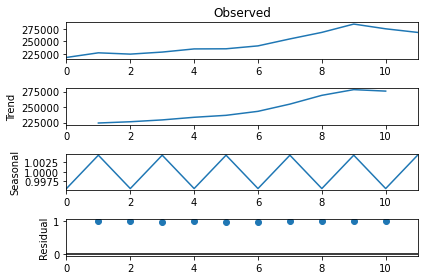

In [169]:
crime_KAR_df = crimes_total[crimes_total.STATE=='KARNATAKA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_KAR_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

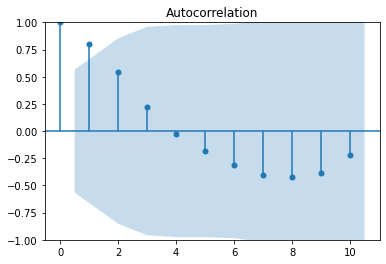

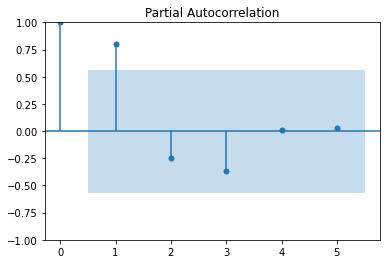

In [170]:
crimes_KAR_forecast = crime_KAR_df.copy()
crimes_KAR_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_KAR_forecast = crimes_KAR_forecast.reset_index(drop = True)
plot(crimes_KAR_forecast)

In [171]:
KAR_arim = ARIMA(crimes_KAR_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,0))
KAR_moKAR = KAR_arim.fit()
KAR_moKAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -95.589
Date:                Wed, 24 Nov 2021   AIC                            195.177
Time:                        14:33:48   BIC                            195.572
Sample:                             0   HQIC                           194.326
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0530      0.077      0.685      0.494      -0.099       0.205
sigma2      4.051e+07   3.17e-10   1.28e+17      0.000    4.05e+07    4.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.07   Prob(JB):                         0.71
Heteroskedasticity (H):              18.64   Skew:                             0.13
Prob(H) (two-sided):                  0.04   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.8e+33. Standard errors may be unstable.
"""

In [175]:
forecast_KAR = KAR_moKAR.predict(10,11)
print('prediction',forecast_KAR)
forecast_df_KAR = KAR_moKAR.forecast(steps=10)
print('forecasting',forecast_df_KAR)

prediction [285520.88446255 285567.3172138 ]
forecasting [285520.88446255 285567.3172138  285569.775919   285569.90611226
 285569.91300625 285569.9133713  285569.91339063 285569.91339165
 285569.91339171 285569.91339171]


In [176]:
get_mape(crimes_KAR_forecast.TOTAL[10:12],forecast_KAR)


5.14

In [177]:
i=12
for j in range(len(forecast_df_KAR)):
    crimes_KAR_forecast.loc[i] = crimes_KAR_forecast.YEAR[i-1]+1
    crimes_KAR_forecast.TOTAL[i] = forecast_df_KAR[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_KAR_forecast["YEAR"], y= crimes_KAR_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_KAR_forecast["YEAR"][12:], y= crimes_KAR_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

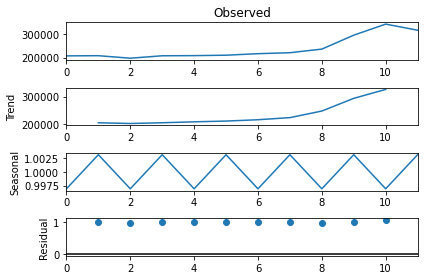

In [178]:
crime_KER_df = crimes_total[crimes_total.STATE=='KERALA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_KER_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

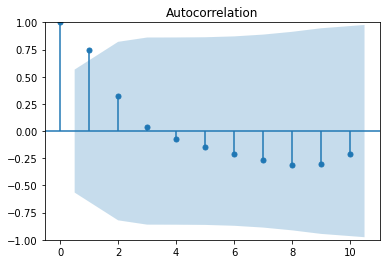

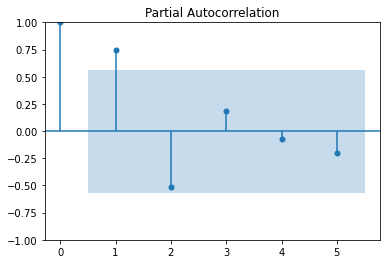

In [179]:
crimes_KER_forecast = crime_KER_df.copy()
crimes_KER_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_KER_forecast = crimes_KER_forecast.reset_index(drop = True)
plot(crimes_KER_forecast)

In [180]:
KER_arim = ARIMA(crimes_KER_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(0,1,0))
KER_moKER = KER_arim.fit()
KER_moKER.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -102.530
Date:                Wed, 24 Nov 2021   AIC                            207.059
Time:                        14:34:06   BIC                            207.256
Sample:                             0   HQIC                           206.633
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.115e+08   1.02e+08      4.045      0.000    2.12e+08    6.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 7.62
Prob(Q):                              0.56   Prob(JB):                         0.02
Heteroskedasticity (H):              17.14   Skew:                             1.86
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [183]:
forecast_KER = KER_moKER.predict(10,11)
print('prediction',forecast_KER)
forecast_df_KER = KER_moKER.forecast(steps=10)
print('forecasting',forecast_df_KER)

prediction [296626. 296626.]
forecasting [296626. 296626. 296626. 296626. 296626. 296626. 296626. 296626. 296626.
 296626.]


In [184]:
get_mape(crimes_KER_forecast.TOTAL[10:12],forecast_KER)


10.28

In [185]:
i=12
for j in range(len(forecast_df_KER)):
    crimes_KER_forecast.loc[i] = crimes_KER_forecast.YEAR[i-1]+1
    crimes_KER_forecast.TOTAL[i] = forecast_df_KER[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_KER_forecast["YEAR"], y= crimes_KER_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_KER_forecast["YEAR"][12:], y= crimes_KER_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

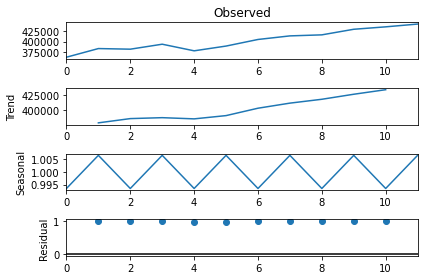

In [186]:
crime_MP_df = crimes_total[crimes_total.STATE=='MADHYA PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MP_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

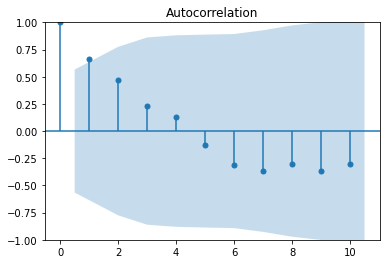

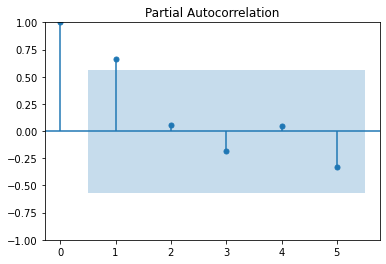

In [187]:
crimes_MP_forecast = crime_MP_df.copy()
crimes_MP_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MP_forecast = crimes_MP_forecast.reset_index(drop = True)
plot(crimes_MP_forecast)

In [188]:
MP_arim = ARIMA(crimes_MP_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,0,0))
MP_moMP = MP_arim.fit()
MP_moMP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -109.057
Date:                Wed, 24 Nov 2021   AIC                            224.114
Time:                        14:34:24   BIC                            225.022
Sample:                             0   HQIC                           223.118
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.953e+05   1.96e+04     20.152      0.000    3.57e+05    4.34e+05
ar.L1          0.8826      0.215      4.114      0.000       0.462       1.303
sigma2      1.348e+08      0.765   1.76e+08      0.000    1.35e+08    1.35e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.18   Prob(JB):                         0.50
Heteroskedasticity (H):               0.69   Skew:                            -0.83
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+24. Standard errors may be unstable.
"""

In [192]:
forecast_MP = MP_moMP.predict(10,11)
print('prediction',forecast_MP)
forecast_df_MP = MP_moMP.forecast(steps=10)
print('forecasting',forecast_df_MP)


prediction [424633.27946121 421186.83767649]
forecasting [424633.27946121 421186.83767649 418144.88861574 415459.9588632
 413090.14673548 410998.46835343 409152.28046253 407522.77099407
 406084.50941685 404815.04986198]


In [193]:
get_mape(crimes_MP_forecast.TOTAL[10:12],forecast_MP)

	

3.31

In [194]:
i=12
for j in range(len(forecast_df_MP)):
    crimes_MP_forecast.loc[i] = crimes_MP_forecast.YEAR[i-1]+1
    crimes_MP_forecast.TOTAL[i] = forecast_df_MP[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MP_forecast["YEAR"], y= crimes_MP_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MP_forecast["YEAR"][13:], y= crimes_MP_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

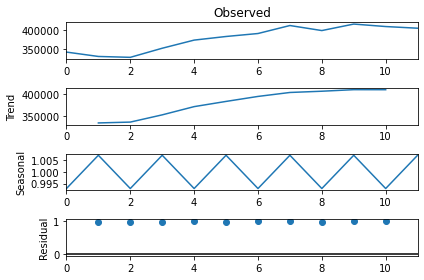

In [195]:
crime_MAH_df = crimes_total[crimes_total.STATE=='MAHARASHTRA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MAH_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

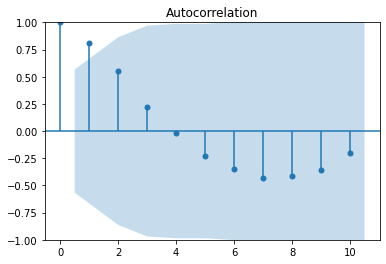

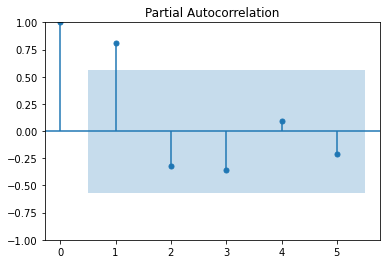

In [196]:
crimes_MAH_forecast = crime_MAH_df.copy()
crimes_MAH_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MAH_forecast = crimes_MAH_forecast.reset_index(drop = True)
plot(crimes_MAH_forecast)

In [197]:
MAH_arim = ARIMA(crimes_MAH_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,0))
MAH_moMAH = MAH_arim.fit()
MAH_moMAH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -88.998
Date:                Wed, 24 Nov 2021   AIC                            183.995
Time:                        14:34:42   BIC                            184.234
Sample:                             0   HQIC                           182.388
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1219      0.177     -0.688      0.491      -0.469       0.225
ar.L2         -0.0881      0.162     -0.543      0.587      -0.406       0.230
sigma2      2.195e+08   3.48e-10    6.3e+17      0.000     2.2e+08     2.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.88   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.03   Prob(JB):                         0.99
Heteroskedasticity (H):              68.59   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+33. Standard errors may be unstable.
"""

In [200]:
forecast_MAH = MAH_moMAH.predict(10,11)
print('prediction',forecast_MAH)
forecast_df_MAH = MAH_moMAH.forecast(steps=10)
print('forecasting',forecast_df_MAH)

prediction [432794.67263177 446654.69639591]
forecasting [432794.67263177 446654.69639591 460891.55004464 475311.47771707
 489675.87897527 504030.91537274 518391.98676534 532753.14776334
 547113.76599185 561474.44248964]


In [201]:
get_mape(crimes_MAH_forecast.TOTAL[10:12],forecast_MAH)


7.89

In [202]:
i=12
for j in range(len(forecast_df_MAH)):
    crimes_MAH_forecast.loc[i] = crimes_MAH_forecast.YEAR[i-1]+1
    crimes_MAH_forecast.TOTAL[i] = forecast_df_MAH[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MAH_forecast["YEAR"], y= crimes_MAH_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MAH_forecast["YEAR"][12:], y= crimes_MAH_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

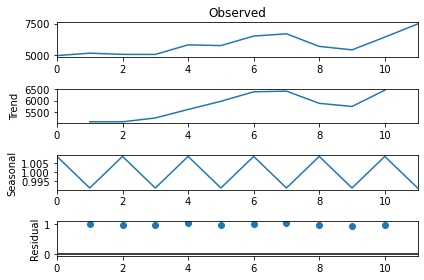

In [203]:
crime_MAN_df = crimes_total[crimes_total.STATE=='MANIPUR']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MAN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

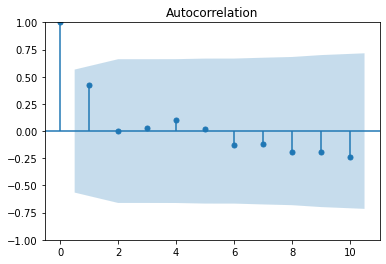

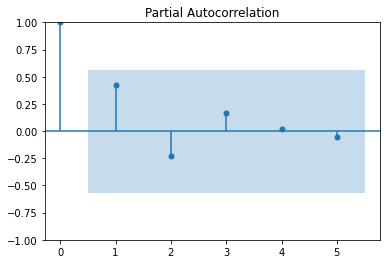

In [204]:
crimes_MAN_forecast = crime_MAN_df.copy()
crimes_MAN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MAN_forecast = crimes_MAN_forecast.reset_index(drop = True)
plot(crimes_MAN_forecast)

In [205]:
MAN_arim = ARIMA(crimes_MAN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,0,0))
MAN_moMAN = MAN_arim.fit()
MAN_moMAN.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -74.916
Date:                Wed, 24 Nov 2021   AIC                            159.833
Time:                        14:34:59   BIC                            161.346
Sample:                             0   HQIC                           158.173
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5560.0599    491.021     11.323      0.000    4597.676    6522.444
ar.L1          0.7100      1.057      0.672      0.502      -1.362       2.782
ar.L2         -0.0566      0.947     -0.060      0.952      -1.913       1.800
ar.L3         -0.2460      1.380     -0.178      0.859      -2.951       2.459
sigma2      1.739e+05   3.67e+05      0.474      0.635   -5.45e+05    8.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.76   Prob(JB):                         0.64
Heteroskedasticity (H):               2.11   Skew:                             0.40
Prob(H) (two-sided):                  0.56   Kurtosis:                         1.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [208]:
forecast_MAN = MAN_moMAN.predict(10,11)
print('prediction',forecast_MAN)
forecast_df_MAN = MAN_moMAN.forecast(steps=10)
print('forecasting',forecast_df_MAN)

prediction [5179.67118815 5261.94875343]
forecasting [5179.67118815 5261.94875343 5401.94073529 5558.24557505 5641.05376623
 5656.55975984 5624.43255048 5580.37607403 5547.1021719  5533.87571203]


In [209]:
get_mape(crimes_MAN_forecast.TOTAL[10:12],forecast_MAN)


24.56

In [210]:
i=12
for j in range(len(forecast_df_MAN)):
    crimes_MAN_forecast.loc[i] = crimes_MAN_forecast.YEAR[i-1]+1
    crimes_MAN_forecast.TOTAL[i] = forecast_df_MAN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MAN_forecast["YEAR"], y= crimes_MAN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MAN_forecast["YEAR"][12:], y= crimes_MAN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

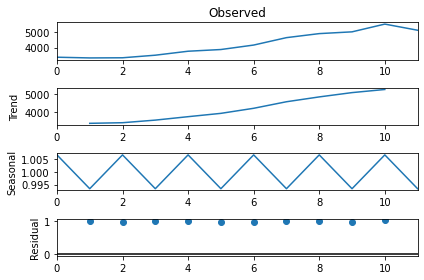

In [211]:
crime_MEG_df = crimes_total[crimes_total.STATE=='MEGHALAYA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MEG_df['TOTAL']),
                                 model = "multiplicative",period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

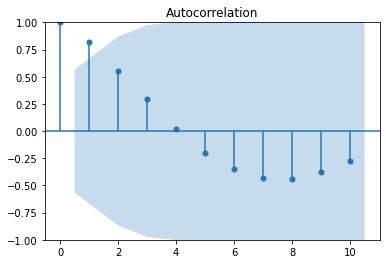

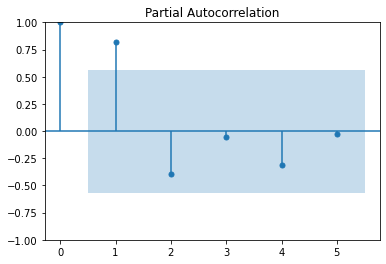

In [212]:
crimes_MEG_forecast = crime_MEG_df.copy()
crimes_MEG_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MEG_forecast = crimes_MEG_forecast.reset_index(drop = True)
plot(crimes_MEG_forecast)


In [213]:
MEG_arim = ARIMA(crimes_MEG_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,3,2))
MEG_moMEG = MEG_arim.fit()
MEG_moMEG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 3, 2)   Log Likelihood                 -43.984
Date:                Wed, 24 Nov 2021   AIC                             99.967
Time:                        14:35:15   BIC                             99.643
Sample:                             0   HQIC                            95.956
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3539      0.795     -1.703      0.089      -2.912       0.204
ar.L2         -1.2436      0.682     -1.824      0.068      -2.580       0.092
ar.L3         -0.8824      0.253     -3.485      0.000      -1.379      -0.386
ma.L1          0.6247      2.870      0.218      0.828      -4.999       6.249
ma.L2         -0.3106      1.389     -0.224      0.823      -3.033       2.412
sigma2      9380.2349      0.000   2.62e+07      0.000    9380.234    9380.236
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.68   Prob(JB):                         0.68
Heteroskedasticity (H):               5.92   Skew:                            -0.35
Prob(H) (two-sided):                  0.29   Kurtosis:                         1.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.78e+23. Standard errors may be unstable.
"""

In [216]:
forecast_MEG = MEG_moMEG.predict(10,11)
print('prediction',forecast_MEG)
forecast_df_MEG = MEG_moMEG.forecast(steps=10)
print('forecasting',forecast_df_MEG)

prediction [5384.69429375 5762.45632979]
forecasting [5384.69429375 5762.45632979 5922.77042489 6125.72336731 6520.75386309
 6776.66593494 6926.51612036 7205.57552121 7546.44521858 7718.61596301]


In [217]:
get_mape(crimes_MEG_forecast.TOTAL[10:12],forecast_MEG)


7.48

In [218]:
i=12
for j in range(len(forecast_df_MEG)):
    crimes_MEG_forecast.loc[i] = crimes_MEG_forecast.YEAR[i-1]+1
    crimes_MEG_forecast.TOTAL[i] = forecast_df_MEG[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MEG_forecast["YEAR"], y= crimes_MEG_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MEG_forecast["YEAR"][13:], y= crimes_MEG_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

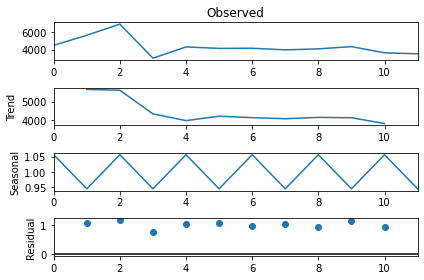

In [219]:
crime_MIZ_df = crimes_total[crimes_total.STATE=='MIZORAM']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_MIZ_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

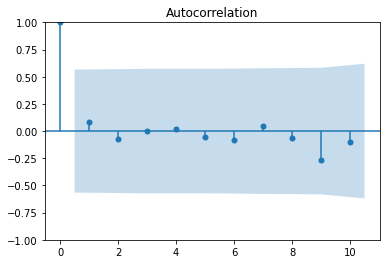

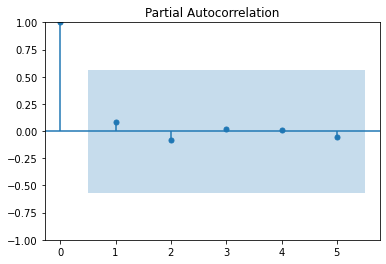

In [220]:
crimes_MIZ_forecast = crime_MIZ_df.copy()
crimes_MIZ_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_MIZ_forecast = crimes_MIZ_forecast.reset_index(drop = True)
plot(crimes_MIZ_forecast)


In [221]:
MIZ_arim = ARIMA(crimes_MIZ_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,2,0))
MIZ_moMIZ = MIZ_arim.fit()
MIZ_moMIZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 2, 0)   Log Likelihood                 -73.789
Date:                Wed, 24 Nov 2021   AIC                            155.578
Time:                        14:35:30   BIC                            155.896
Sample:                             0   HQIC                           153.435
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6512      0.751     -0.868      0.386      -2.122       0.820
ar.L2         -0.7871      0.552     -1.425      0.154      -1.870       0.296
ar.L3         -0.8903      0.206     -4.331      0.000      -1.293      -0.487
sigma2      4.728e+06   4.31e-08    1.1e+14      0.000    4.73e+06    4.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.30   Prob(JB):                         0.82
Heteroskedasticity (H):               0.64   Skew:                             0.36
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.82e+30. Standard errors may be unstable.
"""

In [224]:
forecast_MIZ = MIZ_moMIZ.predict(10,11)
print('prediction',forecast_MIZ)
forecast_df_MIZ = MIZ_moMIZ.forecast(steps=10)
print('forecasting',forecast_df_MIZ)

prediction [4458.02792578 4282.53976757]
forecasting [4458.02792578 4282.53976757 4283.43537354 4522.38917526 4721.67781195
 4602.38367799 4509.8235097  4685.93394696 4949.67772845 4921.07950403]


In [225]:
get_mape(crimes_MIZ_forecast.TOTAL[10:12],forecast_MIZ)


21.83

In [226]:
i=12
for j in range(len(forecast_df_MIZ)):
    crimes_MIZ_forecast.loc[i] = crimes_MIZ_forecast.YEAR[i-1]+1
    crimes_MIZ_forecast.TOTAL[i] = forecast_df_MIZ[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_MIZ_forecast["YEAR"], y= crimes_MIZ_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_MIZ_forecast["YEAR"][12:], y= crimes_MIZ_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

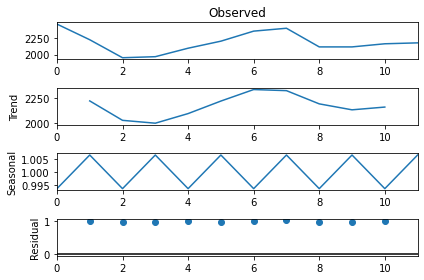

In [227]:
crime_NAG_df = crimes_total[crimes_total.STATE=='NAGALAND']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_NAG_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

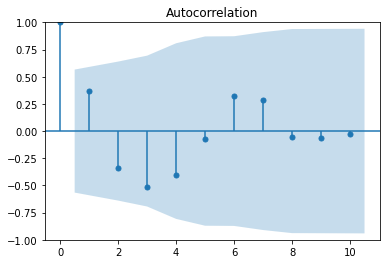

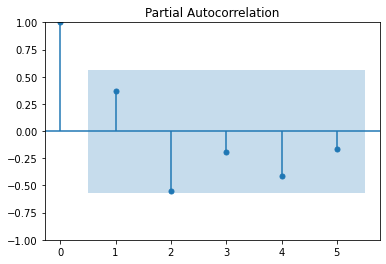

In [228]:
crimes_NAG_forecast = crime_NAG_df.copy()
crimes_NAG_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_NAG_forecast = crimes_NAG_forecast.reset_index(drop = True)
plot(crimes_NAG_forecast)

In [229]:
NAG_arim = ARIMA(crimes_NAG_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
NAG_moNAG = NAG_arim.fit()
NAG_moNAG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -57.492
Date:                Wed, 24 Nov 2021   AIC                            120.983
Time:                        14:35:46   BIC                            121.575
Sample:                             0   HQIC                           119.707
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4198      0.366      1.147      0.252      -0.298       1.137
ar.L2         -0.6450      0.436     -1.479      0.139      -1.500       0.210
sigma2      1.868e+04   1.67e+04      1.121      0.262    -1.4e+04    5.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.93   Prob(JB):                         0.74
Heteroskedasticity (H):               1.24   Skew:                             0.04
Prob(H) (two-sided):                  0.86   Kurtosis:                         1.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
forecast_NAG = NAG_moNAG.predict(10,11)
print('prediction',forecast_NAG)
forecast_df_NAG = NAG_moNAG.forecast(steps=10)
print('forecasting',forecast_df_NAG)

prediction [2302.47722351 2379.91632906]
forecasting [2302.47722351 2379.91632906 2293.43093625 2207.17626758 2226.75389304
 2290.6085496  2304.78513714 2269.54826168 2245.61241105 2258.29339078]


In [232]:
get_mape(crimes_NAG_forecast.TOTAL[10:12],forecast_NAG)


7.74

In [233]:
i=12
for j in range(len(forecast_df_NAG)):
    crimes_NAG_forecast.loc[i] = crimes_NAG_forecast.YEAR[i-1]+1
    crimes_NAG_forecast.TOTAL[i] = forecast_df_NAG[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_NAG_forecast["YEAR"], y= crimes_NAG_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_NAG_forecast["YEAR"][12:], y= crimes_NAG_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

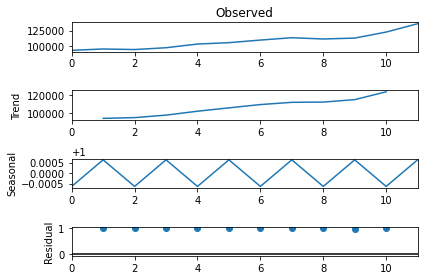

In [234]:
crime_ODI_df = crimes_total[crimes_total.STATE=='ODISHA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_ODI_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

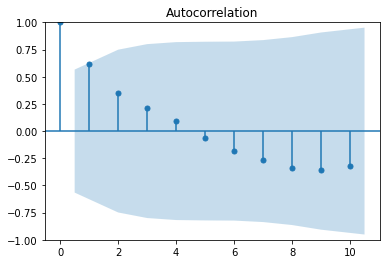

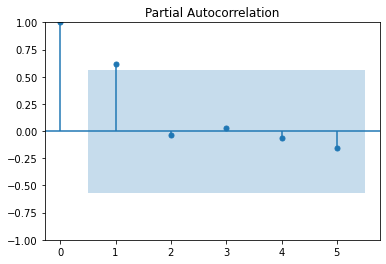

In [235]:
crimes_ODI_forecast = crime_ODI_df.copy()
crimes_ODI_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_ODI_forecast = crimes_ODI_forecast.reset_index(drop = True)
plot(crimes_ODI_forecast)


In [236]:
ODI_arim = ARIMA(crimes_ODI_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,1))
ODI_moODI = ODI_arim.fit()
ODI_moODI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -76.110
Date:                Wed, 24 Nov 2021   AIC                            160.219
Time:                        14:36:00   BIC                            160.537
Sample:                             0   HQIC                           158.076
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9666      0.243     -3.979      0.000      -1.443      -0.490
ar.L2          0.0240      0.242      0.099      0.921      -0.450       0.499
ma.L1          1.0000      1.018      0.983      0.326      -0.995       2.995
sigma2      1.072e+07   9.49e-08   1.13e+14      0.000    1.07e+07    1.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.24   Prob(JB):                         0.63
Heteroskedasticity (H):               1.56   Skew:                            -0.50
Prob(H) (two-sided):                  0.72   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+30. Standard errors may be unstable.
"""

In [238]:
forecast_ODI = ODI_moODI.predict(10,11)
print('prediction',forecast_ODI)
forecast_df_ODI = ODI_moODI.forecast(steps=10)
print('forecasting',forecast_df_ODI)

prediction [113805.2111596  115308.16042484]
forecasting [113805.2111596  115308.16042484 116202.72178629 117700.12797636
 118600.22374162 120092.14735121 120997.67539817 122484.2165886
 123395.07765048 124876.33477677]


In [239]:
get_mape(crimes_ODI_forecast.TOTAL[10:12],forecast_ODI)


11.15

In [240]:
i=12
for j in range(len(forecast_df_ODI)):
    crimes_ODI_forecast.loc[i] = crimes_ODI_forecast.YEAR[i-1]+1
    crimes_ODI_forecast.TOTAL[i] = forecast_df_ODI[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_ODI_forecast["YEAR"], y= crimes_ODI_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_ODI_forecast["YEAR"][12:], y= crimes_ODI_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

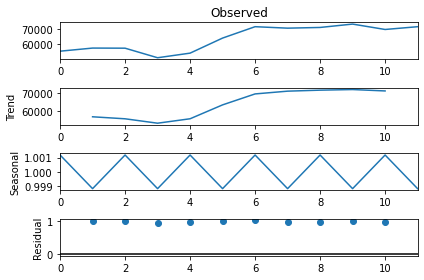

In [241]:
crime_PUN_df = crimes_total[crimes_total.STATE=='PUNJAB']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_PUN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

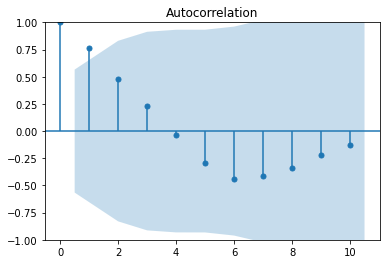

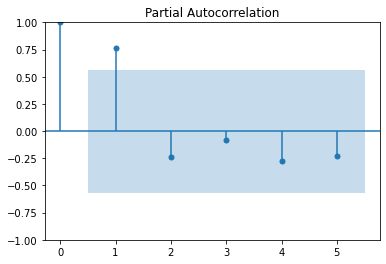

In [242]:
crimes_PUN_forecast = crime_PUN_df.copy()
crimes_PUN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_PUN_forecast = crimes_PUN_forecast.reset_index(drop = True)
plot(crimes_PUN_forecast)


In [243]:
PUN_arim = ARIMA(crimes_PUN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,1))
PUN_moPUN = PUN_arim.fit()
PUN_moPUN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -88.886
Date:                Wed, 24 Nov 2021   AIC                            185.772
Time:                        14:36:19   BIC                            186.561
Sample:                             0   HQIC                           184.069
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9381     11.570     -0.081      0.935     -23.615      21.739
ar.L2          0.0617      0.549      0.112      0.911      -1.015       1.138
ma.L1          0.9997     12.079      0.083      0.934     -22.674      24.673
sigma2      2.212e+07   1.77e-05   1.25e+12      0.000    2.21e+07    2.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.34   Prob(JB):                         0.92
Heteroskedasticity (H):               0.17   Skew:                             0.24
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+28. Standard errors may be unstable.
"""

In [244]:
forecast_PUN = PUN_moPUN.predict(10,11)
print('prediction',forecast_PUN)
forecast_df_PUN = PUN_moPUN.forecast(steps=10)
print('forecasting',forecast_df_PUN)


prediction [73437.7792104  73440.83421739]
forecasting [73437.7792104  73440.83421739 73446.71284769 73441.38642828
 73446.7458134  73441.38956156 73446.74490726 73441.39060489
 73446.74387261 73441.39163986]


In [245]:
get_mape(crimes_PUN_forecast.TOTAL[10:12],forecast_PUN)


3.93

In [246]:
i=12
for j in range(len(forecast_df_PUN)):
    crimes_PUN_forecast.loc[i] = crimes_PUN_forecast.YEAR[i-1]+1
    crimes_PUN_forecast.TOTAL[i] = forecast_df_PUN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_PUN_forecast["YEAR"], y= crimes_PUN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_PUN_forecast["YEAR"][12:], y= crimes_PUN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

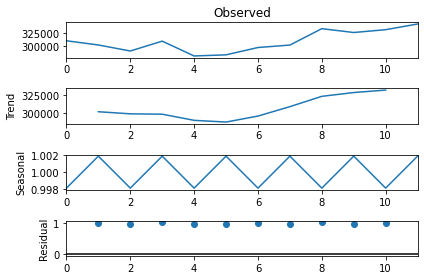

In [247]:
crime_RAJ_df = crimes_total[crimes_total.STATE=='RAJASTHAN']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_RAJ_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

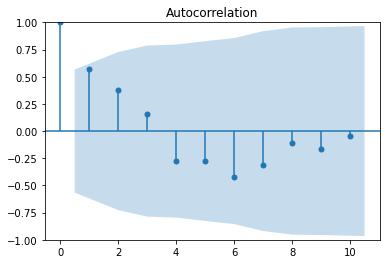

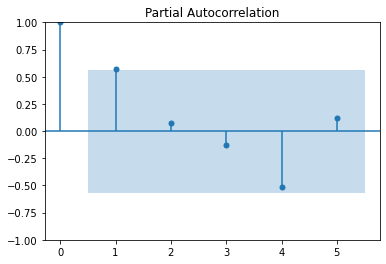

In [248]:
crimes_RAJ_forecast = crime_RAJ_df.copy()
crimes_RAJ_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_RAJ_forecast = crimes_RAJ_forecast.reset_index(drop = True)
plot(crimes_RAJ_forecast)

In [249]:
RAJ_arim = ARIMA(crimes_RAJ_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,1,1))
RAJ_moRAJ = RAJ_arim.fit()
RAJ_moRAJ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -100.074
Date:                Wed, 24 Nov 2021   AIC                            206.149
Time:                        14:36:31   BIC                            206.740
Sample:                             0   HQIC                           204.872
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7618      0.648     -1.176      0.240      -2.032       0.508
ma.L1          0.7869      0.617      1.276      0.202      -0.422       1.996
sigma2      2.633e+08   1.65e-09   1.59e+17      0.000    2.63e+08    2.63e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.45   Prob(JB):                         0.88
Heteroskedasticity (H):               2.37   Skew:                             0.26
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.26e+33. Standard errors may be unstable.
"""

In [251]:
forecast_RAJ = RAJ_moRAJ.predict(10,11)
print('prediction',forecast_RAJ)
forecast_df_RAJ = RAJ_moRAJ.forecast(steps=10)
print('forecasting',forecast_df_RAJ)

prediction [324541.20867797 325587.06476376]
forecasting [324541.20867797 325587.06476376 324790.283101   325397.30831865
 324934.84835994 325287.17180087 325018.75546624 325223.24747649
 325067.45598074 325186.14516629]


In [252]:
get_mape(crimes_RAJ_forecast.TOTAL[10:12],forecast_RAJ)

3.4

In [253]:
i=12
for j in range(len(forecast_df_RAJ)):
    crimes_RAJ_forecast.loc[i] = crimes_RAJ_forecast.YEAR[i-1]+1
    crimes_RAJ_forecast.TOTAL[i] = forecast_df_RAJ[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_RAJ_forecast["YEAR"], y= crimes_RAJ_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_RAJ_forecast["YEAR"][12:], y= crimes_RAJ_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

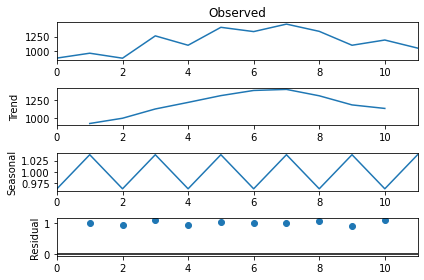

In [254]:
crime_SIK_df = crimes_total[crimes_total.STATE=='SIKKIM']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_SIK_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

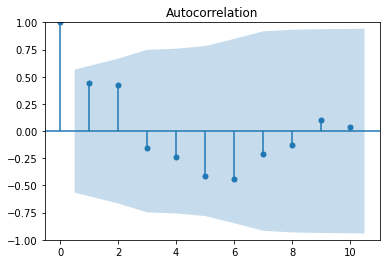

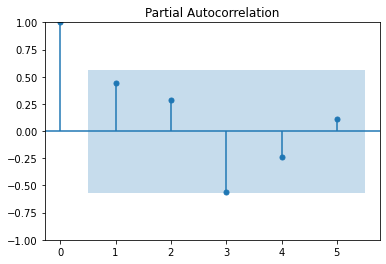

In [255]:

crimes_SIK_forecast = crime_SIK_df.copy()
crimes_SIK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_SIK_forecast = crimes_SIK_forecast.reset_index(drop = True)
plot(crimes_SIK_forecast)


In [256]:
SIK_arim = ARIMA(crimes_SIK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
SIK_moSIK = SIK_arim.fit()
SIK_moSIK.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -58.784
Date:                Wed, 24 Nov 2021   AIC                            123.568
Time:                        14:36:45   BIC                            124.159
Sample:                             0   HQIC                           122.291
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.882     -0.261      0.794      -1.957       1.498
ar.L2          0.3965      0.763      0.519      0.603      -1.100       1.893
sigma2      2.585e+04   1.11e+04      2.337      0.019    4175.255    4.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.80   Prob(JB):                         0.97
Heteroskedasticity (H):               0.88   Skew:                            -0.06
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [258]:
forecast_SIK = SIK_moSIK.predict(10,11)
print('prediction',forecast_SIK)
forecast_df_SIK = SIK_moSIK.forecast(steps=10)
print('forecasting',forecast_df_SIK)


prediction [1109.38455978 1015.35540338]
forecasting [1109.38455978 1015.35540338 1039.09455722  996.35331824 1015.5871386
  994.21910761 1006.75569215  995.40188545 1002.9818557   996.73798051]


In [259]:
get_mape(crimes_SIK_forecast.TOTAL[10:12],forecast_SIK)


5.39

In [260]:
i=12
for j in range(len(forecast_df_SIK)):
    crimes_SIK_forecast.loc[i] = crimes_SIK_forecast.YEAR[i-1]+1
    crimes_SIK_forecast.TOTAL[i] = forecast_df_SIK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_SIK_forecast["YEAR"], y= crimes_SIK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_SIK_forecast["YEAR"][12:], y= crimes_SIK_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

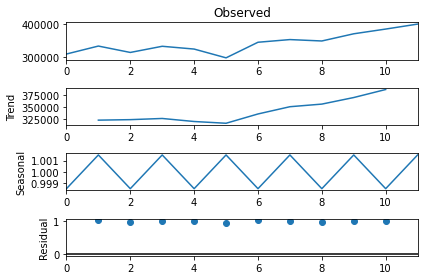

In [261]:
crime_TN_df = crimes_total[crimes_total.STATE=='TAMIL NADU']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_TN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

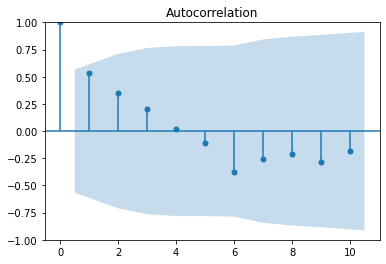

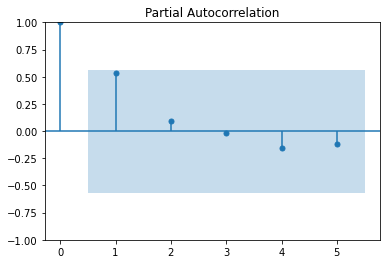

In [262]:
crimes_TN_forecast = crime_TN_df.copy()
crimes_TN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_TN_forecast = crimes_TN_forecast.reset_index(drop = True)
plot(crimes_TN_forecast)

In [263]:
TN_arim = ARIMA(crimes_TN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,0))
TN_moTN = TN_arim.fit()
TN_moTN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -95.825
Date:                Wed, 24 Nov 2021   AIC                            197.650
Time:                        14:37:00   BIC                            197.888
Sample:                             0   HQIC                           196.043
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0990      0.093     -1.065      0.287      -0.281       0.083
ar.L2         -0.1880      0.064     -2.919      0.004      -0.314      -0.062
sigma2      4.493e+08   5.26e-11   8.54e+18      0.000    4.49e+08    4.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.36   Prob(JB):                         0.30
Heteroskedasticity (H):               0.99   Skew:                             1.30
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.05e+34. Standard errors may be unstable.
"""

In [266]:
forecast_TN = TN_moTN.predict(10,11)
print('prediction',forecast_TN)
forecast_df_TN = TN_moTN.forecast(steps=10)
print('forecasting',forecast_df_TN)


prediction [393071.04631359 409873.97035401]
forecasting [393071.04631359 409873.97035401 427211.72133779 445420.25486607
 463442.03799561 481318.55456737 499244.56547337 517192.99514543
 535129.89884673 553063.72743152]


In [267]:
get_mape(crimes_TN_forecast.TOTAL[10:12],forecast_TN)


2.06

In [268]:
i=12
for j in range(len(forecast_df_TN)):
    crimes_TN_forecast.loc[i] = crimes_TN_forecast.YEAR[i-1]+1
    crimes_TN_forecast.TOTAL[i] = forecast_df_TN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_TN_forecast["YEAR"], y= crimes_TN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_TN_forecast["YEAR"][12:], y= crimes_TN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

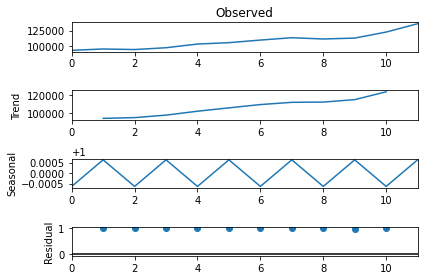

In [269]:
crime_TRI_df = crimes_total[crimes_total.STATE=='TRIPURA']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_ODI_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

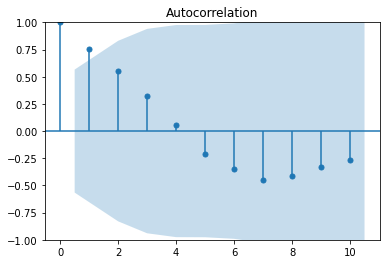

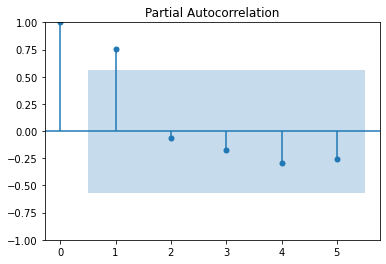

In [270]:
crimes_TRI_forecast = crime_TRI_df.copy()
crimes_TRI_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_TRI_forecast = crimes_TRI_forecast.reset_index(drop = True)
plot(crimes_TRI_forecast)

In [271]:
TRI_arim = ARIMA(crimes_TRI_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
TRI_moTRI = TRI_arim.fit()
TRI_moTRI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -73.419
Date:                Wed, 24 Nov 2021   AIC                            152.838
Time:                        14:37:18   BIC                            153.429
Sample:                             0   HQIC                           151.561
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1623      0.476      0.341      0.733      -0.770       1.095
ar.L2          0.3054      0.329      0.928      0.353      -0.339       0.950
sigma2      7.008e+05   4.06e+05      1.728      0.084   -9.41e+04     1.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.97   Prob(JB):                         0.94
Heteroskedasticity (H):               2.04   Skew:                             0.23
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [273]:
forecast_TRI = TRI_moTRI.predict(10,11)
print('prediction',forecast_TRI)
forecast_df_TRI = TRI_moTRI.forecast(steps=10)
print('forecasting',forecast_df_TRI)

prediction [11805.15632263 12031.65525333]
forecasting [11805.15632263 12031.65525333 12128.01011929 12212.81405768
 12256.00130843 12288.90699418 12307.43555207 12320.49106977
 12328.26799523 12333.51692207]


In [274]:
get_mape(crimes_TRI_forecast.TOTAL[10:12],forecast_TRI)


2.84

In [275]:
i=12
for j in range(len(forecast_df_TRI)):
    crimes_TRI_forecast.loc[i] = crimes_TRI_forecast.YEAR[i-1]+1
    crimes_TRI_forecast.TOTAL[i] = forecast_df_TRI[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_TRI_forecast["YEAR"], y= crimes_TRI_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_TRI_forecast["YEAR"][12:], y= crimes_TRI_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

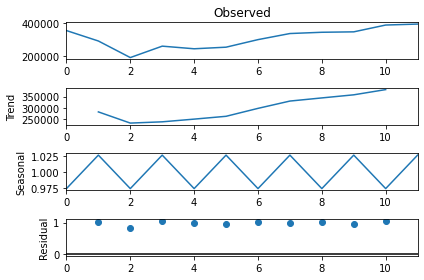

In [276]:
crime_UP_df = crimes_total[crimes_total.STATE=='UTTAR PRADESH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_UP_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

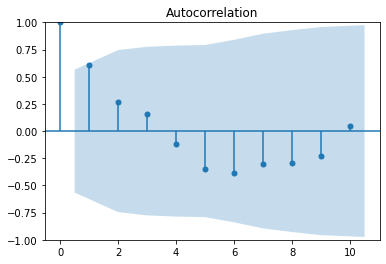

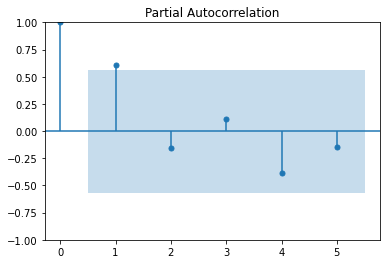

In [277]:
crimes_UP_forecast = crime_UP_df.copy()
crimes_UP_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_UP_forecast = crimes_UP_forecast.reset_index(drop = True)
plot(crimes_UP_forecast)

In [278]:
UP_arim = ARIMA(crimes_UP_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,0))
UP_moUP = UP_arim.fit()
UP_moUP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -96.227
Date:                Wed, 24 Nov 2021   AIC                            198.454
Time:                        14:37:32   BIC                            198.692
Sample:                             0   HQIC                           196.846
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3013      0.053     -5.637      0.000      -0.406      -0.197
ar.L2         -0.3775      0.055     -6.832      0.000      -0.486      -0.269
sigma2      4.678e+08   1.56e-11   2.99e+19      0.000    4.68e+08    4.68e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.36   Prob(JB):                         0.70
Heteroskedasticity (H):               0.24   Skew:                             0.73
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.72e+34. Standard errors may be unstable.
"""

In [281]:
forecast_UP = UP_moUP.predict(10,11)
print('prediction',forecast_UP)
forecast_df_UP = UP_moUP.forecast(steps=10)
print('forecasting',forecast_df_UP)

prediction [363720.7313251  377192.74086751]
forecasting [363720.7313251  377192.74086751 386413.31167705 397628.41467389
 409847.31182078 421010.94712806 432113.6299182  443632.98594213
 455049.81280485 466340.2561233 ]


In [282]:
get_mape(crimes_UP_forecast.TOTAL[10:12],forecast_UP)


5.8

In [283]:
i=12
for j in range(len(forecast_df_UP)):
    crimes_UP_forecast.loc[i] = crimes_UP_forecast.YEAR[i-1]+1
    crimes_UP_forecast.TOTAL[i] = forecast_df_UP[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_UP_forecast["YEAR"], y= crimes_UP_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_UP_forecast["YEAR"][12:], y= crimes_UP_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

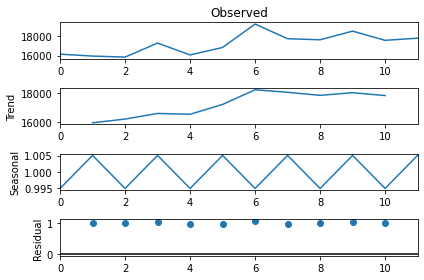

In [284]:
crime_UK_df = crimes_total[crimes_total.STATE=='UTTARAKHAND']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_UK_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

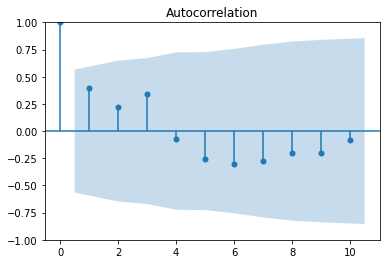

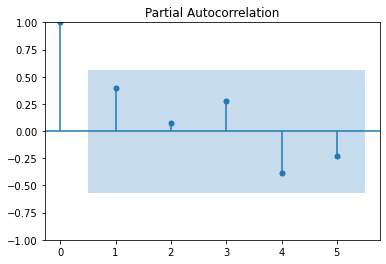

In [285]:
crimes_UK_forecast = crime_UK_df.copy()
crimes_UK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_UK_forecast = crimes_UK_forecast.reset_index(drop = True)
plot(crimes_UK_forecast)

In [286]:
UK_arim = ARIMA(crimes_UK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,1))
UK_moUK = UK_arim.fit()
UK_moUK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -69.024
Date:                Wed, 24 Nov 2021   AIC                            146.049
Time:                        14:37:48   BIC                            146.367
Sample:                             0   HQIC                           143.906
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7286      0.227     -3.214      0.001      -1.173      -0.284
ar.L2         -0.4174      0.163     -2.561      0.010      -0.737      -0.098
ma.L1          0.4981      0.376      1.324      0.186      -0.239       1.236
sigma2      1.196e+06   1.08e+06      1.104      0.270   -9.28e+05    3.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.45   Prob(JB):                         0.80
Heteroskedasticity (H):               2.07   Skew:                            -0.37
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [288]:
forecast_UK = UK_moUK.predict(10,11)
print('prediction',forecast_UK)
forecast_df_UK = UK_moUK.forecast(steps=10)
print('forecasting',forecast_df_UK)


prediction [18121.62235178 18251.87916103]
forecasting [18121.62235178 18251.87916103 18541.35077245 18510.86387647
 18647.03952025 18795.33708998 18865.23777524 18987.19801359
 19103.9510098  19202.76829177]


In [289]:
get_mape(crimes_UK_forecast.TOTAL[10:12],forecast_UK)


3.01

In [290]:
i=12
for j in range(len(forecast_df_UK)):
    crimes_UK_forecast.loc[i] = crimes_UK_forecast.YEAR[i-1]+1
    crimes_UK_forecast.TOTAL[i] = forecast_df_UK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_UK_forecast["YEAR"], y= crimes_UK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_UK_forecast["YEAR"][12:], y= crimes_UK_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

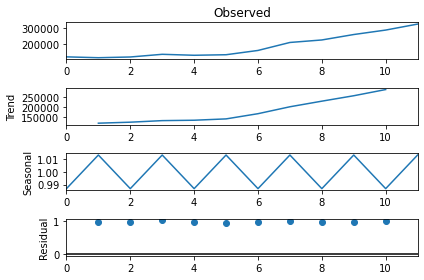

In [291]:
crime_WB_df = crimes_total[crimes_total.STATE=='WEST BENGAL']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_WB_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

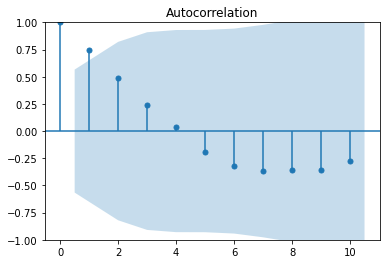

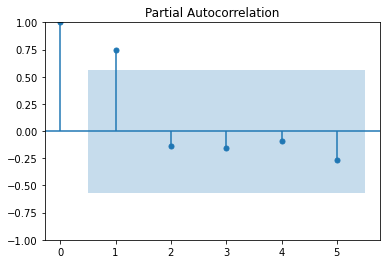

In [292]:
crimes_WB_forecast = crime_WB_df.copy()
crimes_WB_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_WB_forecast = crimes_WB_forecast.reset_index(drop = True)
plot(crimes_WB_forecast)

In [293]:
WB_arim = ARIMA(crimes_WB_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,2,1))
WB_moWB = WB_arim.fit()
WB_moWB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -89.742
Date:                Wed, 24 Nov 2021   AIC                            187.485
Time:                        14:38:01   BIC                            187.803
Sample:                             0   HQIC                           185.342
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4018      0.815      0.493      0.622      -1.195       1.999
ar.L2         -0.0465      0.577     -0.081      0.936      -1.177       1.084
ma.L1         -0.8792      1.363     -0.645      0.519      -3.551       1.792
sigma2       4.59e+08   3.59e-09   1.28e+17      0.000    4.59e+08    4.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.60   Prob(JB):                         0.82
Heteroskedasticity (H):               1.89   Skew:                            -0.09
Prob(H) (two-sided):                  0.62   Kurtosis:                         1.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+33. Standard errors may be unstable.
"""

In [295]:
forecast_WB = WB_moWB.predict(10,11)
print('prediction',forecast_WB)
forecast_df_WB = WB_moWB.forecast(steps=10)
print('forecasting',forecast_df_WB)

prediction [286937.22046947 311616.38942249]
forecasting [286937.22046947 311616.38942249 335333.43455774 358804.68395164
 382221.93670777 405628.92984316 429034.31303057 452439.52671263
 475844.74719939 499249.9783082 ]


In [296]:
get_mape(crimes_WB_forecast.TOTAL[10:12],forecast_WB)


1.84

In [297]:
i=12
for j in range(len(forecast_df_WB)):
    crimes_WB_forecast.loc[i] = crimes_WB_forecast.YEAR[i-1]+1
    crimes_WB_forecast.TOTAL[i] = forecast_df_WB[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_WB_forecast["YEAR"], y= crimes_WB_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_WB_forecast["YEAR"][13:], y= crimes_WB_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

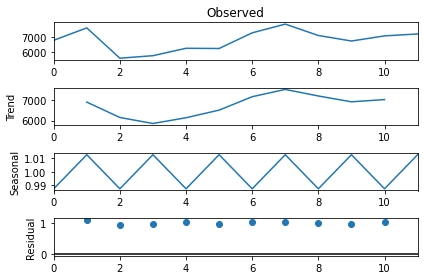

In [298]:
crime_CHAN_df = crimes_total[crimes_total.STATE=='CHANDIGARH']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_CHAN_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

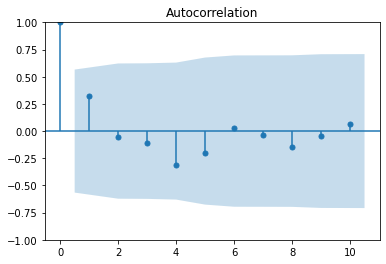

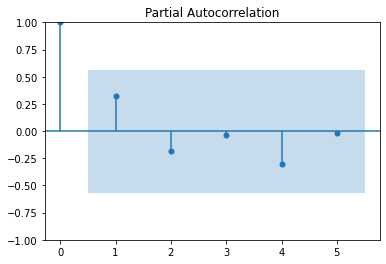

In [299]:
crimes_CHAN_forecast = crime_CHAN_df.copy()
crimes_CHAN_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_CHAN_forecast = crimes_CHAN_forecast.reset_index(drop = True)
plot(crimes_CHAN_forecast)

In [300]:
CHAN_arim = ARIMA(crimes_CHAN_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
CHAN_moCHAN = CHAN_arim.fit()
CHAN_moCHAN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -71.012
Date:                Wed, 24 Nov 2021   AIC                            148.023
Time:                        14:38:21   BIC                            148.615
Sample:                             0   HQIC                           146.746
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0009      0.279      0.003      0.998      -0.545       0.547
ar.L2         -0.5122      0.211     -2.428      0.015      -0.926      -0.099
sigma2      4.825e+05   2.97e+05      1.627      0.104   -9.87e+04    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.46   Prob(JB):                         0.78
Heteroskedasticity (H):               0.33   Skew:                             0.30
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [301]:
forecast_CHAN = CHAN_moCHAN.predict(10,11)
print('prediction',forecast_CHAN)
forecast_df_CHAN = CHAN_moCHAN.forecast(steps=10)
print('forecasting',forecast_df_CHAN)

prediction [7130.84094475 7317.60958012]
forecasting [7130.84094475 7317.60958012 7120.66512278 7024.83446663 7125.62165065
 7174.79195985 7123.21379146 7097.98482929 7124.38006682 7137.32482101]


In [302]:
get_mape(crimes_CHAN_forecast.TOTAL[10:12],forecast_CHAN)


1.06

In [303]:
i=12
for j in range(len(forecast_df_CHAN)):
    crimes_CHAN_forecast.loc[i] = crimes_CHAN_forecast.YEAR[i-1]+1
    crimes_CHAN_forecast.TOTAL[i] = forecast_df_CHAN[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_CHAN_forecast["YEAR"], y= crimes_CHAN_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_CHAN_forecast["YEAR"][12:], y= crimes_CHAN_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

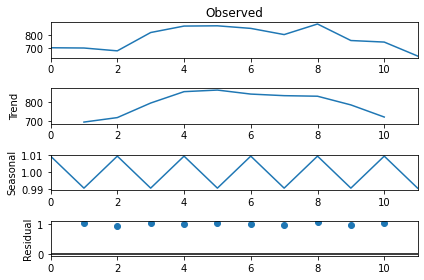

In [304]:
crime_DNH_df = crimes_total[crimes_total.STATE=='D & N HAVELI']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DNH_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

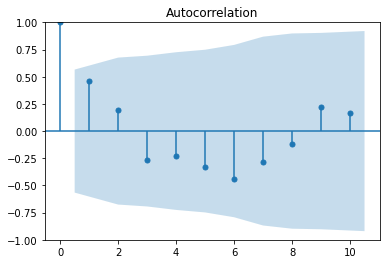

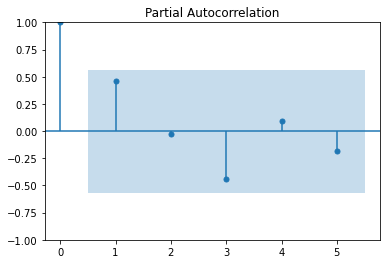

In [305]:
crimes_DNH_forecast = crime_DNH_df.copy()
crimes_DNH_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DNH_forecast = crimes_DNH_forecast.reset_index(drop = True)
plot(crimes_DNH_forecast)

In [306]:
DNH_arim = ARIMA(crimes_DNH_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(3,2,1))
DNH_moDNH = DNH_arim.fit()
DNH_moDNH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 -47.109
Date:                Wed, 24 Nov 2021   AIC                            104.217
Time:                        14:38:35   BIC                            104.614
Sample:                             0   HQIC                           101.538
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5598      1.183     -0.473      0.636      -2.878       1.759
ar.L2         -0.3123      1.523     -0.205      0.838      -3.297       2.672
ar.L3         -0.2046      1.059     -0.193      0.847      -2.280       1.871
ma.L1         -0.3977      1.903     -0.209      0.834      -4.128       3.332
sigma2      6707.4221   7310.473      0.918      0.359   -7620.842     2.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.77   Prob(JB):                         0.80
Heteroskedasticity (H):               1.56   Skew:                             0.41
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [308]:
forecast_DNH = DNH_moDNH.predict(10,11)
print('prediction',forecast_DNH)
forecast_df_DNH = DNH_moDNH.forecast(steps=10)
print('forecasting',forecast_df_DNH)

prediction [761.25617569 730.89773738]
forecasting [761.25617569 730.89773738 721.82809886 684.69876347 663.91582149
 638.38915247 616.15425926 590.2135616  566.28996584 541.72097327]


In [309]:
get_mape(crimes_DNH_forecast.TOTAL[10:12],forecast_DNH)

	

8.62

In [310]:
i=12
for j in range(len(forecast_df_DNH)):
    crimes_DNH_forecast.loc[i] = crimes_DNH_forecast.YEAR[i-1]+1
    crimes_DNH_forecast.TOTAL[i] = forecast_df_DNH[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DNH_forecast["YEAR"], y= crimes_DNH_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DNH_forecast["YEAR"][12:], y= crimes_DNH_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

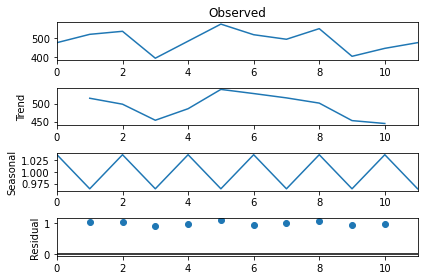

In [311]:
crime_DD_df = crimes_total[crimes_total.STATE=='DAMAN & DIU']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DD_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

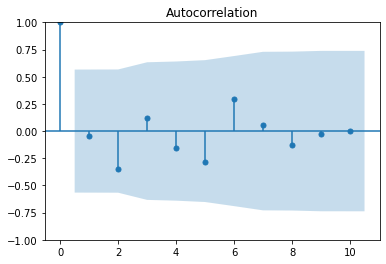

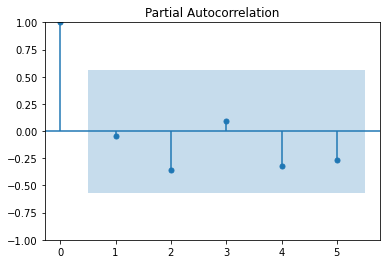

In [312]:
crimes_DD_forecast = crime_DD_df.copy()
crimes_DD_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DD_forecast = crimes_DD_forecast.reset_index(drop = True)
plot(crimes_DD_forecast)

In [313]:
DD_arim = ARIMA(crimes_DD_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
DD_moDD = DD_arim.fit()
DD_moDD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -50.568
Date:                Wed, 24 Nov 2021   AIC                            107.136
Time:                        14:38:49   BIC                            107.728
Sample:                             0   HQIC                           105.860
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5893      0.520     -1.134      0.257      -1.608       0.429
ar.L2         -0.6064      0.368     -1.646      0.100      -1.328       0.116
sigma2      3937.2327   2506.372      1.571      0.116    -975.166    8849.631
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.94   Prob(JB):                         0.41
Heteroskedasticity (H):               1.25   Skew:                            -1.07
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [315]:
forecast_DD = DD_moDD.predict(10,11)
print('prediction',forecast_DD)
forecast_df_DD = DD_moDD.forecast(steps=10)
print('forecasting',forecast_df_DD)

prediction [458.07392096 515.92233243]
forecasting [458.07392096 515.92233243 450.25726908 453.87215238 491.56093332
 467.16039586 458.68441571 478.47530726 471.95310645 463.79530515]


In [316]:
get_mape(crimes_DD_forecast.TOTAL[10:12],forecast_DD)


5.09

In [317]:
i=12
for j in range(len(forecast_df_DD)):
    crimes_DD_forecast.loc[i] = crimes_DD_forecast.YEAR[i-1]+1
    crimes_DD_forecast.TOTAL[i] = forecast_df_DD[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DD_forecast["YEAR"], y= crimes_DD_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DD_forecast["YEAR"][12:], y= crimes_DD_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [318]:
#DELHI

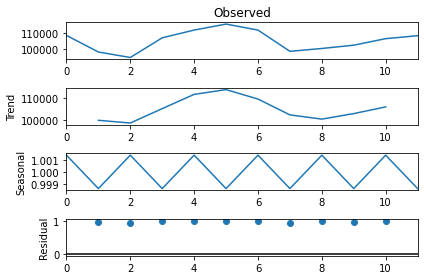

In [319]:
crime_DEL_df = crimes_total[crimes_total.STATE=='DELHI UT']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DEL_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

In [320]:
crimes_DEL_forecast = crime_DEL_df.copy()
crimes_DEL_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_DEL_forecast = crimes_DEL_forecast.reset_index(drop = True)
crimes_DEL_forecast

YEAR   TOTAL
0   2001  108768
1   2002   98274
2   2003   94808
3   2004  107246
4   2005  112130
5   2006  115926
6   2007  112130
7   2008   98700
8   2009  100502
9   2010  102584
10  2011  106706
11  2012  108574

In [321]:
DEL_arim = ARIMA(crimes_DEL_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(1,2,0))
DEL_moDEL = DEL_arim.fit()
DEL_moDEL.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -84.471
Date:                Wed, 24 Nov 2021   AIC                            172.942
Time:                        14:39:03   BIC                            173.101
Sample:                             0   HQIC                           171.870
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0611      0.437     -0.140      0.889      -0.917       0.795
sigma2      9.838e+07   1.84e-10   5.33e+17      0.000    9.84e+07    9.84e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.47   Prob(JB):                         0.64
Heteroskedasticity (H):               1.02   Skew:                             0.66
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.76e+34. Standard errors may be unstable.
"""

In [324]:
forecast_DEL = DEL_moDEL.predict(10,11)
print('prediction',forecast_DEL)
forecast_df_DEL = DEL_moDEL.forecast(steps=10)
print('forecasting',forecast_df_DEL)

prediction [104648.88108367 106714.80880055]
forecasting [104648.88108367 106714.80880055 108780.67252733 110846.5401664
 112912.40756628 114978.27498078 117044.14239439 119110.00980805
 121175.87722171 123241.74463537]


In [325]:
get_mape(crimes_DEL_forecast.TOTAL[10:12],forecast_DEL)

	

1.82

In [326]:
i=12
for j in range(len(forecast_df_DEL)):
    crimes_DEL_forecast.loc[i] = crimes_DEL_forecast.YEAR[i-1]+1
    crimes_DEL_forecast.TOTAL[i] = forecast_df_DEL[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_DEL_forecast["YEAR"], y= crimes_DEL_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_DEL_forecast["YEAR"][12:], y= crimes_DEL_forecast['TOTAL'][12:],
                    name = "Estimated",line=dict(color='blue', width=4)))

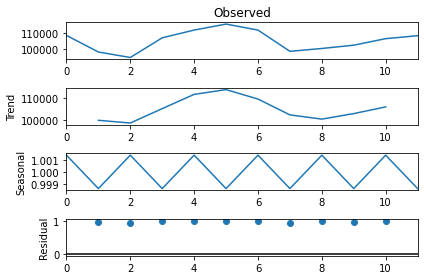

In [327]:
crime_LAK_df = crimes_total[crimes_total.STATE=='LAKSHADWEEP']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_DEL_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

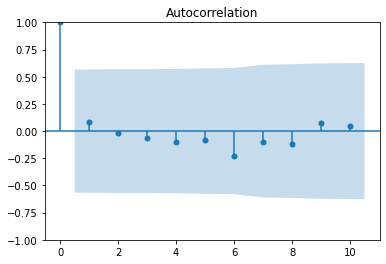

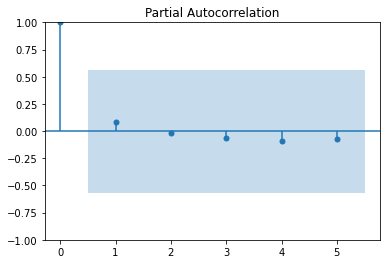

In [328]:
crimes_LAK_forecast = crime_LAK_df.copy()
crimes_LAK_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_LAK_forecast = crimes_LAK_forecast.reset_index(drop = True)
plot(crimes_LAK_forecast)


In [329]:
LAK_arim = ARIMA(crimes_LAK_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,1,0))
LAK_moLAK = LAK_arim.fit()
LAK_moLAK.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -50.318
Date:                Wed, 24 Nov 2021   AIC                            106.636
Time:                        14:39:22   BIC                            107.227
Sample:                             0   HQIC                           105.359
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0057      0.374     -2.686      0.007      -1.740      -0.272
ar.L2         -0.4399      0.435     -1.012      0.312      -1.292       0.412
sigma2      3724.1250   2514.684      1.481      0.139   -1204.566    8652.816
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.19   Prob(JB):                         0.97
Heteroskedasticity (H):               8.58   Skew:                             0.20
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [331]:
forecast_LAK = LAK_moLAK.predict(10,11)
print('prediction',forecast_LAK)
forecast_df_LAK = LAK_moLAK.forecast(steps=10)
print('forecasting',forecast_df_LAK)

prediction [234.74319516 164.07998014]
forecasting [234.74319516 164.07998014 168.83353991 195.13918869 166.59116401
 183.73072368 179.05166531 176.21748867 181.12638733 177.43610524]


In [332]:
get_mape(crimes_LAK_forecast.TOTAL[10:12],forecast_LAK)


101.74

In [333]:
i=12
for j in range(len(forecast_df_LAK)):
    crimes_LAK_forecast.loc[i] = crimes_LAK_forecast.YEAR[i-1]+1
    crimes_LAK_forecast.TOTAL[i] = forecast_df_LAK[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_LAK_forecast["YEAR"], y= crimes_LAK_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_LAK_forecast["YEAR"][13:], y= crimes_LAK_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

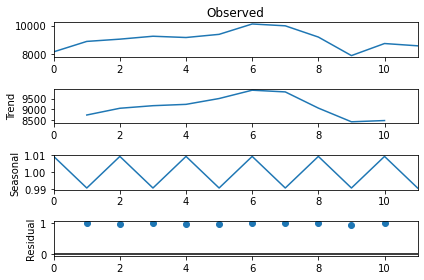

In [334]:
crime_PUD_df = crimes_total[crimes_total.STATE=='PUDUCHERRY']
ts_decompose = sm.tsa.seasonal_decompose(np.array(crime_PUD_df['TOTAL']),
                                 model = "multiplicative", period=2)
ts_plot = ts_decompose.plot()

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

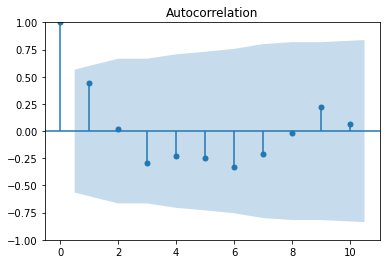

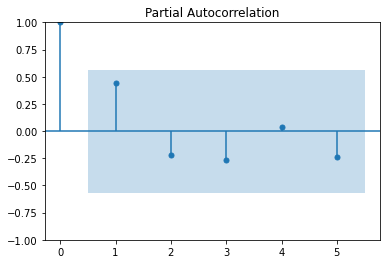

In [335]:
crimes_PUD_forecast = crime_PUD_df.copy()
crimes_PUD_forecast.drop(['STATE'], axis = 1, inplace = True)
crimes_PUD_forecast = crimes_PUD_forecast.reset_index(drop = True)
plot(crimes_PUD_forecast)

In [336]:
PUD_arim = ARIMA(crimes_PUD_forecast.TOTAL[0:10].astype(np.float64).to_numpy(), order=(2,0,0))
PUD_moPUD = PUD_arim.fit()
PUD_moPUD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -75.323
Date:                Wed, 24 Nov 2021   AIC                            158.647
Time:                        14:39:34   BIC                            159.857
Sample:                             0   HQIC                           157.319
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8886.8522    531.026     16.735      0.000    7846.061    9927.643
ar.L1          1.2630      1.282      0.985      0.325      -1.250       3.776
ar.L2         -0.7800      0.371     -2.104      0.035      -1.507      -0.053
sigma2      1.578e+05   1.91e+05      0.826      0.409   -2.17e+05    5.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.57
Prob(Q):                              1.00   Prob(JB):                         0.75
Heteroskedasticity (H):               0.79   Skew:                             0.49
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [338]:
forecast_PUD = PUD_moPUD.predict(10,11)
print('prediction',forecast_PUD)
forecast_df_PUD = PUD_moPUD.forecast(steps=10)
print('forecasting',forecast_df_PUD)


prediction [7372.30952851 7767.09694139]
forecasting [7372.30952851 7767.09694139 8653.93703023 9466.1053064  9800.14864279
 9588.54857082 9060.72901012 8559.12651243 8337.29516294 8448.37498495]


In [339]:
get_mape(crimes_PUD_forecast.TOTAL[10:12],forecast_PUD)


12.39

In [340]:
i=12
for j in range(len(forecast_df_PUD)):
    crimes_PUD_forecast.loc[i] = crimes_PUD_forecast.YEAR[i-1]+1
    crimes_PUD_forecast.TOTAL[i] = forecast_df_PUD[j]
    i = i+1

fig = go.Figure()
fig.add_trace(go.Scatter(x= crimes_PUD_forecast["YEAR"], y= crimes_PUD_forecast['TOTAL'],
                    name = "Actual",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= crimes_PUD_forecast["YEAR"][13:], y= crimes_PUD_forecast['TOTAL'][13:],
                    name = "Estimated",line=dict(color='blue', width=4)))

In [341]:
#Crimes in UP
crimes_UP = crimes_df[crimes_df.STATE=="UTTAR PRADESH"]


In [342]:
crimes_UP.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [343]:
# Countplot for crime types
Dist_UP = crimes_UP[crimes_UP.DISTRICT=='TOTAL']
Dist_UP = crimes_UP.groupby(["YEAR"]).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [344]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= Dist_UP["YEAR"], y= Dist_UP['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [345]:
crimes_theft = crimes_UP[crimes_UP.DISTRICT!="TOTAL"]
crimes_theft = crimes_theft.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'DEATH_BY_NEGLIGENCE':sum}).reset_index()
crimes_theft.head(5)

DISTRICT  TOTAL_THEFT  HURT  DEATH_BY_NEGLIGENCE
0            AGRA        41450  5381                 4605
1         ALIGARH        20786  3756                 3103
2       ALLAHABAD        18356  5073                 3812
3  AMBEDKAR NAGAR         2686  1911                  599
4         AURAIYA         2088  1526                 1490

In [346]:
crimes_large = crimes_theft[(crimes_theft.TOTAL_THEFT>10000) & (crimes_theft.HURT>5000) & (crimes_theft.DEATH_BY_NEGLIGENCE>2000)].reset_index()

crimes_large

index      DISTRICT  TOTAL_THEFT  HURT  DEATH_BY_NEGLIGENCE
0      0          AGRA        41450  5381                 4605
1      2     ALLAHABAD        18356  5073                 3812
2     43  KANPUR NAGAR        27788  5567                 4043

In [347]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crimes_large["DISTRICT"],
    y=crimes_large["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=crimes_large["DISTRICT"],
    y=crimes_large["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=crimes_large["DISTRICT"],
    y=crimes_large["DEATH_BY_NEGLIGENCE"],
    name='DEATH_BY_NEGLIGENCE',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [348]:
crimes_up_clus = crimes_UP.copy()

In [349]:
crimes_up_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [350]:
crimes_up_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [351]:
crimes_up_main = crimes_up_clus[crimes_up_clus.DISTRICT!="TOTAL"]


In [352]:
crimes_up_df = crimes_up_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()
       

In [353]:
scale = StandardScaler()
scale_new = scale.fit_transform(crimes_up_df[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

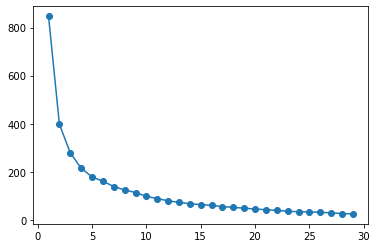

In [354]:
cluster_range = range(1,30)
cluster_error = []

for x in cluster_range:
    cluster = KMeans(x)
    cluster.fit(scale_new)
    cluster_error.append(cluster.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_error, marker = "o")

In [355]:
k = 3
cluster_new = KMeans(3, random_state = 42)
cluster_new.fit(scale_new)
crimes_up_df['Cluster_ID'] = cluster_new.labels_

In [356]:
crimes_up_df[crimes_up_df.Cluster_ID == 0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
3    AMBEDKAR NAGAR         2686  1911         533                 919   
4           AURAIYA         2088  1526         584                 342   
7           BAGHPAT         4018  1111         530                 784   
8          BAHRAICH         3526  1965         765                 447   
9            BALLIA         3098  1926         350                 339   
10        BALRAMPUR         1124   722         260                 182   
11            BANDA         2440  1158         348                 391   
14            BASTI         2440  1542         301                 357   
15       BHIM NAGAR          950   152         207                 125   
18         CHANDOLI         1746  1297         182                 512   
19  CHITRAKOOT DHAM         1046   426         180                 130   
20        CSM NAGAR          658   599         283                 118   
21           DEORIA         2380  1608         373                 308   
23           ETAWAH         4340  1493         822                 714   
24         FAIZABAD         4592  2211         656                 432   
25        FATEHGARH         2862  1253         680                 587   
28           G.R.P.        47320   110          94                   1   
31         GHAZIPUR         2502  1695         244                 569   
32            GONDA         3702  2577         680                 134   
34         HAMIRPUR         1290   463         233                 190   
37        J.P.NAGAR         3436   877         469                 762   
38           JALAUN         2512   101         427                 419   
40           JHANSI         4716   987         454                 377   
41          KANNAUJ         1964   301         558                 822   
42     KANPUR DEHAT         2266  2238         475                 716   
44  KANSHIRAM NAGAR          920   469         255                 132   
45        KAUSHAMBI         1898  1388         383                 610   
47      KUSHI NAGAR         2142  2063         411                 251   
48         LALITPUR         1128   534         141                 237   
50      MAHARAJGANJ         1134   938         352                 282   
51           MAHOBA         1196   337         210                 152   
54              MAU         2756  1437         451                 535   
56         MIRZAPUR         2416  1401         144                 737   
59  PANCHSHIL NAGAR         1438    57         165                 128   
60         PILIBHIT         2900    75         678                1365   
61   PRABUDDH NAGAR          752    13         130                 138   
64    RAMABAI NAGAR          618   741         256                 230   
65           RAMPUR         6718   355         831                 539   
67  SANT KABIRNAGAR         1220  1333         310                 205   
69        SHRAWASTI         1174  1145         238                 104   
70    SIDHARTHNAGAR         1784   761         333                 301   
72        SONBHADRA         1692  1073         200                 190   
73  ST.RAVIDASNAGAR         1436   807          94                 221   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
3        508     430                  599       610    381   
4        292     484                 1490       332    279   
7        420     949                  943       588    598   
8        797     573                  913       975    555   
9        773     436                  821       482    744   
10       271     228                  321       378    146   
11       669     606                  515       562    443   
14       467     373                  986       581    420   
15       156     149                  179        79    135   
18       366     306                  443       518     92   
19       348     317                  517       192     93   
20       1

In [357]:
crimes_up_df[crimes_up_df.Cluster_ID == 1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
5           AZAMGARH         4164  3354         698                1016   
6             BADAUN         4690  3487        1007                 542   
12         BARABANKI         4974  2993         898                1142   
16            BIJNOR         5868  3313         955                2144   
17      BULANDSHAHAR         9220  2073        1317                2386   
22              ETAH         5994  3040         928                 907   
26          FATEHPUR         2500  2370         610                 537   
27         FIROZABAD         8658  3403        1361                1123   
29  GAUTAMBUDH NAGAR        37226   407         882                 882   
33         GORAKHPUR        13282  3778        1272                1535   
35            HARDOI         4560  3663         847                 821   
36           HATHRAS         5002  1764         713                1257   
39           JAUNPUR         3666  3581         582                 866   
46             KHIRI         6954  4333        1102                 884   
52          MAINPURI         4828  2380         845                 466   
53           MATHURA        13134  1785         905                1842   
57         MORADABAD        15392  1086        1586                2558   
58     MUZAFFARNAGAR        13290   261        1766                2546   
62        PRATAPGARH         3924  3558         723                 942   
63       RAIBAREILLY         4654  3099         640                1233   
66        SAHARANPUR         9292   385         670                1830   
68      SHAHJAHANPUR         5526  2381        1170                 438   
71           SITAPUR        10436  3155        1510                1200   
74         SULTANPUR         5206  3071         556                 767   
75             UNNAO         4486  2672         959                1061   
76          VARANASI        14726  2552         668                1408   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
5        982     967                 1135       861   1110   
6        686    1742                  658       637    329   
12       993     753                 1807       545    366   
16       653    1078                 1983      1683    613   
17       853    1974                 2882      1622   1035   
22       699    1477                 1660      1025   1071   
26       568     990                 2138       822    211   
27       755    1406                 1024      1063   1137   
29      1294     944                 2340      2415    943   
33      1887    1109                 3010      2140   1645   
35       596    1151                 2218       754    378   
36       641     759                 1179       765    948   
39       737     557                 1585      1090    684   
46       793    1255                 1528       879    664   
52       604    1229                 1153       816    752   
53       903    1186                 4014      2375   1323   
57      1474    1818                 2161      1799    957   
58      1147    2483                 1721      1885   1594   
62      1007     673                 1195       800   1103   
63       806     714                 1691       707    604   
66       712     947                 1487      2208    934   
68       705    1563                 2122      1050    442   
71      1356    1445                 2288      1017    770   
74      1080     711                 1636       594    529   
75       692    1079                 2073       714    658   
76      1412     751                 1673      2022    924   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_ID  
5                     251              6694           1  
6                     495             11356           1  
12                    394              9715           1  
16                    442              7214           1  
17                   

In [358]:
crimes_up_df[crimes_up_df.Cluster_ID == 2]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
0           AGRA        41450  5381        2541                4003      3063   
1        ALIGARH        20786  3756        2134                2754      1875   
2      ALLAHABAD        18356  5073        1425                2316      2861   
13      BAREILLY        14046  4640        1754                2570      1662   
30     GHAZIABAD        47876   731        2340                2922      2237   
43  KANPUR NAGAR        27788  5567        2636                4341      2849   
49       LUCKNOW        57632   793        2914                5598      6663   
55        MEERUT        31484   689        2082                3746      2255   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
0     1609                 4605      3323   3279                   1278   
1     2032                 3103      2768   2823                    994   
2     1652                 3812      2385   1847                    665   
13    2070                 2630      2518   1290                   1075   
30    2227                 4719      3665   1299                    534   
43    1961                 4043      4427   1945                   1083   
49    1828                 5058      7731   2909                   1402   
55    2398                 3279      3072   1963                    831   

    OTHER IPC CRIMES  Cluster_ID  
0              20143           2  
1              13804           2  
2              20104           2  
13             19471           2  
30             19741           2  
43             22257           2  
49             43505           2  
55             17894           2

In [359]:
#crimes in Delhi
crimes_DEL = crimes_df[crimes_df.STATE=="DELHI UT"]
crimes_DEL.shape

(183, 34)

In [360]:
crimes_DEL.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [361]:
Dist_DEL = crimes_DEL[crimes_DEL.DISTRICT=='TOTAL']


In [362]:
Dist_DEL = crimes_DEL.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [363]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_UP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= Dist_DEL["YEAR"], y= Dist_DEL['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [364]:
crimes_all = crimes_DEL[crimes_DEL.DISTRICT!="TOTAL"]
crimes_all = crimes_all.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'CRUELTY_BY_HUSBAND':sum}).reset_index()


In [365]:
crimes_del = crimes_all[(crimes_all.TOTAL_THEFT>10000) & (crimes_all.CRUELTY_BY_HUSBAND>1000)].reset_index()
crimes_del

index    DISTRICT  TOTAL_THEFT  CRUELTY_BY_HUSBAND
0      3        EAST        58330                1860
1      9  NORTH EAST        37866                1947
2     10  NORTH WEST        55120                2180
3     11       OUTER        23250                1107
4     13       SOUTH        74934                1443
5     15  SOUTH WEST        35614                1498
6     17        WEST        54066                2387

In [366]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crimes_del["DISTRICT"],
    y=crimes_del["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=crimes_del["DISTRICT"],
    y=crimes_del["CRUELTY_BY_HUSBAND"],
    name='CRUELTY BY HUSBAND',
    marker_color='Purple'
))

In [367]:
crimes_del_clus = crimes_DEL.copy()
crimes_del_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [368]:
crimes_del_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [369]:
crimes_del_main = crimes_del_clus[crimes_del_clus.DISTRICT!="TOTAL"]


In [370]:
crimes_del_df = crimes_del_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()
    
       

In [371]:
scaled = StandardScaler()
scaled_new = scaled.fit_transform(crimes_del_df[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

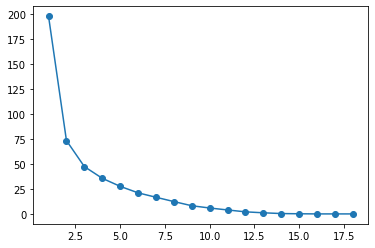

In [372]:
new_range = range(1,19)
rate_error = []
for i in new_range:
    cluster_df = KMeans(i)
    cluster_df.fit(scaled_new)
    rate_error.append(cluster_df.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_range, rate_error, marker="o")

In [373]:
k = 2
clusterdel = KMeans(2, random_state=42)
clusterdel.fit(scaled_new)
crimes_del_df['cluster_id'] = clusterdel.labels_

In [374]:
crimes_del_df[crimes_del_df.cluster_id == 0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0              CAW            0     2           0                 789   
1          CENTRAL        31174  1755        1085                 606   
2     CRIME BRANCH           34     0           4                   0   
4              EOW            0     0           0                   0   
5      G.R.P.(RLY)        22316   108         140                   2   
6   I.G.I. AIRPORT         2032    20          47                   3   
7        NEW DELHI        18636   394         303                  94   
8            NORTH        24758  1603        1225                 785   
11           OUTER        23250  1382        2653                1107   
12          S.T.F.            6     0           1                   0   
14      SOUTH EAST        24954  1190        1885                 510   
16        SPL CELL            2     0           0                   0   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0          0       0                    0         0      0   
1       1065     316                  124      1963     54   
2          0       4                    0       218      0   
4          0       0                    0       672      0   
5         17     101                    8       165      8   
6          7      17                   44      4798     10   
7        590      86                  749      2500     93   
8       1119     361                  105      1638     69   
11      1453     531                  234       849     35   
12         0       2                    0       125      0   
14       886     269                 1338       937     40   
16         0       0                    0        73      0   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
0                       3                 1           0  
1                     419             13559           0  
2                       0               104           0  
4                       1                90           0  
5                      45              1008           0  
6                      50              1736           0  
7                     266              8325           0  
8                     346             16949           0  
11                    417             11905           0  
12                      1               111           0  
14                    539              9635           0  
16                      0                39           0

In [375]:
crimes_del_df[crimes_del_df.cluster_id == 1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
3         EAST        58330  2649        2793                1860      2253   
9   NORTH EAST        37866  3119        3385                1947      1657   
10  NORTH WEST        55120  3059        4054                2180      4264   
13       SOUTH        74934  2167        2390                1443      4163   
15  SOUTH WEST        35614  1690        2419                1498      3205   
17        WEST        54066  3072        2699                2387      2876   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
3      570                  985      1850    148                   1000   
9      763                 1410      1131     74                    808   
10    1098                  341      1810     94                    989   
13     713                  652      3500    173                   1124   
15     635                  552      1860    152                    742   
17     739                  961      2039     46                    784   

    OTHER IPC CRIMES  cluster_id  
3              21920           1  
9              18292           1  
10             38266           1  
13             37742           1  
15             25981           1  
17             31794           1

In [376]:
#Crimes in west bengal

In [377]:
crimes_WB = crimes_df[crimes_df.STATE=="WEST BENGAL"]
crimes_WB.shape

(309, 34)

In [378]:
crimes_WB.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [379]:
DIST_WB = crimes_WB[crimes_WB.DISTRICT=='TOTAL']

In [380]:
DIST_WB = crimes_WB.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [381]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_WB["YEAR"], y= DIST_WB['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [382]:
crimes_wb_df = crimes_WB[crimes_WB.DISTRICT!="TOTAL"]
crimes_wb_df = crimes_wb_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'CRUELTY_BY_HUSBAND':sum, 'HURT':sum}).reset_index()


In [383]:
crimes_wb_df

DISTRICT  TOTAL_THEFT  CRUELTY_BY_HUSBAND   HURT
0   24 PARGANAS NORTH        43972               17446   1879
1   24 PARGANAS SOUTH        36852               18672   1864
2             ASANSOL         6306                2563    843
3             BANKURA         5644                1858   2199
4              BDN CP         1694                 320      0
5             BIRBHUM         7350                2629   2768
6              BKP CP         2714                 989    143
7             BURDWAN        13258                5160   1709
8          COOCHBEHAR         4576                3925   1268
9    DAKSHIN DINAJPUR         3078                2149   1526
10         DARJEELING        11520                1346   5390
11            HOOGHLY        14936                7040   2375
12             HOWRAH        30928                6728   2668
13         JALPAIGURI        26458                6745   5558
14           JHARGRAM          194                  47     11
15   KHARAGPUR G.R.P.         2652                   7     29
16            KOLKATA        82634                4362  19434
17              MALDA         8076                4221   3357
18           MIDNAPUR         1162                 470     63
19        MURSHIDABAD        15666               17229  18652
20              NADIA        23046               11296  14539
21   PASCHIM MIDNAPUR         9192                5355   1298
22     PURAB MIDNAPUR         6640                4857    113
23            PURULIA         5052                1778    205
24     SEALDAH G.R.P.         5962                  10    247
25    SILIGURI G.R.P.         2308                   1      0
26        SILIGURI_PC         1698                 370    812
27     UTTAR DINAJPUR         7368                3095   5202

In [384]:
wb_crimes = crimes_wb_df[(crimes_wb_df.TOTAL_THEFT>10000) & (crimes_wb_df.CRUELTY_BY_HUSBAND>5000) & (crimes_wb_df.HURT>2000)].reset_index()
wb_crimes

index     DISTRICT  TOTAL_THEFT  CRUELTY_BY_HUSBAND   HURT
0     11      HOOGHLY        14936                7040   2375
1     12       HOWRAH        30928                6728   2668
2     13   JALPAIGURI        26458                6745   5558
3     19  MURSHIDABAD        15666               17229  18652
4     20        NADIA        23046               11296  14539

In [385]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=wb_crimes["DISTRICT"],
    y=wb_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=wb_crimes["DISTRICT"],
    y=wb_crimes["CRUELTY_BY_HUSBAND"],
    name='BURGLARY',
    marker_color='PINK'
))
fig.add_trace(go.Bar(
    x=wb_crimes["DISTRICT"],
    y=wb_crimes["HURT"],
    name='CHEATING',
    marker_color='Blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [386]:
crimes_wb_clus = crimes_WB.copy()
crimes_wb_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [387]:
crimes_wb_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [388]:
crimes_wb_main = crimes_wb_clus[crimes_wb_clus.DISTRICT!="TOTAL"]

In [389]:
crimes_KMe_wb = crimes_wb_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [390]:
scaled = StandardScaler()
scaled_wb = scaled.fit_transform(crimes_KMe_wb[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

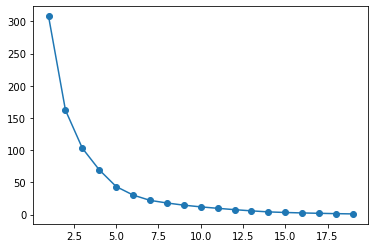

In [391]:
new = range(1,20)
rate = []
for i in new:
    clustering = KMeans(i)
    clustering.fit(scaled_wb)
    rate.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new, rate, marker="o")

In [392]:
k = 3
wb_clus = KMeans(3, random_state=42)
wb_clus.fit(scaled_wb)
crimes_KMe_wb['cluster_id'] = wb_clus.labels_

In [393]:
crimes_KMe_wb[crimes_KMe_wb.cluster_id==0] 

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
2            ASANSOL         6306   843         282                2563   
3            BANKURA         5644  2199         351                1858   
4             BDN CP         1694     0          53                 320   
5            BIRBHUM         7350  2768         532                2629   
6             BKP CP         2714   143         214                 989   
8         COOCHBEHAR         4576  1268        1130                3925   
9   DAKSHIN DINAJPUR         3078  1526         710                2149   
10        DARJEELING        11520  5390         491                1346   
14          JHARGRAM          194    11          21                  47   
15  KHARAGPUR G.R.P.         2652    29          15                   7   
17             MALDA         8076  3357        1323                4221   
18          MIDNAPUR         1162    63          74                 470   
21  PASCHIM MIDNAPUR         9192  1298         806                5355   
22    PURAB MIDNAPUR         6640   113        1042                4857   
23           PURULIA         5052   205         276                1778   
24    SEALDAH G.R.P.         5962   247          67                  10   
25   SILIGURI G.R.P.         2308     0          31                   1   
26       SILIGURI_PC         1698   812         123                 370   
27    UTTAR DINAJPUR         7368  5202        1059                3095   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
2         98     395                 1094       364    705   
3        118     665                 1636       337   1410   
4         10      15                    0       186     32   
5        173     908                 2131       392   2691   
6          9      89                  124       224    125   
8        118     485                 1065       433    737   
9         63     369                  906       212    313   
10       100     583                 1545       207    449   
14         3      30                   51        17     52   
15         1      44                   14        10     24   
17       143     885                  799       429    654   
18        39     120                    9        27    363   
21       250    1350                   24       493   3337   
22       156     707                 2254       614   4082   
23        49     733                  206       376    920   
24         0     188                    4        94    128   
25         1      42                    0         6     26   
26         3      32                   69       195      9   
27        84     638                 1029       290    683   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
2                     206              8614           0  
3                     584              5794           0  
4                      58              1765           0  
5                     626              6978           0  
6                      88              2961           0  
8                    1005             11463           0  
9                     733              6943           0  
10                    486              6408           0  
14                     28               264           0  
15                     19               203           0  
17                   1205             14434           0  
18                     54              2440           0  
21                    745             17031           0  
22                    291             15992           0  
23                    601              7976           0  
24                     56               549           0  
25                     31               413           0  
26                     35               385           0  
27                    712             10458           0

In [394]:
crimes_KMe_wb[crimes_KMe_wb.cluster_id==1] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0   24 PARGANAS NORTH        43972   1879        3311               17446   
1   24 PARGANAS SOUTH        36852   1864        2209               18672   
7             BURDWAN        13258   1709         864                5160   
11            HOOGHLY        14936   2375         793                7040   
12             HOWRAH        30928   2668        1360                6728   
13         JALPAIGURI        26458   5558        1853                6745   
19        MURSHIDABAD        15666  18652        2943               17229   
20              NADIA        23046  14539        2532               11296   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0        387    2329                  180      2168   5484   
1        556    2114                  401      1389   8893   
7        247    1290                 5109      1227   3280   
11       335    1115                 1940      1121   5065   
12       336     990                 3394      2412   2319   
13       507    1345                 2884       555    791   
19       114    1644                 3198      1125   3143   
20       166    1355                 2351      1568   2446   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
0                    1919             56644           1  
1                    1438             58961           1  
7                     924             22351           1  
11                    457             15784           1  
12                   1014             30321           1  
13                   1887             24018           1  
19                   3487             17323           1  
20                   1610             23783           1

In [395]:
crimes_KMe_wb[crimes_KMe_wb.cluster_id==2] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
16  KOLKATA        82634  19434        1534                4362      1434   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
16     596                 5334     14360   2993                   2572   

    OTHER IPC CRIMES  cluster_id  
16             55938           2

In [396]:
#Crimes In MAHARASHTRA

crimes_MH = crimes_df[crimes_df.STATE=="MAHARASHTRA"]
crimes_MH.shape

(552, 34)

In [397]:
DIST_MH = crimes_MH[crimes_MH.DISTRICT=='TOTAL']

In [398]:
DIST_MH = crimes_MH.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()
    

In [399]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_MH["YEAR"], y= DIST_MH['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [400]:
crimes_mh_df = crimes_MH[crimes_MH.DISTRICT!="TOTAL"]
crimes_mh_df = crimes_mh_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'BURGLARY':sum}).reset_index()


In [401]:
mh_crimes = crimes_mh_df[(crimes_mh_df.TOTAL_THEFT>10000) & (crimes_mh_df.HURT>10000) & (crimes_mh_df.BURGLARY>5000)].reset_index()


In [402]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=mh_crimes["DISTRICT"],
    y=mh_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=mh_crimes["DISTRICT"],
    y=mh_crimes["HURT"],
    name='HURT',
    marker_color='Blue'
))
fig.add_trace(go.Bar(
    x=mh_crimes["DISTRICT"],
    y=mh_crimes["BURGLARY"],
    name='BURGLARY',
    marker_color='yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [403]:
crimes_mh_clus = crimes_MH.copy()
crimes_mh_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [404]:
crimes_mh_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [405]:
crimes_mh_main = crimes_mh_clus[crimes_mh_clus.DISTRICT!="TOTAL"]

In [406]:
crimes_KMe_mh = crimes_mh_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [407]:
scaled = StandardScaler()
scaled_mh = scaled.fit_transform(crimes_KMe_mh[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

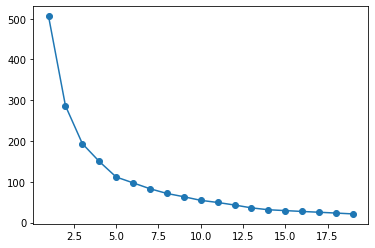

In [408]:
new_mh = range(1,20)
rate_mh = []
for i in new_mh:
    clustering = KMeans(i)
    clustering.fit(scaled_mh)
    rate_mh.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_mh, rate_mh, marker="o")

In [409]:
k = 4
mh_clus = KMeans(4, random_state=42)
mh_clus.fit(scaled_mh)
crimes_KMe_mh['cluster_id'] = mh_clus.labels_

In [410]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
2     AMRAVATI COMMR.        19394  4873         225                 909   
4   AURANGABAD COMMR.        18016  4891         302                1541   
7            BHANDARA        11052  4368         146                 786   
10              DHULE         8316  4450         122                2080   
11         GADCHIROLI         3212  2787         116                 510   
12             GONDIA         8000  4249         210                 668   
13            HINGOLI         4400  5277         127                1223   
20        MUMBAI RLY.        43208   489          56                   0   
22        NAGPUR RLY.        22408   286          20                   4   
25          NANDURBAR         4114  3071         110                 996   
26       NASIK COMMR.        27076  2933         250                1502   
32          PUNE RLY.         7200    68          12                   0   
34             RAIGAD         7926  3186         124                 608   
35          RATNAGIRI         5400  2312         101                 542   
38         SINDHUDURG         2682  1586          60                 105   
39     SOLAPUR COMMR.         9218  2182         181                 776   
44             WASHIM         9384  5368         205                1454   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
2       2850     292                  838       640    966   
4       3181     418                 1686      1705   1778   
7       2315     343                 1586       437    774   
10      1675     538                 2910       777   1678   
11      1161     694                  911       144    317   
12      2278     432                 1327       386    495   
13      1136     430                  996       396   1381   
20        36      97                   21       408    124   
22        22      79                   24        55    123   
25       865     427                 1308       422   1089   
26      5186     385                 2384      1693   1495   
32         3      31                   10        32     38   
34      1902     536                 3641       901   1586   
35      1737     225                 1574       571   1003   
38      1128     154                  880       391    493   
39      2091     257                 1051      1126    961   
44      1349     359                 1056       341   1140   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
2                     488              9146           0  
4                     544              8632           0  
7                     629              9711           0  
10                    361              8667           0  
11                    495              4326           0  
12                    965              7097           0  
13                    465              5493           0  
20                    136              1100           0  
22                     72              1323           0  
25                    347              4412           0  
26                    398              8124           0  
32                     18               443           0  
34                    467              7637           0  
35                    417              4843           0  
38                    198              2661           0  
39                    222              5342           0  
44                    765              6761           0

In [411]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==1]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0      AHMEDNAGAR        28810   8397         514                5571   
18         MUMBAI       109872  18382         793                1195   
21  NAGPUR COMMR.        54976  10923         646                2320   
31    PUNE COMMR.        97796  13740        1087                2493   
33     PUNE RURAL        28506   8220         492                2195   
41   THANE COMMR.        56058  17026        1046                3408   
42    THANE RURAL        20736   9068         512                1344   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0       5248    1210                 6858      2023   4742   
18     14163    1254                 3487      6694    944   
21     12414    1175                 3106      3210   2555   
31     13165    1317                 5687      6648   6489   
33      5825    1619                10897      1984   3355   
41     13137    1384                 3702      7506   3390   
42      6989    1688                 7326      2330   3316   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
0                    1278             16686           1  
18                   1516             31636           1  
21                    849             32942           1  
31                   1060             30547           1  
33                   1125             19310           1  
41                   1534             13344           1  
42                   1334             11797           1

In [412]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
19  MUMBAI COMMR.       170730  28353        1334                2736   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
19     19916    1542                 4942     13577   2364   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
19                   3200             47568           2

In [413]:
crimes_KMe_mh[crimes_KMe_mh.cluster_id==3]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
1              AKOLA        21524   9586         312                1768   
3     AMRAVATI RURAL        21492  10291         278                1501   
5   AURANGABAD RURAL         9476   8854         138                2931   
6               BEED        14238  11603         419                3542   
8           BULDHANA        17192   9240         269                2422   
9         CHANDRAPUR        16570   7347         262                1617   
14           JALGAON        17142   8827         338                4273   
15             JALNA         9062   6936         182                3092   
16          KOLHAPUR        16896   6311         301                1273   
17             LATUR         9254  10297         302                1738   
23      NAGPUR RURAL        22308   8576         282                1019   
24            NANDED        12582  15343         455                3202   
27       NASIK RURAL        13290   9786         305                4013   
28       NAVI MUMBAI        33372   4972         243                 818   
29         OSMANABAD         8732   7922         211                1712   
30          PARBHANI         7582  11617         246                2103   
36            SANGLI        12878   4969         275                1103   
37            SATARA        19590   5545         327                2161   
40     SOLAPUR RURAL        13234   7873         393                1758   
43            WARDHA        16116   9289         274                1055   
45          YAVATMAL        22594  12091         498                2296   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
1       3351     588                 1514      1023   1513   
3       3294     774                 1996       486   1242   
5       1973     640                 2878       542   2555   
6       3577     832                 2933       925   4587   
8       2541     635                 2409       960   2432   
9       3480     613                 2737       713   1383   
14      2925    1007                 4233      2505   2825   
15      2254     594                 1707       892   2110   
16      3294     719                 3816      2470   2521   
17      2456     718                 2274       937   2518   
23      3462     909                 4620       598   1471   
24      4347     992                 2292      1600   3266   
27      2891    1078                 6651      1348   4347   
28      5493     638                 4277      3013   1449   
29      2248     547                 2617      1079   1990   
30      2481     587                 1336       780   1777   
36      2573     815                 3482      1921   1725   
37      4140     728                 4839      1453   2114   
40      2797    1081                 5244       948   3053   
43      3003     515                 1883       612   1268   
45      3265     871                 2667       700   1502   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
1                    1109             14930           3  
3                    1565             12649           3  
5                     690              7231           3  
6                     995              9117           3  
8                    1442             12853           3  
9                    1246             13706           3  
14                   1233             15214           3  
15                    687              7829           3  
16                    675             11557           3  
17                    701             11722           3  
23                   1154             17286           3  
24                    962             19659           3  
27                   1054             15327           3  
28                    449              9591           3  
29                    752              9183           3  
30                    680              3953   

In [414]:
#Crimes in Tamil Nadu
crimes_TN = crimes_df[crimes_df.STATE=='TAMIL NADU']

In [415]:
DIST_TN = crimes_TN[crimes_TN.DISTRICT=='TOTAL']

In [416]:
DIST_TN = crimes_TN.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()
    

In [417]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_TN["YEAR"], y= DIST_TN['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [418]:
crimes_TN_df = crimes_TN[crimes_TN.DISTRICT!="TOTAL"]
crimes_TN_df = crimes_TN_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'DEATH_BY_NEGLIGENCE': sum}).reset_index()


In [419]:
TN_crimes = crimes_TN_df[(crimes_TN_df.TOTAL_THEFT>10000) & (crimes_TN_df.HURT>5000) & (crimes_TN_df.DEATH_BY_NEGLIGENCE>5000)].reset_index()


In [420]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=TN_crimes["DISTRICT"],
    y=TN_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=TN_crimes["DISTRICT"],
    y=TN_crimes["HURT"],
    name='HURT',
    marker_color='Blue'
))
fig.add_trace(go.Bar(
    x=TN_crimes["DISTRICT"],
    y=TN_crimes["DEATH_BY_NEGLIGENCE"],
    name='DEATH_BY_NEGLIGENCE',
    marker_color='Orange'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [421]:
crimes_tn_clus = crimes_TN.copy()
crimes_tn_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [422]:
crimes_tn_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [423]:
crimes_tn_main = crimes_tn_clus[crimes_tn_clus.DISTRICT!="TOTAL"]

In [424]:
crimes_KMe_tn = crimes_tn_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [425]:
scaled = StandardScaler()
scaled_tn = scaled.fit_transform(crimes_KMe_tn[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

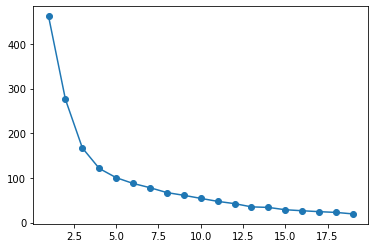

In [426]:
new_tn = range(1,20)
rate_tn = []
for i in new_tn:
    clustering = KMeans(i)
    clustering.fit(scaled_tn)
    rate_tn.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_tn, rate_tn, marker="o")

In [427]:
k = 3
tn_clus = KMeans(3, random_state=42)
tn_clus.fit(scaled_tn)
crimes_KMe_tn['cluster_id'] = tn_clus.labels_

In [428]:
crimes_KMe_tn[crimes_KMe_tn.cluster_id==0] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
5     COIMBATORE RURAL        21346  13866         524                 973   
7            CUDDALORE        10848  10813         630                 470   
8           DHARMAPURI         5350  11529         538                 466   
9             DINDIGUL         9470   5556         554                 764   
10               ERODE        13484  15755         507                 432   
11         KANCHIPURAM         9800   5184         199                 181   
15       MADURAI RURAL         8570  11095         570                 760   
23         SALEM RURAL         5656  21864         985                 993   
26           THANJAVUR        13906   9150         537                 291   
28  THIRUNELVELI RURAL        10420  11797         602                 936   
33         THOOTHUGUDI        10758   7145         399                 586   
38             VELLORE        13642  14838         609                 484   
39          VILLUPURAM         8756   8886         952                 671   
41        VIRUDHUNAGAR         9580   6084         477                 662   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
5       2861     816                 8862      1139   2580   
7       1382     720                 4918       269   2168   
8       1022     665                 3147       421   2334   
9       1217     721                 4872       906    749   
10      1707     642                 6411       934    499   
11      1568     690                 7024       454   1068   
15      1511     690                 4522      1407   1927   
23      1043     806                 5103       575   2545   
26      2111     724                 4211       471   1274   
28      2190     933                 3688      1013    133   
33      2053     828                 3155      1063    472   
38      2318     871                 6343       760    999   
39      1400     826                 7478       640   3711   
41      1440     580                 2901      1122    935   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
5                     912             53511           0  
7                     619             57162           0  
8                     753             23096           0  
9                     455             37766           0  
10                    635             40565           0  
11                    385             52554           0  
15                    752             29960           0  
23                   1692             29704           0  
26                    931             36833           0  
28                   1222             51712           0  
33                    340             35537           0  
38                    461             52065           0  
39                   1222             49783           0  
41                    498             33457           0

In [429]:
crimes_KMe_tn[crimes_KMe_tn.cluster_id==1] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0             ARIYALUR         1034   1544         136                  53   
1              CHENGAI         8602   3442         114                 319   
3         CHENNAI RLY.         4530    348           8                   8   
4      CHENNAISUBURBAN         4304   1874          87                 157   
6     COIMBATORE URBAN        21568   2583         172                 570   
12         KANYAKUMARI         7248   7242         313                 719   
13               KARUR         5628   2953         278                 209   
14         KRISHNAGIRI         5110   5892         377                 247   
16       MADURAI URBAN        12470   1979         319                 587   
17        NAGAPATTINAM         5746   9575         354                 164   
18            NAMAKKAL         5222  10465         417                 285   
19            NILGIRIS         2440   2561          64                  93   
20          PERAMBALUR         3618   4537         277                 213   
21          PUDUKOTTAI         5116   3512         377                 370   
22       RAMNATHAPURAM         4640   5515         384                 205   
24         SALEM URBAN         7026   2967         261                 313   
25          SIVAGANGAI         5850   4049         333                 471   
27               THENI         6010   7300         440                 534   
29  THIRUNELVELI URBAN         4328   1176         148                 131   
30         THIRUVALLUR         4604   7392         226                 268   
31     THIRUVANNAMALAI         7060   8613         458                 284   
32          THIRUVARUR         4386   8384         229                 132   
34            TIRUPPUR         6172   2013         225                 257   
35         TRICHY RLY.         1488    172           1                   4   
36        TRICHY RURAL         4760   6555         351                 324   
37        TRICHY URBAN        10404   2301         195                 331   
40          VILUPPURAM          612    468          49                  59   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0        192     138                  531        65    242   
1       1855     308                 2303       464    417   
3         18      29                   51        60    105   
4        903     232                 1759       524    213   
6       1773     261                 2941      1249    795   
12      2110     422                 3113      1113     38   
13       532     282                 2768       195    273   
14       811     521                 3689       509   1364   
16      1156     347                 1377      2054    554   
17       827     521                 2096       338    568   
18       690     420                 4222       510    753   
19       894     173                  458       152    248   
20       562     292                 1738       355    534   
21       802     402                 2719       339   1202   
22       914     433                 1903       518   1226   
24       557     242                 1467       604    303   
25      1099     375                 2160       619    501   
27      1104     364                 2183      1181    849   
29       511     199                  884       415    150   
30       941     375                 3059       357   1133   
31      1130     478                 3324       603   1800   
32       891     307                 1719       241    577   
34       993     228                 2882       534    234   
35        18      11                   48        16     27   
36       783     594                 5593       266    527   
37       805     228                 1570       782     95   
40       102      68                  567        21    250   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  cluster_id  
0                     241         

In [430]:
crimes_KMe_tn[crimes_KMe_tn.cluster_id==2] 

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
2  CHENNAI        58758  11699         627                2212      6543   

   MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
2    1365                10434      6431    996                    849   

   OTHER IPC CRIMES  cluster_id  
2             86221           2

In [431]:
#Crimes in Bihar
crimes_BI = crimes_df[crimes_df.STATE=='BIHAR']
crimes_BI.shape

(540, 34)

In [432]:
DIST_BI = crimes_BI[crimes_BI.DISTRICT=='TOTAL']

In [433]:
DIST_BI = crimes_BI.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()
                                           
    

In [434]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_BI["YEAR"], y= DIST_BI['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [435]:
crimes_BI_df = crimes_BI[crimes_BI.DISTRICT!="TOTAL"]
crimes_BI_df = crimes_BI_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'RIOTS':sum}).reset_index()


In [436]:
BI_crimes = crimes_BI_df[(crimes_BI_df.TOTAL_THEFT>10000) & (crimes_BI_df.RIOTS>1000) & (crimes_BI_df.HURT>5000)].reset_index()


In [437]:
BI_crimes

index     DISTRICT  TOTAL_THEFT   HURT  RIOTS
0     12         GAYA        12394   6399   4381
1     24     MOTIHARI        10406  11461   5244
2     26  MUZAFFARPUR        21010   6568   5098
3     31        PATNA        47884   7533   5948
4     43     VAISHALI        11048   5111   3364

In [438]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=BI_crimes["DISTRICT"],
    y=BI_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=BI_crimes["DISTRICT"],
    y=BI_crimes["RIOTS"],
    name='RIOTS',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=BI_crimes["DISTRICT"],
    y=BI_crimes["HURT"],
    name='HURT',
    marker_color='yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [439]:
crimes_BI_clus = crimes_BI.copy()
crimes_BI_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [440]:
crimes_BI_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [441]:
crimes_BI_main = crimes_BI_clus[crimes_BI_clus.DISTRICT!="TOTAL"]

In [442]:
crimes_KMe_BI = crimes_BI_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [443]:
scaled = StandardScaler()
scaled_BI = scaled.fit_transform(crimes_KMe_BI[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

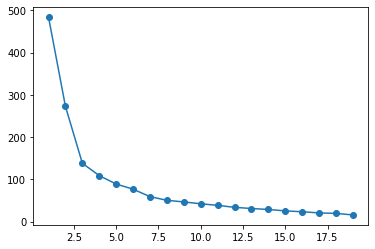

In [444]:
new_BI = range(1,20)
rate_BI = []
for i in new_tn:
    clustering = KMeans(i)
    clustering.fit(scaled_BI)
    rate_BI.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_BI, rate_BI, marker="o")

In [445]:
cluster_bi = KMeans(3, random_state = 42)
cluster_bi.fit(scaled_BI)
crimes_KMe_BI["clu_Id"] = cluster_bi.labels_

In [446]:
crimes_KMe_BI[crimes_KMe_BI.clu_Id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
31    PATNA        47884  7533        3502                2838      6855   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
31    4586                 4618      4833   5948                    287   

    OTHER IPC CRIMES  clu_Id  
31             70387       0

In [447]:
crimes_KMe_BI[crimes_KMe_BI.clu_Id==1]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
2    AURANGABAD         5968   7309         511                 621      1177   
5     BEGUSARAI         7422   5020        1109                 540       833   
6       BETTIAH         7670  14334        1235                 714       993   
8     BHAGALPUR        10512   4047        1122                 849      1610   
9       BHOJPUR         7676   7519         651                1165      1183   
11    DARBHANGA         6928   3814        1104                1648       855   
12         GAYA        12394   6399        1063                 589      1735   
13    GOPALGANJ         4426   3934         929                1169       788   
17      KATIHAR         4758   5675        1143                 540       647   
23    MADHUBANI         6426   9492        1076                1116      1097   
24     MOTIHARI        10406  11461        1712                 773      1665   
26  MUZAFFARPUR        21010   6568        2332                1315      2498   
28      NALANDA         7858  11071        1182                 940      1019   
33       PURNEA         5016   3501        1074                 534       997   
34       ROHTAS         9860   4367         895                 574      1638   
36   SAMASTIPUR         7874   3533        1328                 605      1041   
37        SARAN         9590  12828        1271                1270      1396   
41        SIWAN         5510   4851        1189                 642       939   
43     VAISHALI        11048   5111        1908                1130      1629   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
2      974                 1159       743   3093                    119   
5     1409                 2199       733   2773                    139   
6      906                  938       943   4148                    212   
8     1189                 1080       923   2687                    197   
9     1422                 1485       852   2316                    208   
11     767                 1270      1626   3654                    547   
12    2022                 2279      1022   4381                    209   
13     923                 1061       997   2552                    134   
17     900                  869       746   2285                    131   
23     805                 1011       383   3898                    732   
24    1461                 1110      1239   5244                    151   
26    1779                 2883      1912   5098                    220   
28    1718                 1966       996   2304                    397   
33    1128                 1240       916   2274                    259   
34    1456                 3078       482   2719                    298   
36    1296                 1502       561   3483                    125   
37    1477                 1579      1052   3579                    208   
41    1141                 1135       748   2555                    116   
43    1287                 1679      1178   3364                    314   

    OTHER IPC CRIMES  clu_Id  
2              10687       1  
5              15538       1  
6              10813       1  
8              16215       1  
9              16174       1  
11             21879       1  
12             16935       1  
13             13769       1  
17             11382       1  
23             16253       1  
24             24193       1  
26             28143       1  
28             15615       1  
33             12675       1  
34             17101       1  
36             19269       1  
37             12296       1  
41             10974       1  
43             21545       1

In [448]:
crimes_KMe_BI[crimes_KMe_BI.clu_Id==2]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0             ARARIA         4768  1843         901                 480   
1              ARWAL         1296  1257         148                  99   
3             BAGAHA         3100  3376         719                 169   
4              BANKA         2742  2493         514                 253   
7            BHABHUA         4478  2591         488                 246   
10             BUXAR         5824  3694         571                 493   
14     JAMALPUR RLY.         3168    56          38                   2   
15             JAMUI         2864  4765         519                 450   
16         JEHANABAD         3396  1497         409                 262   
18      KATIHAR RLY.         5302   171          76                  11   
19          KHAGARIA         2380  3824         550                 211   
20        KISHANGANJ         2954  1705         669                 433   
21        LAKHISARAI         2222  1958         460                 217   
22         MADHEPURA         2794  2027         504                 186   
25            MUNGER         4926  2967         693                 476   
27  MUZAFFARPUR RLY.         7616   392          78                   7   
29         NAUGACHIA         1306  1414         331                 313   
30           NAWADAH         2950  3673         647                 352   
32        PATNA RLY.        16654    13          87                  15   
35           SAHARSA         2788  2596         540                 251   
38        SHEIKHPURA         1722  1070         242                 209   
39           SHEOHAR          892  1255         222                 112   
40         SITAMARHI         7016  3834         924                 542   
42            SUPAUL         3350  2428         554                 319   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0        604     705                  484       500   3304   
1        188     333                  303       118    509   
3        362     448                  292       424   1299   
4        778     890                  373       245   2241   
7        777     651                  642       389   1825   
10       848     680                  852       595   2269   
14        11      82                    5        34     59   
15       546     826                  469       425   1822   
16       502     632                  402       341   1410   
18        95     124                   17       123    113   
19       210     683                  918       193   2154   
20       483     341                  291       215   1439   
21       342     593                  543       287   1056   
22       310     636                  415       267   1979   
25       532     884                  510       584   2159   
27       106     200                   54       193    125   
29       179     472                  684       332   1318   
30       534     915                 1277       552   2236   
32        29     226                   13       219    151   
35       486     486                  468       583   2618   
38       170     346                  236       304    949   
39       134     184                   66       134    675   
40       997     774                  649       344   2336   
42       475     488                  338       404   2695   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  clu_Id  
0                     151             13854       2  
1                      64              3050       2  
3                     148              6487       2  
4                      52              8025       2  
7                      74              7456       2  
10                    169              6237       2  
14                     14               684       2  
15                    189              4427       2  
16                     74              8719       2  
18                     31              1472  

In [449]:
#Crimes in Madhya Pradesh
crimes_MP = crimes_df[crimes_df.STATE=='MADHYA PRADESH']

In [450]:
DIST_MP = crimes_MP[crimes_MP.DISTRICT=='TOTAL']

In [451]:
DIST_MP = crimes_MP.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()
    

In [452]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_MP["YEAR"], y= DIST_MP['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [453]:
crimes_MP_df = crimes_MP[crimes_MP.DISTRICT!="TOTAL"]
crimes_MP_df = crimes_MP_df.groupby('DISTRICT').agg({"THEFT":sum, 'BURGLARY':sum, 'HURT':sum}).reset_index()


In [454]:
MP_crimes = crimes_MP_df[(crimes_MP_df.THEFT>10000) & (crimes_MP_df.BURGLARY>5000) & (crimes_MP_df.HURT>5000)].reset_index()
MP_crimes

index  DISTRICT  THEFT  BURGLARY   HURT
0      7    BHOPAL  25093     11236  13023
1     18   GWALIOR  18722     11163  12847
2     21    INDORE  40882     11729  20260
3     23  JABALPUR  11348      6035  35159
4     50    UJJAIN  14189      5944   8987

In [455]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=MP_crimes["DISTRICT"],
    y=MP_crimes["THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=MP_crimes["DISTRICT"],
    y=MP_crimes["BURGLARY"],
    name='BURGLARY',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=MP_crimes["DISTRICT"],
    y=MP_crimes["HURT"],
    name='HURT',
    marker_color='YELLOW'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [456]:
crimes_MP_clus = crimes_MP.copy()
crimes_MP_clus.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [457]:
crimes_MP_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [458]:
crimes_MP_main = crimes_MP_clus[crimes_MP_clus.DISTRICT!="TOTAL"]

In [459]:
crimes_KMe_MP = crimes_MP_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [460]:
scaled = StandardScaler()
scaled_MP = scaled.fit_transform(crimes_KMe_MP[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

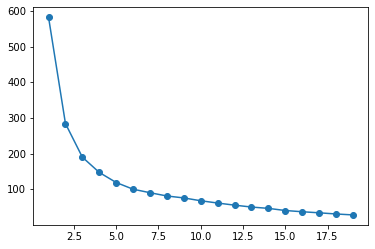

In [461]:
new_MP = range(1,20)
rate_MP = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_MP)
    rate_MP.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_MP, rate_MP, marker="o")

In [462]:
cluster_mp = KMeans(4, random_state = 42)
cluster_mp.fit(scaled_MP)
crimes_KMe_MP["clu_Id"] = cluster_mp.labels_

In [463]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0       ALIRAJPUR          712  1402          63                  28   
1         ANUPPUR         1980  2147          59                 350   
2     ASHOK NAGAR         2668  8174          65                 339   
4         BARWANI         4570  3944          64                 203   
8     BHOPAL RLY.        24602    70          17                  11   
9       BURHANPUR         2150  1382          23                 215   
13         DATIYA         3500  4920         226                 333   
16        DINDORI          680  1381          27                 201   
19          HARDA         2638  4438          87                 190   
22    INDORE RLY.         4378    86           7                   2   
24  JABALPUR RLY.         7720    86          10                   1   
29         MANDLA         1740  3946          77                 349   
33        NEEMUCH         6762  4930         143                 602   
34          PANNA         2170  2157         114                 352   
41          SEONI         3060  3916         112                 324   
44        SHEOPUR         1962  3984         107                 256   
48      SINGRAULI         1368  1610         114                 306   
51        UMARIYA         1952  1704          31                 270   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0        191     319                  362        20     85   
1        911     281                  231       151    145   
2       1007     288                  573       116    309   
4       1044     486                 1430       107    365   
8        124      54                   22        67     53   
9        441     146                  388        97    174   
13      1204     603                  818       175    350   
16       451     243                  446       103     90   
19       817     209                  194        84    171   
22        24      35                    0        23     13   
24        49      34                    2        21     20   
29      1098     364                  812       185    143   
33      1850     210                  744       257    524   
34      1451     393                  596       131    150   
41      1311     414                 1228       299    402   
44       589     180                  312       119    422   
48       520     174                  595        47    156   
51      1054     243                   83       148    186   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  clu_Id  
0                     136              3011       0  
1                     657              7087       0  
2                    1091              8392       0  
4                     970             12891       0  
8                     137              3245       0  
9                     478              7418       0  
13                    787             14556       0  
16                    687              5862       0  
19                    520              4959       0  
22                     52              1118       0  
24                     68              1528       0  
29                   1162             12434       0  
33                    694             10391       0  
34                    964             12655       0  
41                   1259             17052       0  
44                    489              6413       0  
48                    474              5628       0  
51                    759              9162       0

In [464]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==1]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
18   GWALIOR        37444  12847         833                1852     11163   
23  JABALPUR        22696  35159         484                1802      6035   
39     SAGAR        12182  31377         525                1733      4879   
50    UJJAIN        28378   8987         459                2034      5944   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
18    1143                 2778      1363   1771                   1967   
23    1008                 2451      1312   1137                   3086   
39     951                 1967       433   1231                   4603   
50     784                 1550       804   1379                   2128   

    OTHER IPC CRIMES  clu_Id  
18             50509       1  
23             49612       1  
39             36580       1  
50             54445       1

In [465]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
3      BALAGHAT         3886   4770          98                 617      1687   
5         BETUL         5008   4851         253                 738      1856   
6         BHIND         5844  10526         291                 627      1991   
10   CHHATARPUR         5478   6614         305                 745      3472   
11   CHHINDWARA         6268  15147         213                1344      2164   
12        DAMOH         3656  14382         195                 828      1640   
14        DEWAS        17140   5190         311                1746      3117   
15         DHAR        12714   7431         403                 923      2738   
17         GUNA         6690  12060         148                 632      2533   
20  HOSHANGABAD         8276   5446         260                 778      2751   
25       JHABUA         3968   6008         423                 159      1132   
26        KATNI         4690  12077         109                 726      1802   
27      KHANDWA         7394    691         197                 531      3248   
28      KHARGON        12700   4811         162                 518      2271   
30     MANDSAUR         8720   3296         251                 748      1967   
31       MORENA        10444  18405         365                 782      2625   
32  NARSINGHPUR         3552  12632          82                 594      1281   
35       RAISEN         5410   8639         205                 676      1472   
36      RAJGARH         8164   4548         277                1006      1996   
37       RATLAM         9050   5616         246                 905      1821   
38         REWA        11028   8805         380                 850      6329   
40        SATNA        10776  11530         262                1097      4787   
42      SHAHDOL         5616   3286         155                1058      2982   
43     SHAJAPUR        12064  13539         192                 745      2527   
45     SHIVPURI         6342   9903         333                 511      2177   
46        SIDHI         5678   5634         332                 569      3021   
47       SIHORE         8264   4501         250                 619      2259   
49    TIKAMGARH         4054  11418         169                 436      1820   
52      VIDISHA         7584   8891         209                 823      2758   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
3      675                  938       166    442                   1548   
5      736                 1367       269    144                   1865   
6      835                 1543       338    966                    870   
10     717                 1313       361    766                   2166   
11     846                 1900       469    640                   2384   
12     565                  718       187    239                   1865   
14     584                 1886       507   1034                   2240   
15     961                 2284       362    929                   2152   
17     555                 1670       266   1008                   2157   
20     582                  300       352    373                   1498   
25     979                  291        91    378                    878   
26     462                 1334       367    296                   1525   
27     401                 1039       246    545                   2005   
28     513                 1812       345    740                   1857   
30     383                 1177       341    544                   1436   
31     711                 1749       369   1742                   1030   
32     483                 1144       183    349                   1608   
35     546                 1383       150    495                   2200   
36     403                 1449       175   1308                   2116   
37     516                 1324       426    490                   1541   
3

In [466]:
crimes_KMe_MP[crimes_KMe_MP.clu_Id==3]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
7    BHOPAL        50186  13023         610                1967     11236   
21   INDORE        81764  20260         625                3918     11729   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
7      821                 3299      1873   1189                   2448   
21    1339                 4657      1788   1616                   3535   

    OTHER IPC CRIMES  clu_Id  
7             102247       3  
21            105984       3

In [467]:
crimes_ANP = crimes_df[crimes_df.STATE=='ANDHRA PRADESH']
crimes_ANP.shape

(370, 34)

In [468]:
DIST_ANP = crimes_ANP[crimes_ANP.DISTRICT=='TOTAL']

In [469]:
DIST_ANP = crimes_ANP.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [470]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_ANP["YEAR"], y= DIST_ANP['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [471]:
crimes_ANP_df = crimes_ANP[crimes_ANP.DISTRICT!="TOTAL"]
crimes_ANP_df = crimes_ANP_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()


In [472]:
ANP_crimes = crimes_ANP_df[(crimes_ANP_df.TOTAL_THEFT>10000) & (crimes_ANP_df.HURT>10000)].reset_index()
ANP_crimes

index         DISTRICT  TOTAL_THEFT   HURT
0       1        ANANTAPUR        12158  17682
1       2         CHITTOOR        22154  13543
2       4        CYBERABAD        59330  32697
3       5    EAST GODAVARI        27066  31514
4       7           GUNTUR        26330  22209
5       9   HYDERABAD CITY       112334  47343
6      10       KARIMNAGAR        15176  31334
7      11          KHAMMAM        12012  18111
8      12          KRISHNA        14004  27498
9      14    MAHABOOBNAGAR        18086  19861
10     15            MEDAK        12546  21372
11     16         NALGONDA        11834  19199
12     17          NELLORE        17246  24134
13     18        NIZAMABAD        12054  21756
14     19        PRAKASHAM        10264  17332
15     26  VIJAYAWADA CITY        18850  11687
16     31         WARANGAL        11694  18544
17     33    WEST GODAVARI        27694  23937

In [473]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ANP_crimes["DISTRICT"],
    y=ANP_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=ANP_crimes["DISTRICT"],
    y=ANP_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [474]:
crimes_ANP_clus = crimes_ANP.copy()


In [475]:
crimes_ANP_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [476]:
crimes_ANP_main = crimes_ANP_clus[crimes_ANP_clus.DISTRICT!="TOTAL"]

In [477]:
crimes_KMe_ANP = crimes_ANP_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [478]:
scaled = StandardScaler()
scaled_ANP = scaled.fit_transform(crimes_KMe_ANP[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

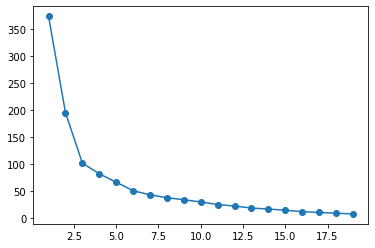

In [479]:
new_ANP = range(1,20)
rate_ANP = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_ANP)
    rate_ANP.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_ANP, rate_ANP, marker="o")

In [480]:
cluster_anp = KMeans(3, random_state = 42)
cluster_anp.fit(scaled_ANP)
crimes_KMe_ANP["clu_Id"] = cluster_anp.labels_

In [481]:
crimes_KMe_ANP[crimes_KMe_ANP.clu_Id==0]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
6       GUNTAKAL RLY.         4182     75          10                  11   
8        GUNTUR URBAN         4994   2398         100                1327   
20        RAJAHMUNDRY         2190   2104          75                 468   
21        RANGA REDDY         8520  13892         450                2001   
22  SECUNDERABAD RLY.         9638    138           9                   5   
23         SRIKAKULAM         5160  13049         217                2607   
24    TIRUPATHI URBAN         4210   2077          72                 293   
25         VIJAYAWADA        24556   9360         374                3571   
26    VIJAYAWADA CITY        18850  11687         485                4523   
27    VIJAYAWADA RLY.         8454    146           9                  10   
28      VISAKHA RURAL         4520  14824         191                1739   
29      VISAKHAPATNAM        22912   8827         403                4281   
30       VIZIANAGARAM         5220   7865         177                2829   
32     WARANGAL URBAN         2162   2136         124                 742   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
6          0      75                   32        19      4   
8        416     150                  690       803     23   
20       354      65                  484       244     12   
21      3266    1091                 2970      1702    392   
22         6     104                   33        52     16   
23      1437     405                 3165       882    469   
24       487     112                  649       567     84   
25      3101     213                 1212      3188     62   
26      1663     254                 2138      2625     55   
27         2      32                   41        43     14   
28      1241     737                 3756       871    787   
29      3925     340                 3451      3154    152   
30      1376     412                 2723       922    181   
32       475     108                  701       718    200   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  clu_Id  
6                      19               754       0  
8                     218              2569       0  
20                    140               841       0  
21                    741              7811       0  
22                     20               690       0  
23                    893             12699       0  
24                     99              1340       0  
25                    569              3678       0  
26                   1190              5032       0  
27                     35               467       0  
28                    793              7016       0  
29                    598             15647       0  
30                    832             16182       0  
32                    199              2967       0

In [482]:
crimes_KMe_ANP[crimes_KMe_ANP.clu_Id==1]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0        ADILABAD         7928  16392         754                4126   
1       ANANTAPUR        12158  17682         839                1645   
2        CHITTOOR        22154  13543         907                3283   
3        CUDDAPAH         9060  14301         653                1790   
5   EAST GODAVARI        27066  31514         780                4927   
7          GUNTUR        26330  22209         969                5792   
10     KARIMNAGAR        15176  31334        1534                7304   
11        KHAMMAM        12012  18111         919                4090   
12        KRISHNA        14004  27498         650                5016   
13        KURNOOL         9842  19228         785                3002   
14  MAHABOOBNAGAR        18086  19861         870                2751   
15          MEDAK        12546  21372         639                3552   
16       NALGONDA        11834  19199         872                3675   
17        NELLORE        17246  24134         887                3352   
18      NIZAMABAD        12054  21756         630                5084   
19      PRAKASHAM        10264  17332         758                2409   
31       WARANGAL        11694  18544        1109                3257   
33  WEST GODAVARI        27694  23937        1124                6558   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0       2519    1186                 3593      1932   1016   
1       2536    1922                 5058      1445   1293   
2       2777    1270                 8168      2694    973   
3       1549    1196                 4815      1894   1326   
5       5069    1041                 6655      3273    768   
7       3509    1775                 6110      4238   1204   
10      3258    1674                 5474      5639   2011   
11      2717    1337                 4980      2141   1667   
12      2392     842                 4060      1898    468   
13      2494    1529                 5479      2898   1340   
14      3014    2171                 6896      1774   1265   
15      3440    1460                 6935      2324    841   
16      2838    1446                 7657      2747   1612   
17      2934     942                 4817      2249    875   
18      3496    1339                 4289      2361    816   
19      2248    1089                 4549      2280    719   
31      3247    1287                 4544      2996   3069   
33      4169     887                 6031      4343    754   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  clu_Id  
0                    1785             20579       1  
1                    2026             15861       1  
2                    1381             24575       1  
3                    1708             21993       1  
5                    1920             18113       1  
7                    2881             28932       1  
10                   3833             20258       1  
11                   2247             19238       1  
12                   2865             10884       1  
13                   3504             23411       1  
14                   2061             17908       1  
15                   1295             10040       1  
16                   2738             31483       1  
17                   2413             15201       1  
18                   1013             11648       1  
19                   2197             17924       1  
31                   2467             25944       1  
33                   3859             18401       1

In [483]:
crimes_KMe_ANP[crimes_KMe_ANP.clu_Id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
4       CYBERABAD        59330  32697        1398                8932   
9  HYDERABAD CITY       112334  47343        1466               14055   

   BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
4     11946    1810                10314     11423    559   
9     13435    1455                 5966     22504   2432   

   ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  clu_Id  
4                   1372             23701       2  
9                   2088             28465       2

In [484]:
crimes_KER = crimes_df[crimes_df.STATE=='KERALA']
crimes_KER.shape

(233, 34)

In [485]:
crimes_KER.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT', 'DOWRY DEATHS',
       'ASSAULT_WOMEN_MODESTY', 'INSULT TO MODESTY OF WOMEN',
       'CRUELTY_BY_HUSBAND', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'DEATH_BY_NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL', 'TOTAL_THEFT'],
      dtype='object')

In [486]:
DIST_KER = crimes_KER[crimes_KER.DISTRICT=='TOTAL']

In [487]:
DIST_KER= crimes_KER.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [488]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_KER["YEAR"], y= DIST_KER['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [489]:
crimes_KER_df = crimes_KER[crimes_KER.DISTRICT!="TOTAL"]
crimes_KER_df = crimes_KER_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'RIOTS':sum}).reset_index()
crimes_KER_df

DISTRICT  TOTAL_THEFT   HURT  RIOTS
0            ALAPUZHA         6098  15835   5146
1               CBCID           90     19     52
2           ERNAKULAM         4846   3509   1312
3    ERNAKULAM COMMR.         7144   4836   2308
4     ERNAKULAM RURAL         7000   9241   3472
5              IDUKKI         4810  16106   3004
6              KANNUR         4848  13662   9807
7            KASARGOD         3662   9271   5829
8              KOLLAM         8070  22084   6415
9       KOLLAM COMMR.          878   2148    895
10       KOLLAM RURAL          658   2909    929
11           KOTTAYAM         8170  20453   4571
12          KOZHIKODE         1994   2184   2100
13   KOZHIKODE COMMR.         6146   5419   3397
14    KOZHIKODE RURAL         3918   9826   6809
15         MALAPPURAM         8796  10480   7386
16           PALAKKAD         6314  14881   6123
17     PATHANAMTHITTA         4084  12603   3433
18           RAILWAYS         4480    265    108
19           THRISSUR         8690  12523   6521
20    THRISSUR COMMR.          616    699    805
21     THRISSUR RURAL          906   1726   1185
22         TRIVANDRUM         2978   4986   1856
23  TRIVANDRUM COMMR.         9166   9030   4298
24   TRIVANDRUM RURAL         7470  19441   6000
25           WAYANADU         2874   8315   2513

In [490]:
KER_crimes = crimes_KER_df[(crimes_KER_df.TOTAL_THEFT>2000) & (crimes_KER_df.HURT>10000) & (crimes_KER_df.RIOTS>2000)].reset_index()

In [491]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=KER_crimes["DISTRICT"],
    y=KER_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=KER_crimes["DISTRICT"],
    y=KER_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=KER_crimes["DISTRICT"],
    y=KER_crimes["RIOTS"],
    name='RIOTS',
    marker_color='YEllow'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [492]:
crimes_KER_clus = crimes_KER.copy()


In [493]:
crimes_KER_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [494]:
crimes_KER_main = crimes_KER_clus[crimes_KER_clus.DISTRICT!="TOTAL"]

In [495]:
crimes_KMe_KER = crimes_KER_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [496]:
scaled = StandardScaler()
scaled_KER = scaled.fit_transform(crimes_KMe_KER[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

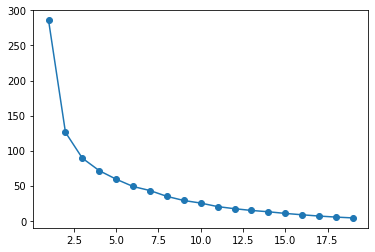

In [497]:
new_KER = range(1,20)
rate_KER = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_KER)
    rate_KER.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_KER, rate_KER, marker="o")

In [498]:
K=4
cluster_ker = KMeans(4, random_state = 42)
cluster_ker.fit(scaled_KER)
crimes_KMe_KER['Cluster_id'] = cluster_ker.labels_

In [499]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==0]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
6     KANNUR         4848  13662         144                3036      2687   
16  PALAKKAD         6314  14881         141                3624      2883   
19  THRISSUR         8690  12523         191                2836      2752   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
6      264                   49      1657   9807                   1400   
16     489                   61      2375   6123                   1312   
19     388                   73      4059   6521                   1905   

    OTHER IPC CRIMES  Cluster_id  
6              33649           0  
16             42717           0  
19             62982           0

In [500]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
1             CBCID           90    19           8                  21   
2         ERNAKULAM         4846  3509          32                 340   
9     KOLLAM COMMR.          878  2148          42                 655   
10     KOLLAM RURAL          658  2909          27                 624   
12        KOZHIKODE         1994  2184          17                 662   
18         RAILWAYS         4480   265           7                   0   
20  THRISSUR COMMR.          616   699          25                 277   
21   THRISSUR RURAL          906  1726          24                 810   
22       TRIVANDRUM         2978  4986          77                 524   
25         WAYANADU         2874  8315          62                1149   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
1         47     110                    7       217     52   
2       1241      80                    5       588   1312   
9        237      35                    1       176    895   
10       267      59                   14       235    929   
12       927      55                    6       685   2100   
18        24      10                    1        19    108   
20       130      17                    6      1044    805   
21       316      42                   14       820   1185   
22      1314     111                    0       791   1856   
25      1257     141                   23      1207   2513   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
1                       0               185           1  
2                     332             20029           1  
9                     363              7994           1  
10                    525              6272           1  
12                    253              8425           1  
18                    121               312           1  
20                    211              7311           1  
21                    481             18516           1  
22                    749             11284           1  
25                    742             12386           1

In [501]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0           ALAPUZHA         6098  15835         185                2680   
8             KOLLAM         8070  22084         238                4043   
11          KOTTAYAM         8170  20453         204                2170   
15        MALAPPURAM         8796  10480         170                6322   
24  TRIVANDRUM RURAL         7470  19441         291                3097   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0       2405     250                   17      2459   5146   
8       3284     381                   28      1679   6415   
11      3594     257                   17      3755   4571   
15      3618     255                   15      3410   7386   
24      3480     334                   19      2401   6000   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
0                    2186             58637           2  
8                    3035             49595           2  
11                   2310             54004           2  
15                   1685             57986           2  
24                   3885             42137           2

In [502]:
crimes_KMe_KER[crimes_KMe_KER.Cluster_id==3]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
3    ERNAKULAM COMMR.         7144   4836         104                1055   
4     ERNAKULAM RURAL         7000   9241         118                1473   
5              IDUKKI         4810  16106          85                1930   
7            KASARGOD         3662   9271         113                1775   
13   KOZHIKODE COMMR.         6146   5419         104                1520   
14    KOZHIKODE RURAL         3918   9826         141                2662   
17     PATHANAMTHITTA         4084  12603         128                1612   
23  TRIVANDRUM COMMR.         9166   9030         213                1177   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
3       1689     136                   15      3159   2308   
4       2172     266                   24      1973   3472   
5       2000     299                    7      1287   3004   
7       1750     193                   25      2034   5829   
13      2248      79                    9      1672   3397   
14      1757     110                   25      1567   6809   
17      1883     253                   13      1269   3433   
23      2409     119                   15      3220   4298   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
3                     746             85845           3  
4                    1269             97176           3  
5                    1668             32504           3  
7                     944             15626           3  
13                    721             20137           3  
14                   1314             25355           3  
17                   1649             31190           3  
23                   1684             27629           3

In [503]:
crimes_GUJ = crimes_df[crimes_df.STATE=='GUJARAT']
crimes_GUJ.shape

(384, 34)

In [504]:
DIST_GUJ = crimes_GUJ[crimes_GUJ.DISTRICT=='TOTAL']
DIST_GUJ= crimes_GUJ.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [505]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_GUJ["YEAR"], y= DIST_GUJ['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [506]:
crimes_GUJ_df = crimes_GUJ[crimes_GUJ.DISTRICT!="TOTAL"]
crimes_GUJ_df = crimes_GUJ_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()
crimes_GUJ_df

DISTRICT  TOTAL_THEFT   HURT
0    AHMEDABAD COMMR.       115310  16439
1     AHMEDABAD RURAL         7184   4117
2           AHWA-DANG          208    259
3              AMRELI         4224   3518
4               ANAND         9712   4669
5             BHARUCH         8398   3672
6           BHAVNAGAR        17286   2624
7           CID CRIME            4      0
8               DAHOD         3690   4181
9         GANDHINAGAR        11794   3206
10         HIMATNAGAR         5376   3171
11           JAMNAGAR        10272   4899
12           JUNAGADH        12550   5924
13        KHEDA NORTH         7780   4269
14              KUTCH         8438   4110
15    KUTCH (EAST(G))         1024    520
16  KUTCH (WEST-BHUJ)          760    350
17            MEHSANA        14860   9223
18            NARMADA          782   1228
19            NAVSARI         2918    953
20           PALANPUR         9648  12298
21         PANCHMAHAL         6130   4008
22              PATAN         7112   4283
23          PORBANDAR         1798   1235
24      RAJKOT COMMR.        26506   4818
25       RAJKOT RURAL         8542   4796
26       SURAT COMMR.        46680   6788
27        SURAT RURAL         5066   2370
28      SURENDRANAGAR         5698   5805
29               TAPI          664    528
30    VADODARA COMMR.        32216   3813
31     VADODARA RURAL         5398   4199
32             VALSAD         8122   2302
33              W.RLY        17524    498
34    W.RLY AHMEDABAD          852     61
35     W.RLY VADODARA         1888     84

In [507]:
GUJ_crimes = crimes_GUJ_df[(crimes_GUJ_df.TOTAL_THEFT>2000) & (crimes_GUJ_df.HURT>5000)].reset_index()

In [508]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=GUJ_crimes["DISTRICT"],
    y=GUJ_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=GUJ_crimes["DISTRICT"],
    y=GUJ_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [509]:
crimes_GUJ_clus = crimes_GUJ.copy()

In [510]:
crimes_GUJ_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [511]:
crimes_GUJ_main = crimes_GUJ_clus[crimes_GUJ_clus.DISTRICT!="TOTAL"]

In [512]:
crimes_KMe_Guj = crimes_GUJ_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [513]:
scaled = StandardScaler()
scaled_GUJ = scaled.fit_transform(crimes_KMe_Guj[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

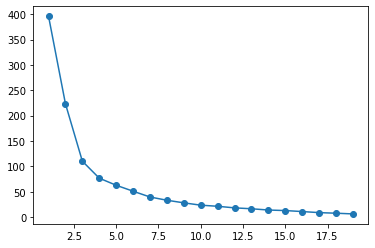

In [514]:
new_Guj = range(1,20)
rate_Guj = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_GUJ)
    rate_Guj.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_Guj, rate_Guj, marker="o")

In [515]:
K=4
cluster_guj = KMeans(4, random_state = 42)
cluster_guj.fit(scaled_GUJ)
crimes_KMe_Guj['Cluster_id'] = cluster_guj.labels_

In [516]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
2           AHWA-DANG          208   259           6                  71   
7           CID CRIME            4     0           0                   0   
15    KUTCH (EAST(G))         1024   520          49                 325   
16  KUTCH (WEST-BHUJ)          760   350          33                 235   
18            NARMADA          782  1228          60                 107   
19            NAVSARI         2918   953         116                 381   
23          PORBANDAR         1798  1235         114                 669   
29               TAPI          664   528          13                  56   
32             VALSAD         8122  2302         205                 359   
33              W.RLY        17524   498          41                  34   
34    W.RLY AHMEDABAD          852    61           4                   2   
35     W.RLY VADODARA         1888    84           4                   1   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
2         51      78                  225        18     51   
7          0       5                    0        23      0   
15       194      54                    5        56     58   
16       179      48                    9        26     96   
18       202     173                  675        67    146   
19       804     265                    0       139    176   
23       474     121                  551       157    117   
29        92      79                  571        18     36   
32      1994     406                  793       397    400   
33       184     133                   41       224     92   
34        16      10                    3        12     13   
35         4      10                    5        52      1   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
2                      29              1238           0  
7                       0                 3           0  
15                     25              3703           0  
16                     32              2220           0  
18                     63              5076           0  
19                     45              9602           0  
23                     68              6997           0  
29                     21              1557           0  
32                    104             15021           0  
33                     64              2659           0  
34                      8                92           0  
35                      3               105           0

In [517]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==1]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0  AHMEDABAD COMMR.       115310  16439        2301               11670   

   BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0      9392    1204                 2084      3173   2434   

   ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
0                    820            100241           1

In [518]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
1   AHMEDABAD RURAL         7184   4117         466                1217   
3            AMRELI         4224   3518         585                1514   
4             ANAND         9712   4669         501                2022   
5           BHARUCH         8398   3672         302                 655   
8             DAHOD         3690   4181         418                 328   
9       GANDHINAGAR        11794   3206         315                1652   
10       HIMATNAGAR         5376   3171         491                2305   
11         JAMNAGAR        10272   4899         377                2806   
12         JUNAGADH        12550   5924         663                4893   
13      KHEDA NORTH         7780   4269         486                1817   
14            KUTCH         8438   4110         378                2367   
17          MEHSANA        14860   9223         661                2637   
20         PALANPUR         9648  12298         734                2474   
21       PANCHMAHAL         6130   4008         546                1546   
22            PATAN         7112   4283         338                1518   
24    RAJKOT COMMR.        26506   4818         514                2659   
25     RAJKOT RURAL         8542   4796         640                3033   
27      SURAT RURAL         5066   2370         211                 642   
28    SURENDRANAGAR         5698   5805         441                1183   
31   VADODARA RURAL         5398   4199         588                 874   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
1       1318     414                 3543       164    687   
3       1305     295                 1269       150    519   
4       1611     341                 2576       352    547   
5       1570     450                 3033       253    543   
8       1006     496                  544        65    608   
9       1626     292                 2169       492    567   
10      1732     475                 2885       489    665   
11      2210     467                   25       351    761   
12      2472     536                 2380       687   1068   
13      1397     470                 2774       497    674   
14      2337     362                 2351       477    610   
17      2565     378                 2114       694   1083   
20      2506     509                 2273       523    861   
21      1480     627                  341       247    553   
22      1082     220                 1340       278    647   
24      3191     423                 1282       631    981   
25      2192     470                 3274       220    782   
27       941     627                 4395       332    311   
28      1307     384                 2066       170    752   
31       923     862                 3239       270    594   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
1                     253             20272           2  
3                     272             15119           2  
4                     300             21930           2  
5                     214             17654           2  
8                     246              9036           2  
9                     200             31585           2  
10                    436             39378           2  
11                    260             34532           2  
12                    519             31030           2  
13                    361             35301           2  
14                    276             23964           2  
17                    353             28546           2  
20                    598             22330           2  
21                    367             23069           2  
22                    349             17182           2  
24                    184             22132           2  
25                    416             28670           2  
27                    119             13121           2  
28                    484     

In [519]:
crimes_KMe_Guj[crimes_KMe_Guj.Cluster_id==3]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
6         BHAVNAGAR        17286  2624         985                2231   
26     SURAT COMMR.        46680  6788        1150                2909   
30  VADODARA COMMR.        32216  3813         510                2239   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
6       3240     628                   42      1043   1746   
26      4739    1108                 3844      2346   1207   
30      4353     355                 1664      1973   1806   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
6                     651             40473           3  
26                    380             34301           3  
30                    169             32216           3

In [520]:
crimes_AS = crimes_df[crimes_df.STATE=='ASSAM']
crimes_AS.shape

(362, 34)

In [521]:
DIST_AS = crimes_AS[crimes_AS.DISTRICT=='TOTAL']
DIST_AS = crimes_AS.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [522]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_AS["YEAR"], y= DIST_AS['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()


In [523]:
crimes_AS_df = crimes_AS[crimes_AS.DISTRICT!="TOTAL"]
crimes_AS_df = crimes_AS_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'CRUELTY_BY_HUSBAND':sum}).reset_index()
crimes_AS_df

DISTRICT  TOTAL_THEFT  HURT  CRUELTY_BY_HUSBAND
0           BAKSA          208    66                  15
1         BARPETA         4710  2071                2424
2           BASKA          580   513                 114
3            BIEO            0     0                   0
4      BONGAIGAON         2632  1118                1101
5          C.I.D.           28     0                   0
6          CACHAR        11722  2856                4172
7         CHIRANG          864   252                 402
8         DARRANG         4072  3235                1645
9         DHEMAJI         2796  2385                1058
10         DHUBRI         4370  4885                4331
11      DIBRUGARH        10198  4048                1075
12         G.R.P.         3104   104                  30
13       GOALPARA         3608  1767                1923
14       GOLAGHAT         6050  3772                1227
15  GUWAHATI CITY        37206  6441                1932
16     HAILAKANDI         2314   616                 779
17         HAMREN           72    21                   3
18         JORHAT         6208  2818                1082
19         KAMRUP         7152  2308                1070
20  KARBI ANGLONG         2994   639                 183
21      KARIMGANJ         3308  1247                1279
22      KOKRAJHAR         3158  1874                 762
23      LAKHIMPUR         5108  4458                1584
24       MORIGAON         2424  2784                 889
25      N.C.HILLS          930   286                  92
26         NAGAON         9990  7055                4910
27        NALBARI         3144  3078                 609
28         R.P.O.          258    15                  22
29       SIBSAGAR         8618  2949                1312
30       SONITPUR         9544  3047                2317
31       TINSUKIA        12082  1755                 780
32       UDALGURI         1498   720                 266

In [524]:
AS_crimes = crimes_AS_df[(crimes_AS_df.TOTAL_THEFT>10000) & (crimes_AS_df.HURT>5000) & (crimes_AS_df.CRUELTY_BY_HUSBAND>2000)].reset_index()

In [525]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=AS_crimes["DISTRICT"],
    y=AS_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=AS_crimes["DISTRICT"],
    y=AS_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=AS_crimes["DISTRICT"],
    y=AS_crimes["CRUELTY_BY_HUSBAND"],
    name='CRUELTY BY HUSBAND',
    marker_color='Purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [526]:
crimes_AS_clus = crimes_AS.copy()

In [527]:
crimes_AS_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [528]:
crimes_AS_main = crimes_AS_clus[crimes_AS_clus.DISTRICT!="TOTAL"]
crimes_KMe_AS = crimes_AS_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()


In [529]:
scaled = StandardScaler()
scaled_AS = scaled.fit_transform(crimes_KMe_AS[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])


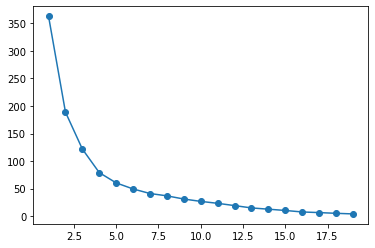

In [530]:
new_AS = range(1,20)
rate_AS = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_AS)
    rate_AS.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_AS, rate_AS, marker="o")

In [531]:
K=4
cluster_AS = KMeans(4, random_state = 42)
cluster_AS.fit(scaled_AS)
crimes_KMe_AS['Cluster_id'] = cluster_AS.labels_

In [532]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0           BAKSA          208    66          62                  15   
2           BASKA          580   513         256                 114   
3            BIEO            0     0           0                   0   
4      BONGAIGAON         2632  1118         619                1101   
5          C.I.D.           28     0           8                   0   
7         CHIRANG          864   252         281                 402   
9         DHEMAJI         2796  2385         637                1058   
12         G.R.P.         3104   104          45                  30   
16     HAILAKANDI         2314   616         654                 779   
17         HAMREN           72    21          16                   3   
20  KARBI ANGLONG         2994   639         450                 183   
21      KARIMGANJ         3308  1247         586                1279   
24       MORIGAON         2424  2784         752                 889   
25      N.C.HILLS          930   286         166                  92   
27        NALBARI         3144  3078         696                 609   
28         R.P.O.          258    15          30                  22   
32       UDALGURI         1498   720         395                 266   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0         22      38                   31        14      3   
2        132     273                  137        64     38   
3          0       0                    0         0      0   
4        926     298                  807       237    829   
5          0       2                    0        97      0   
7        265     214                  184        66    184   
9        363     253                  478       239    236   
12        54      91                   33        65    107   
16       773     262                  279       234   1841   
17        19       9                    9         1      3   
20       287     632                  521        95    424   
21       890     423                  420       192   1927   
24       658     254                  643       369    970   
25       139     294                  139        44     57   
27       938     380                  446       294    141   
28        12      60                    1         5    104   
32       421     325                  283        89    189   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
0                       4               233           0  
2                      83               999           0  
3                       0                 0           0  
4                     175              4284           0  
5                       0               236           0  
7                      91              1662           0  
9                     374              2802           0  
12                     12              1261           0  
16                    235              4505           0  
17                      2                13           0  
20                    105              2357           0  
21                     89              4920           0  
24                    510              3148           0  
25                     26               609           0  
27                    553              4323           0  
28                      5               508           0  
32                    186              1916           0

In [533]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
6    CACHAR        11722  2856        1591                4172      2572   
10   DHUBRI         4370  4885        1795                4331      1286   
26   NAGAON         9990  7055        2606                4910      3297   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
6      695                 2681       710   3769                    920   
10     634                 1905       953   5698                   1549   
26     996                 3137       831   3192                   1125   

    OTHER IPC CRIMES  Cluster_id  
6              19550           1  
10              6385           1  
26             13736           1

In [534]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==2]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
15  GUWAHATI CITY        37206  6441        2959                1932   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
15      6701     698                 2459      2273   2037   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
15                   1098             26625           2

In [535]:
crimes_KMe_AS[crimes_KMe_AS.Cluster_id==3]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
1     BARPETA         4710  2071        1366                2424      1665   
8     DARRANG         4072  3235        1079                1645      1291   
11  DIBRUGARH        10198  4048        1111                1075      1238   
13   GOALPARA         3608  1767         829                1923       834   
14   GOLAGHAT         6050  3772        1120                1227       998   
18     JORHAT         6208  2818         670                1082      1048   
19     KAMRUP         7152  2308        1317                1070      1526   
22  KOKRAJHAR         3158  1874         693                 762       562   
23  LAKHIMPUR         5108  4458        1238                1584       865   
29   SIBSAGAR         8618  2949        1157                1312      1212   
30   SONITPUR         9544  3047        1699                2317      2063   
31   TINSUKIA        12082  1755        1056                 780      1695   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
1      567                 1407       438   2619                    467   
8      471                 1125       482    675                   1438   
11    1199                 1976       400    420                    564   
13     414                  902       390   1288                    400   
14     735                 1442       447    140                    500   
18     506                 1133       458    446                    516   
19     450                  931       580   1089                    498   
22     709                  694       249   3523                    342   
23     426                 1273       514    712                    502   
29     828                  869       623    554                    616   
30    1116                 2885       647   1307                    416   
31    1180                  975       291    441                    219   

    OTHER IPC CRIMES  Cluster_id  
1              10333           3  
8               5432           3  
11              6517           3  
13              5262           3  
14              3368           3  
18              4674           3  
19             11365           3  
22              2457           3  
23              5671           3  
29              7782           3  
30             10978           3  
31              7443           3

In [536]:
#crimes in Rajastan
crimes_RAJ = crimes_df[crimes_df.STATE=='RAJASTHAN']
crimes_RAJ.shape

(454, 34)

In [537]:
DIST_RAJ = crimes_RAJ[crimes_RAJ.DISTRICT=='TOTAL']
DIST_RAJ= crimes_RAJ.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [538]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_RAJ["YEAR"], y= DIST_RAJ['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [539]:
crimes_RAJ_df = crimes_RAJ[crimes_RAJ.DISTRICT!="TOTAL"]
crimes_RAJ_df = crimes_RAJ_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum, 'CHEATING':sum}).reset_index()

In [540]:
RAJ_crimes = crimes_RAJ_df[(crimes_RAJ_df.TOTAL_THEFT>10000) & (crimes_RAJ_df.HURT>5000) & (crimes_RAJ_df.CHEATING>2000)].reset_index()


In [541]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=RAJ_crimes["DISTRICT"],
    y=RAJ_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=RAJ_crimes["DISTRICT"],
    y=RAJ_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.add_trace(go.Bar(
    x=RAJ_crimes["DISTRICT"],
    y=RAJ_crimes["CHEATING"],
    name='CHEATING',
    marker_color='yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [542]:
crimes_RAJ_clus = crimes_RAJ.copy()
crimes_RAJ_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)

In [543]:
crimes_RAJ_main = crimes_RAJ_clus[crimes_RAJ_clus.DISTRICT!="TOTAL"]
crimes_KMe_RAJ = crimes_RAJ_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()


In [544]:
scaled = StandardScaler()
scaled_RAJ = scaled.fit_transform(crimes_KMe_RAJ[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

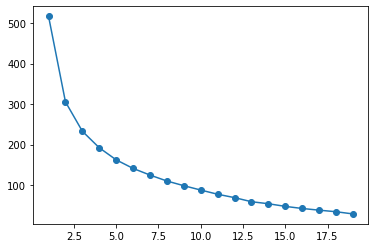

In [545]:
new_RAJ = range(1,20)
rate_RAJ = []
for i in new_MP:
    clustering = KMeans(i)
    clustering.fit(scaled_RAJ)
    rate_RAJ.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_RAJ, rate_RAJ, marker="o")

In [546]:
K=3
cluster_raj = KMeans(3, random_state = 42)
cluster_raj.fit(scaled_RAJ)
crimes_KMe_RAJ['Cluster_id'] = cluster_raj.labels_


In [547]:
crimes_KMe_RAJ[crimes_KMe_RAJ.Cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
13      DUNGARPUR         1604  1858         565                 935   
14         G.R.P.         9230    36          40                   1   
15    G.R.P.AJMER         2994     9          15                   0   
16  G.R.P.JODHPUR          518     2           3                   0   
21   JAIPUR NORTH        10678  2430         443                1410   
24    JAIPUR WEST         4150   467         157                 465   
25      JAISALMER         3092  1420         113                 245   
26         JALORE         3866   542         398                1239   
30   JODHPUR CITY         9324  3366         314                1475   
31   JODHPUR EAST          794   417          15                 296   
32  JODHPUR RURAL         3074  6650         231                 692   
33   JODHPUR WEST         1292   286          29                   5   
37     KOTA RURAL         2482  1524         278                1370   
40     PRATAPGARH         1140  2402         343                 979   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
13       607     298                 1249       544   1147   
14        20      44                   23        53     57   
15         3      16                    4        13      8   
16         1       8                    5         0      5   
21       819     121                  804      3992    267   
24       582      53                  549      1804     14   
25       646      81                  537       680    198   
26       968     269                 1137      1488    209   
30      1079     117                  904      3187     72   
31        50      12                  114       447      0   
32       655     177                 1568      1275     61   
33       124      15                  170       275      0   
37       430     167                  712       961     67   
40       250     150                  346       529    175   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
13                    643             12698           0  
14                    131              3017           0  
15                     23               439           0  
16                     10               129           0  
21                    228              8381           0  
24                     43              3592           0  
25                    202              5450           0  
26                    589             19270           0  
30                    238              5450           0  
31                     16               459           0  
32                    281              5583           0  
33                     27               538           0  
37                    609              6720           0  
40                    314              3634           0

In [548]:
crimes_KMe_RAJ[crimes_KMe_RAJ.Cluster_id==1]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
0         AJMER        17908   4138        1256                5489      3507   
1         ALWAR        35328  27728        1598                4781      2563   
5     BHARATPUR        23776   8099        1646                4103      1002   
6      BHILWARA        17656   1982        1506                4770      3119   
9   CHITTORGARH        13762  19974        1709                5473      2857   
17   GANGANAGAR         9210  12004         792                6060      2379   
19       JAIPUR        34882   7996        1167                2526      4822   
46      UDAIPUR        15296  18161        1787                3234      3278   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
0      538                 4889      7106    589                   1023   
1     1019                 4610      7895    957                   1479   
5      983                 2549      5860    506                    618   
6      398                 3095      4844   1192                   1176   
9      512                 2393      3523   1836                   1264   
17     691                 1868      7757    114                    844   
19     439                 4192      7308   8649                   1006   
46     825                 3986      6490   2983                   1529   

    OTHER IPC CRIMES  Cluster_id  
0              37919           1  
1              27345           1  
5              50404           1  
6              31450           1  
9              18445           1  
17             22923           1  
19             41008           1  
46             30212           1

In [549]:
crimes_KMe_RAJ[crimes_KMe_RAJ.Cluster_id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
2         BANSWARA         2716  11890         699                1477   
3            BARAN         7310   4302         810                2610   
4           BARMER         5310   7119         329                1390   
7          BIKANER         8656   6008         395                3447   
8            BUNDI         6764   9853        1057                2819   
10           CHURU         4714   7861         388                2840   
11           DAUSA        15810   1099         758                1363   
12         DHOLPUR         8444  15705         691                1653   
18     HANUMANGARH         6184   5339         469                3529   
20     JAIPUR EAST        32462    271         468                1338   
22    JAIPUR RURAL        12758   4001         672                1581   
23    JAIPUR SOUTH        19070   1832         387                1342   
27        JHALAWAR         9316  10760         858                3256   
28       JHUNJHUNU         7722   6135         573                2342   
29         JODHPUR        10436  11653         419                1303   
34         KARAULI        10852    771         922                1370   
35            KOTA        11154   3081         686                1706   
36       KOTA CITY        11948    951         575                2426   
38          NAGAUR         9388   2457         760                2867   
39            PALI         8052    531        1040                3612   
41       RAJSAMAND         4082  10436         585                2010   
42  SAWAI MADHOPUR        10356    236         740                1724   
43           SIKAR         9854   4566         827                2353   
44          SIROHI         3394   5728         454                1431   
45            TONK         7140  13277         760                2764   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
2        880     403                 1224       912   1701   
3       1368     403                 1111      2076    390   
4       1197     256                 1688      2252    212   
7       1601     478                 2275      4237    129   
8       1424     273                 1399      1976    708   
10      1155     339                 1530      3335    505   
11      1071     355                 2443      2697   1319   
12       677     529                 1205      1499   1188   
18      1286     611                 1393      5121    221   
20      2448     137                 1452      4300    717   
22      1525     415                 4104      5127    468   
23      1829     122                 1209      6077    343   
27      1498     500                 1306      1503   1014   
28      1477     459                 1816      3540    951   
29      1747     203                 1227      2560    553   
34       414     372                 1003      1774    320   
35      1779     240                  844      1790    529   
36       932     193                  794      3266     28   
38      2321     551                 2408      3821    161   
39      2389     462                 3030      3620    440   
41      1015     208                 1761      1856    944   
42      1023     274                  892      2352    293   
43      2024     547                 3089      4980   2221   
44      1221     328                 1639      1617    489   
45      1206     253                 1804      2481   1123   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
2                     866              9233           2  
3                    1864             18468           2  
4                     914             14585           2  
7                     691             19958           2  
8                    1456             15014           2  
10                    418             11938           2  
11                    273             30684           2  
12      

In [550]:
crimes_HAR = crimes_df[crimes_df.STATE=='HARYANA']
crimes_HAR.shape
DIST_HAR = crimes_HAR[crimes_HAR.DISTRICT=='TOTAL']
DIST_HAR= crimes_HAR.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()


In [551]:
  fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_HAR["YEAR"], y= DIST_HAR['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [552]:
crimes_HAR_df = crimes_HAR[crimes_HAR.DISTRICT!="TOTAL"]
crimes_HAR_df = crimes_HAR_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum}).reset_index()
crimes_HAR_df

DISTRICT  TOTAL_THEFT
0         AMBALA         8746
1   AMBALA RURAL          418
2   AMBALA URBAN         1200
3        BHIWANI        10016
4      FARIDABAD        27978
5      FATEHABAD         4992
6            GRP         7952
7        GURGAON        49040
8         HISSAR        14856
9        JHAJJAR         6788
10          JIND         7440
11       KAITHAL         5740
12        KARNAL        15412
13   KURUKSHETRA        12102
14  MAHENDRAGARH         4882
15         MEWAT         4692
16        PALWAL         6462
17     PANCHKULA         6864
18       PANIPAT        15848
19        REWARI         8426
20        ROHTAK        13104
21         SIRSA         7890
22       SONIPAT        13440
23   YAMUNANAGAR         8500

In [553]:
HAR_crimes = crimes_HAR_df[(crimes_HAR_df.TOTAL_THEFT>10000)].reset_index()


In [554]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=HAR_crimes["DISTRICT"],
    y=HAR_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [555]:
crimes_HAR_clus = crimes_HAR.copy()
crimes_HAR_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [556]:
crimes_HAR_main = crimes_HAR_clus[crimes_HAR_clus.DISTRICT!="TOTAL"]
crimes_KMe_Har = crimes_HAR_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [557]:
scaled = StandardScaler()
scaled_HAR = scaled.fit_transform(crimes_KMe_Har[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

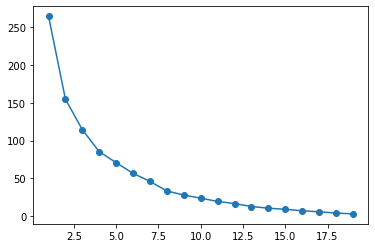

In [558]:
new_Har = range(1,20)
rate_har = []
for i in new_Har:
    clustering = KMeans(i)
    clustering.fit(scaled_HAR)
    rate_har.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_Har, rate_har, marker="o")

In [559]:
K=2
cluster_guj = KMeans(2, random_state = 42)
cluster_guj.fit(scaled_HAR)
crimes_KMe_Har['Cluster_id'] = cluster_guj.labels_


In [560]:
crimes_KMe_Har[crimes_KMe_Har.Cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
0         AMBALA         8746  2518         310                1806      2959   
1   AMBALA RURAL          418    66          28                  73       118   
2   AMBALA URBAN         1200   109          75                 159       362   
5      FATEHABAD         4992  2075         318                1016      1307   
6            GRP         7952   157          40                   2        16   
9        JHAJJAR         6788  1614         265                1226      1485   
10          JIND         7440  1719         298                 835      1887   
11       KAITHAL         5740  2422         197                1601      1569   
13   KURUKSHETRA        12102  2243         303                1112      2484   
14  MAHENDRAGARH         4882  1783         278                 593      1226   
15         MEWAT         4692   925         193                1121       300   
16        PALWAL         6462  1128         261                 549       513   
17     PANCHKULA         6864   410         229                 784      1627   
19        REWARI         8426  1899         277                 690      1675   
21         SIRSA         7890  3807         387                1453      2056   
23   YAMUNANAGAR         8500  2241         444                1377      1847   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
0      350                   30      1030     24                    235   
1       13                    2        45      0                     12   
2       15                    1        99      1                     23   
5      272                   46       720    227                    169   
6      268                  192        84    135                     47   
9      638                 1893       496    693                    269   
10     483                   34       534   1061                    197   
11     321                   71       264      0                    188   
13     321                   24       951      3                    226   
14     309                   53       134    839                    236   
15     167                   19       400    892                    107   
16     252                  184       232    911                    179   
17     162                  335       626     21                    194   
19     320                   48       238    493                    253   
21     438                   45       491    307                    216   
23     383                   32       544      7                    216   

    OTHER IPC CRIMES  Cluster_id  
0              11279           0  
1                462           0  
2                759           0  
5               6690           0  
6               5371           0  
9               5628           0  
10              7622           0  
11              6555           0  
13             10857           0  
14              9608           0  
15              6012           0  
16              6009           0  
17              7244           0  
19             11454           0  
21              7952           0  
23              8741           0

In [561]:
crimes_KMe_Har[crimes_KMe_Har.Cluster_id==1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
3     BHIWANI        10016  3138         476                1088      2495   
4   FARIDABAD        27978  2992        1111                1985      3464   
7     GURGAON        49040  2089         729                1356      5710   
8      HISSAR        14856  4036         586                2117      3062   
12     KARNAL        15412  6442         425                2196      2913   
18    PANIPAT        15848  2039         543                1549      2225   
20     ROHTAK        13104  2087         327                 974      2887   
22    SONIPAT        13440  3315         556                1450      2317   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
3      647                   70       996   1640                    340   
4      769                 1306       631   1845                    420   
7      933                  206      1767   1079                    305   
8      708                   49      1711    577                    338   
12     513                 2856      1231    558                    363   
18     534                 2675       486    641                    227   
20     742                 2125       942    629                    257   
22     913                 2901       923     73                    306   

    OTHER IPC CRIMES  Cluster_id  
3              12055           1  
4              28034           1  
7              21940           1  
8              15352           1  
12              8174           1  
18              7919           1  
20              8576           1  
22             10551           1

In [562]:
crimes_ODI = crimes_df[crimes_df.STATE=='ODISHA']
crimes_ODI.shape
DIST_ODI = crimes_ODI[crimes_ODI.DISTRICT=='TOTAL']
DIST_ODI = crimes_ODI.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [563]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_ODI["YEAR"], y= DIST_ODI['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [564]:
crimes_ODI_df = crimes_ODI[crimes_ODI.DISTRICT!="TOTAL"]
crimes_ODI_df = crimes_ODI_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()
crimes_ODI_df

DISTRICT  TOTAL_THEFT  HURT
0           ANGUL         7500   549
1        BALASORE         6644  9038
2        BARAGARH         3924   607
3       BERHAMPUR         4116  1926
4         BHADRAK         2594   301
5        BOLANGIR         3554  1164
6           BOUDH          830  1520
7         CUTTACK        11862  1301
8        DCP BBSR        11850  3699
9         DCP CTC         5568   126
10        DEOGARH          754  2057
11      DHENKANAL         4002   806
12       GAJAPATI          692   460
13         GANJAM         3784  2997
14  JAGATSINGHPUR         3964  1587
15         JAJPUR         5468  6818
16     JHARSUGUDA         4496  3228
17      KALAHANDI         1958  2346
18      KANDHAMAL         1644  3871
19     KENDRAPARA         2486   739
20       KEONJHAR         5616  1778
21         KHURDA        16884  9204
22        KORAPUT         3180   427
23      MALKANGIR          992   463
24     MAYURBHANJ         5394  1339
25       NAYAGARH         2788  3734
26     NOWRANGPUR         1576   797
27        NUAPADA         1400   505
28           PURI         7502  1020
29       RAYAGADA         1796   339
30       ROURKELA         6408  1715
31      SAMBALPUR         7206  2349
32        SONEPUR         1106   706
33   SRP(CUTTACK)         8226   328
34  SRP(ROURKELA)         3922    49
35     SUNDARGARH         3988  5868

In [565]:
ODI_crimes = crimes_ODI_df[(crimes_ODI_df.TOTAL_THEFT>10000) & (crimes_ODI_df.HURT>2000)].reset_index()


In [566]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ODI_crimes["DISTRICT"],
    y=ODI_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=ODI_crimes["DISTRICT"],
    y=ODI_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [567]:
crimes_ODI_clus = crimes_ODI.copy()
crimes_ODI_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [568]:
crimes_ODI_main = crimes_ODI_clus[crimes_ODI_clus.DISTRICT!="TOTAL"]
crimes_KMe_ODI = crimes_ODI_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()


In [569]:
scaled = StandardScaler()
scaled_ODI = scaled.fit_transform(crimes_KMe_ODI[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])
 


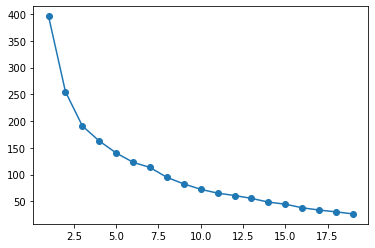

In [570]:
new_odi = range(1,20)
rate_odi = []
for i in new_odi:
    clustering = KMeans(i)
    clustering.fit(scaled_ODI)
    rate_odi.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_odi, rate_odi, marker="o")

In [571]:
K=2
cluster_odi = KMeans(2, random_state = 42)
cluster_odi.fit(scaled_ODI)
crimes_KMe_ODI['Cluster_id'] = cluster_odi.labels_


In [572]:
crimes_KMe_ODI[crimes_KMe_ODI.Cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  BURGLARY  \
0        ANGUL         7500   549         337                 686      1379   
1     BALASORE         6644  9038         724                1666      2127   
2     BARAGARH         3924   607         166                 938       898   
4      BHADRAK         2594   301         402                1056       784   
5     BOLANGIR         3554  1164         287                 533      1006   
7      CUTTACK        11862  1301         577                1382      2615   
11   DHENKANAL         4002   806         272                 333       848   
13      GANJAM         3784  2997         370                 345      1509   
15      JAJPUR         5468  6818         458                 918      1287   
20    KEONJHAR         5616  1778         438                 656      1032   
21      KHURDA        16884  9204         595                1270      3896   
22     KORAPUT         3180   427         319                 672      1065   
24  MAYURBHANJ         5394  1339         568                1377      1301   
28        PURI         7502  1020         404                 724      1954   
31   SAMBALPUR         7206  2349         190                 312      1927   

    MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  ASSAULT_WOMEN_MODESTY  \
0      598                 2084       451   1433                   2049   
1      459                   12       684    640                   1600   
2      383                 1396       303   1118                    932   
4      366                  804       492    471                    866   
5      413                  804       554   1024                   1635   
7      468                 3061       831    726                    451   
11     494                 1091       337   1100                   1831   
13     831                 1326       328   1243                   2671   
15     518                 1908       354    616                    709   
20     993                 3477       335    864                   1777   
21     516                 1442      1757    786                    706   
22     528                 1054       319    824                   1202   
24    1015                 1556       439    347                   2084   
28     492                 1731       523    870                    228   
31     513                 1675       375    794                    800   

    OTHER IPC CRIMES  Cluster_id  
0              12902           0  
1              12476           0  
2               6865           0  
4              13487           0  
5               9981           0  
7              19987           0  
11              7924           0  
13              7072           0  
15              6283           0  
20              8562           0  
21             14045           0  
22              7762           0  
24             11660           0  
28             17936           0  
31             11215           0

In [573]:
crimes_KMe_ODI[crimes_KMe_ODI.Cluster_id==1]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
3       BERHAMPUR         4116  1926         171                 412   
6           BOUDH          830  1520          67                 138   
8        DCP BBSR        11850  3699         244                 248   
9         DCP CTC         5568   126         149                 439   
10        DEOGARH          754  2057          82                 162   
12       GAJAPATI          692   460          94                 107   
14  JAGATSINGHPUR         3964  1587         333                 570   
16     JHARSUGUDA         4496  3228         102                 251   
17      KALAHANDI         1958  2346         253                 500   
18      KANDHAMAL         1644  3871         265                 483   
19     KENDRAPARA         2486   739         335                 463   
23      MALKANGIR          992   463         105                 137   
25       NAYAGARH         2788  3734         306                 384   
26     NOWRANGPUR         1576   797         270                 296   
27        NUAPADA         1400   505         122                 201   
29       RAYAGADA         1796   339         199                 348   
30       ROURKELA         6408  1715         178                 388   
32        SONEPUR         1106   706          66                 111   
33   SRP(CUTTACK)         8226   328          37                  10   
34  SRP(ROURKELA)         3922    49          24                  13   
35     SUNDARGARH         3988  5868         220                 168   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
3       1036     244                  819       525    458   
6        262     145                   93        45    277   
8       1377     205                  858       731    283   
9        621     117                  675       267    149   
10       277     188                  374        89    188   
12       247     166                  319       107    442   
14       929     321                 1937       333    308   
16       933     237                 1464       232    458   
17       717     330                  600       641    881   
18       644     308                   29       311   1095   
19       926     439                  289       203    280   
23       219     461                  217        95    346   
25       694     382                  451       262    383   
26       539     302                  435       132    546   
27       310     161                  286       154    289   
29       507     341                  818       211    581   
30      1176     482                 1088       497    270   
32       325     137                  211       150    298   
33        98      34                    5        53     12   
34       156      73                   35        26     30   
35       884     793                 2083       224    447   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
3                    1136              4611           1  
6                     516              1344           1  
8                     274              6096           1  
9                     114              5013           1  
10                    691              1202           1  
12                    425              1799           1  
14                    171              7127           1  
16                    568              2999           1  
17                    744              5495           1  
18                   1022              1188           1  
19                    178              8715           1  
23                    335              1564           1  
25                    119              3277           1  
26                    711              4058           1  
27                    473              4431           1  
29                    765              4553           1  
30                    775              7050           1  
32             

In [574]:
#Crimes in KARNATAKA
crimes_KAR = crimes_df[crimes_df.STATE=='KARNATAKA']
crimes_KAR.shape
DIST_KAR = crimes_KAR[crimes_KAR.DISTRICT=='TOTAL']
DIST_KAR = crimes_KAR.groupby(['YEAR']).agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum}).reset_index()

In [575]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['TOTAL_THEFT'],
                    name = "THEFT",line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['HURT'],
                    name='HURT',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['KIDNAPPING'],
                    name='KIDNAPPING & ABDUCTION',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR["CRUELTY_BY_HUSBAND"],
                    name='CRUELTY BY HUSBAND',line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['BURGLARY'],
                    name='BURGLARY',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['MURDER'],
                    name='MURDER',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['DEATH_BY_NEGLIGENCE'],
                    name='DEATH_BY_NEGLIGENCE',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['RIOTS'],
                    name='RIOTS',line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['CHEATING'],
                    name='CHEATING',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= DIST_KAR["YEAR"], y= DIST_KAR['ASSAULT_WOMEN_MODESTY'],
                    name='ASSAULT_WOMEN_MODESTY',line=dict(color='purple', width=4)))
fig.update_layout(uniformtext_minsize= 20)
fig.show()

In [576]:
crimes_KAR_df = crimes_KAR[crimes_KAR.DISTRICT!="TOTAL"]
crimes_KAR_df = crimes_KAR_df.groupby('DISTRICT').agg({"TOTAL_THEFT":sum, 'HURT':sum}).reset_index()
crimes_KAR_df

DISTRICT  TOTAL_THEFT   HURT
0           BAGALKOT         3122   3398
1   BANGALORE COMMR.       210868  37973
2    BANGALORE RURAL        18110  10804
3            BELGAUM        10260  11119
4            BELLARY         7038   6220
5              BIDAR         4626  11718
6            BIJAPUR         3478   7409
7             CBPURA         2658   1856
8      CHAMARAJNAGAR         2990   5348
9       CHICKMAGALUR         5014   9579
10       CHITRADURGA         5498   9739
11   DAKSHIN KANNADA         5536   5393
12        DAVANAGERE         6592   6103
13    DHARWAD COMMR.         7294   2179
14     DHARWAD RURAL         1336   1762
15             GADAG         1644   1923
16          GULBARGA         6888  13278
17            HASSAN         8018  15135
18            HAVERI         2716   3363
19            K.G.F.         2518   2930
20            KODAGU         2264   5979
21             KOLAR         7006   6032
22            KOPPAL         2248   2440
23            MANDYA         8992  12973
24    MANGALORE CITY          942    410
25     MYSORE COMMR.        13454   3617
26      MYSORE RURAL         6014  10660
27           RAICHUR         3150   6592
28          RAILWAYS        10666    205
29         RAMANAGAR         4764   2980
30           SHIMOGA         7964  12751
31            TUMKUR        11086  10624
32             UDUPI         2794   3512
33     UTTAR KANNADA         1964   4345
34           YADGIRI          408    983

In [577]:
KAR_crimes = crimes_KAR_df[(crimes_KAR_df.TOTAL_THEFT>10000) & (crimes_KAR_df.HURT>5000)].reset_index()


In [578]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=KAR_crimes["DISTRICT"],
    y=KAR_crimes["TOTAL_THEFT"],
    name='THEFT',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=KAR_crimes["DISTRICT"],
    y=KAR_crimes["HURT"],
    name='HURT',
    marker_color='Purple'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [579]:
crimes_KAR_clus = crimes_KAR.copy()
crimes_KAR_clus.drop(["STATE", 'TOTAL', 'YEAR', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE',  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'COUNTERFIETING', 'ARSON', 'DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1 ,inplace = True)


In [580]:
crimes_KAR_main = crimes_KAR_clus[crimes_KAR_clus.DISTRICT!="TOTAL"]
crimes_KMe_kar = crimes_KAR_main.groupby("DISTRICT").agg({'TOTAL_THEFT':sum,'HURT':sum,'KIDNAPPING':sum,'CRUELTY_BY_HUSBAND':sum, 
                                                       'BURGLARY':sum, 'MURDER':sum,'DEATH_BY_NEGLIGENCE':sum,
                                                      'CHEATING':sum, 'RIOTS':sum, 'ASSAULT_WOMEN_MODESTY':sum, 'OTHER IPC CRIMES':sum}).reset_index()

In [581]:
scaled = StandardScaler()
scaled_Kar = scaled.fit_transform(crimes_KMe_kar[['TOTAL_THEFT','HURT','KIDNAPPING','CRUELTY_BY_HUSBAND', 
                                                       'BURGLARY', 'MURDER','DEATH_BY_NEGLIGENCE',
                                                      'CHEATING', 'RIOTS', 'ASSAULT_WOMEN_MODESTY', 'OTHER IPC CRIMES']])

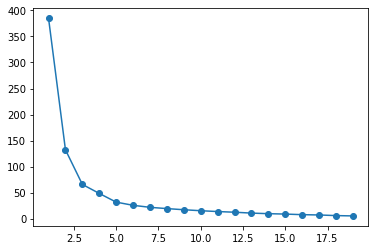

In [582]:
new_kar = range(1,20)
rate_kar = []
for i in new_kar:
    clustering = KMeans(i)
    clustering.fit(scaled_Kar)
    rate_kar.append(clustering.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(new_kar, rate_kar, marker="o")

In [583]:
K=3
cluster_kar = KMeans(3, random_state = 42)
cluster_kar.fit(scaled_Kar)
crimes_KMe_kar['Cluster_id'] = cluster_kar.labels_


In [584]:
crimes_KMe_kar[crimes_KMe_kar.Cluster_id==0]

DISTRICT  TOTAL_THEFT  HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
0          BAGALKOT         3122  3398         219                 712   
7            CBPURA         2658  1856         119                 229   
8     CHAMARAJNAGAR         2990  5348          82                 387   
11  DAKSHIN KANNADA         5536  5393         132                 489   
13   DHARWAD COMMR.         7294  2179         209                 426   
14    DHARWAD RURAL         1336  1762          87                 198   
15            GADAG         1644  1923          83                 313   
18           HAVERI         2716  3363         166                 445   
19           K.G.F.         2518  2930         104                 246   
20           KODAGU         2264  5979          96                 413   
22           KOPPAL         2248  2440         161                 556   
24   MANGALORE CITY          942   410          24                  91   
25    MYSORE COMMR.        13454  3617         193                 960   
28         RAILWAYS        10666   205          21                   3   
29        RAMANAGAR         4764  2980         190                 319   
32            UDUPI         2794  3512          89                 295   
33    UTTAR KANNADA         1964  4345          83                 625   
34          YADGIRI          408   983          68                 175   

    BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
0        983     537                    0       487   2162   
7        620     228                    8       317   1087   
8        810     307                    0       197   1330   
11      2343     386                  116       910   2468   
13      1596     226                   71      1334   1145   
14       371     323                    0       184   1194   
15       627     246                  758       258   1298   
18       905     283                  927       388   2787   
19       780     167                  184       221    730   
20      1352     352                   25       261    714   
22       931     285                    0       363   1482   
24       247      50                   33       222    213   
25      1836     343                    0      1147    888   
28        35     188                   45        34    212   
29      1214     399                    0       298   1277   
32      1533     221                   85       322   1537   
33       974     284                    0       265   1088   
34       165      74                  267        88    567   

    ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
0                     604             13059           0  
7                     225              4791           0  
8                     527              7426           0  
11                    479             25409           0  
13                    135             11573           0  
14                    250              7533           0  
15                    357              5232           0  
18                    540             13328           0  
19                    181              3558           0  
20                    311              7675           0  
22                    314             10773           0  
24                     56              3276           0  
25                    218             13334           0  
28                     17              1098           0  
29                    398             11152           0  
32                    305             17829           0  
33                    632             20077           0  
34                    231              1584           0

In [585]:
crimes_KMe_kar[crimes_KMe_kar.Cluster_id==1]

crimes_KMe_kar[crimes_KMe_kar.Cluster_id==2]

DISTRICT  TOTAL_THEFT   HURT  KIDNAPPING  CRUELTY_BY_HUSBAND  \
1  BANGALORE COMMR.       210868  37973        3014                3832   

   BURGLARY  MURDER  DEATH_BY_NEGLIGENCE  CHEATING  RIOTS  \
1     19968    2831                 1182     26401   4665   

   ASSAULT_WOMEN_MODESTY  OTHER IPC CRIMES  Cluster_id  
1                   2630            124176           2